In [1]:
import os
import anndata as ad
import umap
import scipy as sip
from scipy import sparse
from sklearn import preprocessing
import scanpy as scp
import pickle
import pandas as pd
import numpy as np
import igraph as ig
import seaborn as sb
import snf
import sklearn as skl
from sklearn import cluster
from sklearn.metrics import adjusted_mutual_info_score as ami
from sklearn.metrics import v_measure_score
from snf import compute, metrics
import matplotlib.pyplot as plt
from PyComplexHeatmap import *
from collections import Counter
import math

/Users/shakiba/Desktop/thesis.tmp/code/aggregated_patient_info/aggregated_patient_info/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/shakiba/Desktop/thesis.tmp/code/aggregated_patient_info/aggregated_patient_info/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-usin

In [2]:
min_max_scalar = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()

In [6]:
data = os.path.abspath(os.path.join(os.getcwd(),"../data"))

input = os.path.join(data, "input")
output = os.path.join(data, "output")

original = os.path.join(input, "original")
complementary = os.path.join(input, "complementary")

pb = os.path.join(output, "pb")
shared = os.path.join(output, "shared")

level1 = os.path.join(output, "level1")
level2 = os.path.join(output, "level2")
level3 = os.path.join(output, "level3_snf")
level4 = os.path.join(output, "level4")

In [7]:
with open(os.path.join(level1, "module_data.pickle"), "rb") as f:
    module_data = pickle.load(f) 
with open(os.path.join(level1, "noise_graphs_with_74_nodes.pickle"), "rb") as f:
    noise_74 = pickle.load(f) 


with open(os.path.join(complementary, "shared_patients_across_level1_networks_74.pickle"), "rb") as f:
    patients_74 = pickle.load(f) 
with open(os.path.join(complementary, "noise_name_to_id.pickle"), "rb") as f:
    noise_name_to_id = pickle.load(f) 
with open(os.path.join(complementary, "noise_id_to_name.pickle"), "rb") as f:
    noise_id_to_name = pickle.load(f) 
with open(os.path.join(complementary, "id_to_name.pickle"), "rb") as f:
    id_to_name = pickle.load(f) 
with open(os.path.join(complementary, "name_to_id.pickle"), "rb") as f:
    name_to_id = pickle.load(f) 
with open(os.path.join(complementary, "module_name_to_id.pickle"), "rb") as f:
    module_name_to_id = pickle.load(f) 
with open(os.path.join(complementary, "id_to_module_name.pickle"), "rb") as f:
    id_to_module_name = pickle.load(f) 
    


with open(os.path.join(complementary, "ground_truth_dg.pickle"), "rb") as f:
    ground_truth_dg = pickle.load(f) 
with open(os.path.join(complementary, "ground_truth_d.pickle"), "rb") as f:
    ground_truth_d = pickle.load(f) 
with open(os.path.join(complementary, "disease_groups.pickle"), "rb") as f:
    disease_groups = pickle.load(f) 
with open(os.path.join(complementary, "diseases.pickle"), "rb") as f:
    diseases = pickle.load(f) 



with open(os.path.join(shared, 'shared_patient_75_to_all_diseases.pickle'), 'rb') as f:
    patient_to_disease_evolution = pickle.load(f)
with open(os.path.join(shared, 'patient_to_assigned_disease.pickle'), 'rb') as f:
    patient_to_disease = pickle.load(f)
with open(os.path.join(shared, 'patient_to_disease_group.pickle'), 'rb') as f:
    patient_to_disease_group = pickle.load(f)
with open(os.path.join(shared, 'disease_group_to_patient.pickle'), 'rb') as f:
    disease_group_to_patient = pickle.load(f)
with open(os.path.join(shared, 'assigned_disease_to_patient.pickle'), 'rb') as f:
    patient_to_disease = pickle.load(f)



with open(os.path.join(level1, 'noise_correlations.pickle'), 'rb') as f:
    noise_correlations = pickle.load(f)
with open(os.path.join(level1, 'noise_knn_PSNs.pickle'), 'rb') as f:
    noise_knn_PSNs = pickle.load(f)
with open(os.path.join(level1, 'noise_kernel_PSNs.pickle'), 'rb') as f:
    noise_kernel_PSNs = pickle.load(f)

with open(os.path.join(level1, "id_to_feature_matrices.pickle"), "rb") as f:
    id_to_feature_matrices = pickle.load(f) 
with open(os.path.join(level1, 'weights_optimized.pickle'), 'rb') as f:
    weights = pickle.load(f)
with open(os.path.join(level1, 'all_dict.pickle'), 'rb') as f: # none noise + noise PSN, AFF, Corr together
    all_dict = pickle.load(f)


with open(os.path.join(level1, 'labels_kernel_snf_sc.pickle'), 'rb') as f: # labels of individual psns 
    labels_kernel_sc = pickle.load(f)
with open(os.path.join(level1, 'labels_knn_wa_leiden.pickle'), 'rb') as f:
    labels_knn_leiden = pickle.load(f)

In [8]:
with open(os.path.join(level1, 'labels_kernel_snf_sc.pickle'), 'rb') as f: # labels of individual psns 
    labels_kernel_sc = pickle.load(f)
with open(os.path.join(level1, 'labels_knn_wa_leiden.pickle'), 'rb') as f:
    labels_knn_leiden = pickle.load(f)

with open(os.path.join(level1, "ad_graphs.pickle"), "rb") as f:
    level1_graphs = pickle.load(f) 
with open(os.path.join(level2, "ad_graphs.pickle"), "rb") as f:
    level2_graphs = pickle.load(f) 
with open(os.path.join(level4, "ad_graphs.pickle"), "rb") as f:
    level4_graphs = pickle.load(f) 
    

with open(os.path.join(level1, 'correlations.pickle'), 'rb') as f:
    correlations_level1 = pickle.load(f)
with open(os.path.join(level1, 'knn_PSNs.pickle'), 'rb') as f:
    knn_PSNs_level1 = pickle.load(f)
with open(os.path.join(level1, 'kernel_PSNs.pickle'), 'rb') as f:
    kernel_PSNs_level1 = pickle.load(f)
with open(os.path.join(level1, 'labels.pickle'), 'rb') as f: 
    labels_level1 = pickle.load(f)


with open(os.path.join(level1, 'fused_corrs.pickle'), 'rb') as f:
    fused_corrs_level1 = pickle.load(f)
with open(os.path.join(level1, 'fused_knn.pickle'), 'rb') as f:
    fused_knn_level1 = pickle.load(f)
with open(os.path.join(level1, 'fused_kernel.pickle'), 'rb') as f:
    fused_kernel_level1 = pickle.load(f)


with open(os.path.join(level2, 'kernel_PSNs.pickle'), 'rb') as f:
    kernel_PSNs_level2 = pickle.load(f)
with open(os.path.join(level2, 'labels.pickle'), 'rb') as f: 
    labels_level2 = pickle.load(f)
with open(os.path.join(level2, 'fused_corrs.pickle'), 'rb') as f:
    fused_corrs_level2 = pickle.load(f)
with open(os.path.join(level2, 'fused_kernel.pickle'), 'rb') as f:
    fused_kernel_level2 = pickle.load(f)

with open(os.path.join(level3, 'kernel_PSNs.pickle'), 'rb') as f:
    kernel_PSNs_level3 = pickle.load(f)
with open(os.path.join(level3, 'labels.pickle'), 'rb') as f: 
    labels_level3 = pickle.load(f)
with open(os.path.join(level3, 'fused_corrs.pickle'), 'rb') as f:
    fused_corrs_level3 = pickle.load(f)
with open(os.path.join(level3, 'fused_kernel.pickle'), 'rb') as f:
    fused_kernel_level3 = pickle.load(f)

with open(os.path.join(level4, 'kernel_PSNs.pickle'), 'rb') as f:
    kernel_PSNs_level4 = pickle.load(f)
with open(os.path.join(level4, 'labels.pickle'), 'rb') as f: 
    labels_level4 = pickle.load(f)
with open(os.path.join(level4, 'fused_corrs.pickle'), 'rb') as f:
    fused_corrs_level4 = pickle.load(f)
with open(os.path.join(level4, 'fused_kernel.pickle'), 'rb') as f:
    fused_kernel_level4 = pickle.load(f)

In [10]:
optimal_graph = []
for i, dg1 in enumerate(list(level1_graphs["G0"].obs.DiseaseGroup)):
    neighbors_of_i = []
    for j, dg2 in enumerate(list(level1_graphs["G0"].obs.DiseaseGroup)):
        if i == j or dg1 != dg2:
            neighbors_of_i.append(0)
        else:
            neighbors_of_i.append(1)
    optimal_graph.append(neighbors_of_i)
    
optimal_graph = np.array(optimal_graph, dtype = "float64")
print(optimal_graph)

optimal_rw_score = 74

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [13]:
panelize_reward_d = []
panelize_reward_dg = []

for i in patients_74:
    panelize_reward_d_ij = []
    panelize_reward_dg_ij = []

    d1 = level1_graphs["G0"][i].obs.Disease[0]
    dg1 = level1_graphs["G0"][i].obs.DiseaseGroup[0]

    for j in patients_74:
        d2 = level1_graphs["G0"][j].obs.Disease[0]
        dg2 = level1_graphs["G0"][j].obs.DiseaseGroup[0]

        if d1 == d2:
            panelize_reward_d_ij.append(1)
        else:
            panelize_reward_d_ij.append(-1)
        """elif dg1 == dg2:
            p_d_ij.append(0.5)
        elif d1 == "HV" or d2 == "HV":
            p_d_ij.append(-1)
        else:
            p_d_ij.append(-0.5)"""

        if dg1 == dg2:
            panelize_reward_dg_ij.append(1)
        elif dg1 == "Healthy" or dg2 == "Healthy":
            panelize_reward_dg_ij.append(-2)
        else:
            panelize_reward_dg_ij.append(-1)

    panelize_reward_d.append(panelize_reward_d_ij)
    panelize_reward_dg.append(panelize_reward_dg_ij)


for i in range(len(panelize_reward_dg)):
    panelize_reward_d[i][i] = 0
    panelize_reward_dg[i][i] = 0

panelize_reward_d = np.array(panelize_reward_d, dtype="float64")
panelize_reward_dg = np.array(panelize_reward_dg, dtype="float64")

def make_transition_matrix(fused_network):
    tm = []
    for i in range(len(fused_network)):
        tm.append( fused_network[i] / fused_network[i].sum())
    return tm

def random_walker_objective(transition_matrix):
    d_score = (transition_matrix * panelize_reward_d).sum()
    dg_score = (transition_matrix * panelize_reward_dg).sum()
    #score = 0.5 * d_score + 0.5 * dg_score
    score =  dg_score
    return d_score, dg_score, score

In [15]:
# For every modality, extract the set of graphs belonging to it
citeRNA_knn_74 = {}
bulkRNA_knn_74 = {}
luminex_knn_74 = {}
cytof_knn_74 = {}
adt_knn_74 = {}
facs_knn_74 = {}

citeRNA_kernel_74 = {}
bulkRNA_kernel_74 = {}
luminex_kernel_74 = {}
cytof_kernel_74 = {}
adt_kernel_74 = {}
facs_kernel_74 = {}


for id, g in level1_graphs.items():
    modality = g.uns["modality"]
    if modality == "citeRNA":
        citeRNA_knn_74[id] = knn_PSNs_level1[id]
        citeRNA_kernel_74[id] = kernel_PSNs_level1[id]
    elif modality == "bulkRNA":
        bulkRNA_knn_74[id] = knn_PSNs_level1[id]
        bulkRNA_kernel_74[id] = kernel_PSNs_level1[id]
    elif modality == "cytof":
        cytof_knn_74[id] = knn_PSNs_level1[id]
        cytof_kernel_74[id] = kernel_PSNs_level1[id]
    elif modality == "luminex":
        luminex_knn_74[id] = knn_PSNs_level1[id]
        luminex_kernel_74[id] = kernel_PSNs_level1[id]
    elif modality == "facs":
        facs_knn_74[id] = knn_PSNs_level1[id]
        facs_kernel_74[id] = kernel_PSNs_level1[id]
    elif modality == "adt":
        adt_knn_74[id] = knn_PSNs_level1[id]
        adt_kernel_74[id] = kernel_PSNs_level1[id]

In [17]:
inputs_id = ["facs","luminex", "bulkRNA", "citeRNA", "cytof", "adt" ] + list(knn_PSNs_level1.keys())
inputs_t = ["knn", "kernel", "fused_snf_kernel", "fused_snf_corr", "fused_wa_knn"]

In [35]:
fused_knn_level1

array([[ 0.        , 30.87312743, 14.94403818, ...,  0.        ,
        25.26533391,  1.04366267],
       [30.87312743,  0.        , 74.98753367, ...,  7.26049256,
         2.20362738,  0.23947494],
       [14.94403818, 74.98753367,  0.        , ...,  0.99514323,
         0.47572199,  0.        ],
       ...,
       [ 0.        ,  7.26049256,  0.99514323, ...,  0.        ,
         9.03894829, 68.10587952],
       [25.26533391,  2.20362738,  0.47572199, ...,  9.03894829,
         0.        , 36.1510934 ],
       [ 1.04366267,  0.23947494,  0.        , ..., 68.10587952,
        36.1510934 ,  0.        ]])

In [36]:
def cluster_disease_group_stats (t, id = None, g = None):
    if t == "knn":
        if g is None:
            if id == "facs":
                g = facs_wa_knn
            elif id == "luminex":
                g = luminex_wa_knn
            elif id == "bulkRNA":
                g = bulkRNA_wa_knn
            elif id == "citeRNA":
                g = citeRNA_wa_knn
            elif id == "cytof":
                g = cytof_wa_knn
            elif id == "adt":
                g = adt_wa_knn
            else:
                g = knn_PSNs_level1[id]

        if np.isnan(g).any():
            nan_locs = np.argwhere(np.isnan(g))
            for loc in nan_locs:
                g[loc[0], loc[1]] = 0

        ad_obj  = ad.AnnData(g)
        ad_obj.obsp["connectivities"] = g
        scp.tl.leiden(ad_obj, resolution=1, adjacency=g, directed=False, use_weights=True)
        l = list(ad_obj.obs.leiden)
            
    elif t == "kernel":
        if g is None:
            if id == "facs":
                g = kernel_PSNs_level3["facs"]
            elif id == "luminex":
                g = kernel_PSNs_level3["luminex"]
            elif id == "bulkRNA":
                g = kernel_PSNs_level3["bulkRNA"]
            elif id == "citeRNA":
                g = kernel_PSNs_level3["citeRNA"]
            elif id == "cytof":
                g = kernel_PSNs_level3["cytof"]
            elif id == "adt":
                g = kernel_PSNs_level3["adt"]
            else:
                g = kernel_PSNs_level1[id]

        first, second = compute.get_n_clusters(g)
        l = cluster.spectral_clustering(g, n_clusters=first, n_init = 40)




    elif t == "fused_snf_kernel_level1":
        if g is None:
            g = fused_kernel_level1
        first, second = compute.get_n_clusters(g)
        l = cluster.spectral_clustering(g, n_clusters=first, n_init = 40)
    
    elif t == "fused_snf_kernel_level2":
        if g is None:
            g = fused_kernel_level2
        first, second = compute.get_n_clusters(g)
        l = cluster.spectral_clustering(g, n_clusters=first, n_init = 40)
    

    elif t == "fused_snf_kernel_level3":
        if g is None:
            g = fused_kernel_level3
        first, second = compute.get_n_clusters(g)
        l = cluster.spectral_clustering(g, n_clusters=first, n_init = 40)

    
    elif t == "fused_snf_kernel_level4":
        if g is None:
            g = fused_kernel_level4
        first, second = compute.get_n_clusters(g)
        l = cluster.spectral_clustering(g, n_clusters=first, n_init = 40)




    elif t == "fused_snf_corr_level1":
        if g is None:
            g = fused_corrs_level1
        first, second = compute.get_n_clusters(g)
        l = cluster.spectral_clustering(g, n_clusters=first, n_init = 40)

    elif t == "fused_snf_corr_level2":
        if g is None:
            g = fused_corrs_level2
        first, second = compute.get_n_clusters(g)
        l = cluster.spectral_clustering(g, n_clusters=first, n_init = 40)

    elif t == "fused_snf_corr_level3":
        if g is None:
            g = fused_corrs_level3
        first, second = compute.get_n_clusters(g)
        l = cluster.spectral_clustering(g, n_clusters=first, n_init = 40)

    elif t == "fused_snf_corr_level4":
        if g is None:
            g = fused_corrs_level4
        first, second = compute.get_n_clusters(g)
        l = cluster.spectral_clustering(g, n_clusters=first, n_init = 40)






    elif t == "fused_wa_knn":
        if g is None:
            g = fused_knn_level1
        ad_obj  = ad.AnnData(g)
        ad_obj.obsp["connectivities"] = g
        scp.tl.leiden(ad_obj, resolution=1, adjacency=g, directed=False, use_weights=True)
        l = list(ad_obj.obs.leiden)
       





    
    cluster_disease_group_distribution = {c: [] for c in set(l)}
    patient_disease_groups = list(level1_graphs["G0"].obs.DiseaseGroup)

    for i, dg in enumerate(patient_disease_groups):
        c = l[i]
        cluster_disease_group_distribution[c].append(dg)


    num_pure_clusters = {dg: 0 for dg in disease_groups}
    cluster_labels_dg = {c: "none" for c in set(l)}


    for c, distribution in cluster_disease_group_distribution.items():
        disease_counts = Counter(distribution)
        cluster_size = len(distribution)
        for dg, frequency in disease_counts.items():
            if round(frequency/ cluster_size, 2) >= 0.7:
                cluster_labels_dg[c] = dg
            if frequency/ cluster_size == 1:
                num_pure_clusters[dg]+= 1

    pct_pure_clusters = np.array(list(num_pure_clusters.values())).sum() / len(set(l)) * 100



    patient_diseases = list(level1_graphs["G0"].obs.Disease)
    cluster_disease_distribution = {c: [] for c in set(l)}
    cluster_labels_d = {c: "none" for c in set(l)}
    for i, d in enumerate(patient_diseases):
        c = l[i]
        cluster_disease_distribution[c].append(d)

    for c, distribution in cluster_disease_distribution.items():
        disease_counts = Counter(distribution)
        cluster_size = len(distribution)
        for d, frequency in disease_counts.items():
            if round(frequency/ cluster_size, 2) >= 0.5:
                cluster_labels_d[c] = d
 
    return cluster_disease_group_distribution, cluster_labels_d, cluster_labels_dg , num_pure_clusters, pct_pure_clusters, l

In [19]:
healthy_patients = list(level1_graphs["G0"].obs_names[level1_graphs["G0"].obs.DiseaseGroup == "Healthy"])
healthy_patients_index = {p:i for i, p in enumerate(patients_74) if p in healthy_patients}
covid_patients = list(level1_graphs["G0"].obs_names[level1_graphs["G0"].obs.DiseaseGroup == "COVID"])
covid_patients_index = {p:i for i, p in enumerate(patients_74) if p in covid_patients}
septic_patients = list(level1_graphs["G0"].obs_names[level1_graphs["G0"].obs.DiseaseGroup == "Sepsis"])
septic_patients_index = {p:i for i, p in enumerate(patients_74) if p in septic_patients}

In [21]:
def healthy_patient_cluster_analysis(cluster_labels, cluster_disease_group_distribution):
    all_healthy_together = False
    all_hv_together = False
    pure_hv_cluster = False
    hv_patients_scattered_across_different_clusters = False
    hv_and_septic_together = False
    hv_and_covid_together = False
    hv_and_septic_and_covid_together = False

    healthy_clusters = {}
    hv_clusters = {}

    for p, i in healthy_patients_index.items():
        healthy_clusters[p] = cluster_labels[i]
        if not p == "G05073":
            hv_clusters[p] = cluster_labels[i]
    
    if len(set(list(healthy_clusters.values()))) == 1:
        all_healthy_together = True
    if len(set(list(hv_clusters.values()))) == 1:
        all_hv_together = True
    else:
        hv_patients_scattered_across_different_clusters = True

    for c in set(list(hv_clusters.values())):
        diseases_in_c = cluster_disease_group_distribution[c]
        if "COVID" in diseases_in_c:
            hv_and_covid_together = True
        if "Sepsis" in diseases_in_c:
            hv_and_septic_together = True
        if "COVID" in diseases_in_c and "Sepsis" in diseases_in_c:
            hv_and_septic_and_covid_together = True
        if not ("COVID" in diseases_in_c) and not ("Sepsis" in diseases_in_c):
            pure_hv_cluster = True



    return {"all_healthy_together": all_healthy_together, "all_hv_together":all_hv_together, "pure_hv_cluster":pure_hv_cluster, 
    "hv_patients_scattered_across_different_clusters": hv_patients_scattered_across_different_clusters, "hv_and_septic_together":hv_and_septic_together,
    "hv_and_covid_together": hv_and_covid_together, "hv_and_septic_and_covid_together":hv_and_septic_and_covid_together}

In [22]:
def prediction_and_accuracy(cluster_labels, patient_cluster_assignments, ground_truth):
    pred = []
    correct = 0
    for i in range(len(patients_74)):
        c = patient_cluster_assignments[i]
        l = cluster_labels[c]
        pred.append(l)
        if l == ground_truth[i]:
            correct+=1
    return correct/len(patients_74), pred

In [23]:
def find_correct_predictions(mode, pred):
    if mode == "d":
        gt = list(level1_graphs["G0"].obs.Disease)
    elif mode == "dg":
        gt = list(level1_graphs["G0"].obs.DiseaseGroup)

    is_prediction_correct = []
    for i, l in enumerate(gt):
        is_prediction_correct.append(l == pred[i])

    return is_prediction_correct

In [24]:
def connectivities (t, id = None):
    if t == "knn":
        if id == "facs":
            g = facs_wa_knn
        elif id == "luminex":
            g = luminex_wa_knn
        elif id == "bulkRNA":
            g = bulkRNA_wa_knn
        elif id == "citeRNA":
            g = citeRNA_wa_knn
        elif id == "cytof":
            g = cytof_wa_knn
        elif id == "adt":
            g = adt_wa_knn
        else:
            g = knn_PSNs[id]

    elif t == "kernel":
        if id == "facs":
            g = facs_snf_kernel
        elif id == "luminex":
            g = luminex_snf_kernel
        elif id == "bulkRNA":
            g = bulkRNA_snf_kernel
        elif id == "citeRNA":
            g = citeRNA_snf_kernel
        elif id == "cytof":
            g = cytof_snf_kernel
        elif id == "adt":
            g = adt_snf_kernel
        else:
            g = kernel_PSNs[id]

    elif t == "fused_snf_kernel":
        g = all_snf_kernel

    elif t == "fused_snf_corr":
        g = all_snf_corr
    
    elif t == "fused_wa_knn":
        g = all_wa_knn
       
    patient_diseases = list(graphs_74["G0"].obs.Disease)
    source = []
    sink = []
    is_same_disease = {}
    

    for i, row in enumerate(g):
        j = np.argmax(row)
        source.append(patient_diseases[i])
        sink.append(patient_diseases[j])
        if patient_diseases[i] == patient_diseases[j]:
            is_same_disease[patients_74[i]] = True
        else:
            is_same_disease[patients_74[i]] = False


    sum_edge_weights = {d:{dd: 0 for dd in set(patient_diseases)} for d in set(patient_diseases)}
    count_edge_weights = {d:{dd: 0 for dd in set(patient_diseases)} for d in set(patient_diseases)}
    average_edge_weights = {d:{dd: 0 for dd in set(patient_diseases)} for d in set(patient_diseases)}

    for i, row in enumerate(g):
        for j, column in  enumerate(row):
            if not i == j:
                sum_edge_weights[patient_diseases[i]][patient_diseases[j]] += column
                count_edge_weights[patient_diseases[i]][patient_diseases[j]] += 1


    for k1,v1 in average_edge_weights.items():
        for k2,v2 in v1.items():
            if  count_edge_weights[k1][k2] == 0:
                average_edge_weights[k1][k2] = 0
            else:
                average_edge_weights[k1][k2] = sum_edge_weights[k1][k2] / count_edge_weights[k1][k2]
    
    
    return pd.DataFrame({"source disease": source, "closest disease": sink}, index = graphs_74["G0"].obs_names).T, is_same_disease, average_edge_weights


# Preprocessing

In [25]:
citeRNA_snf_kernel_dist = np.zeros([74,74])
cytof_snf_kernel_dist = np.zeros([74,74])
bulkRNA_snf_kernel_dist = np.zeros([74,74])
adt_snf_kernel_dist = np.zeros([74,74])
facs_snf_kernel_dist = np.zeros([74,74])
luminex_snf_kernel_dist = np.zeros([74,74])
citeRNA_wa_knn_dist = np.zeros([74,74])
cytof_wa_knn_dist = np.zeros([74,74])
bulkRNA_wa_knn_dist = np.zeros([74,74])
adt_wa_knn_dist = np.zeros([74,74])
facs_wa_knn_dist =  np.zeros([74,74])
luminex_wa_knn_dist = np.zeros([74,74])
all_snf_kernel_dist = np.zeros([74,74])
all_snf_corr_dist = np.zeros([74,74])
all_wa_knn_dist = np.zeros([74,74])

for i in range(len(patients_74)):
    for j in range(len(patients_74)):
        citeRNA_snf_kernel_dist[i][j] = 1/ (1+ citeRNA_snf_kernel[i][j])
        cytof_snf_kernel_dist[i][j] = 1/ (1 + cytof_snf_kernel[i][j])
        bulkRNA_snf_kernel_dist[i][j] = 1/ (1 + bulkRNA_snf_kernel[i][j])
        adt_snf_kernel_dist[i][j] = 1/ (1+ adt_snf_kernel[i][j])
        facs_snf_kernel_dist[i][j] = 1/ (1+ facs_snf_kernel[i][j])
        luminex_snf_kernel_dist[i][j] = 1/ (1+ luminex_snf_kernel[i][j])
        citeRNA_wa_knn_dist[i][j] = 1/ (1+ citeRNA_wa_knn[i][j])
        cytof_wa_knn_dist[i][j] = 1/ (1+ cytof_wa_knn[i][j])
        bulkRNA_wa_knn_dist[i][j] = 1/ (1+ bulkRNA_wa_knn[i][j])
        adt_wa_knn_dist[i][j] = 1/ (1+ adt_wa_knn[i][j] )
        facs_wa_knn_dist[i][j] = 1/ (1+ facs_wa_knn[i][j] )
        luminex_wa_knn_dist[i][j] = 1/ (1+ luminex_wa_knn[i][j])
        all_snf_kernel_dist[i][j] =1/ (1+  all_snf_kernel[i][j])
        all_snf_corr_dist[i][j] = 1/ (1+ all_snf_corr[i][j])
        all_wa_knn_dist[i][j] = 1/ (1+ all_wa_knn[i][j])

NameError: name 'citeRNA_snf_kernel' is not defined

# By PSN

## UMAPS

In [915]:
inputs_id = ["facs","luminex", "bulkRNA", "citeRNA", "cytof", "adt" ] + list(knn_PSNs.keys())
inputs_t = ["knn", "kernel", "fused_snf_kernel", "fused_snf_corr", "fused_wa_knn"]

In [949]:
is_knn_classification_correct = {}
is_kernel_classification_correct = {}

what_does_knn_classify_as = {}
what_does_kernel_classify_as = {}

has_knn_closest_neighbor_same_disease = {}
has_kernel_closest_neighbor_same_disease = {}

what_knn_graph_has_the_purest_cluster = {}
what_kernel_graph_has_the_purest_cluster = {}

healthy_patient_info_knn = {}
healthy_patient_info_kernel = {}

are_all_closest_neighbors_of_the_same_disease_group = {}
are_all_closest_neighbors_of_the_same_disease = {}

for id in list(knn_PSNs.keys()):
    dist_knn, _, cluster_labels_knn, _, pct_pure_clusters_knn, l_knn = cluster_disease_group_stats("knn", id)
    dist_kernel, _, cluster_labels_kernel, _, pct_pure_clusters_kernel, l_kernel = cluster_disease_group_stats("kernel", id)
    
    _, is_same_disease_knn, _ = connectivities("knn", id)
    _, is_same_disease_kernel, _ = connectivities("kernel", id)

    knn_healthy_patient_info = healthy_patient_cluster_analysis(l_knn, dist_knn)
    kernel_healthy_patient_info = healthy_patient_cluster_analysis(l_kernel, dist_kernel)


    info_knn = {}
    info_kernel = {}
    
    class_knn = {}
    class_kernel = {}

    for i, dg in enumerate(list(graphs_74["G0"].obs.DiseaseGroup)):
        p = patients_74[i]

        predicted_dg = cluster_labels_knn[l_knn[i]]
        if dg == predicted_dg:
            info_knn[p] = True
        else:
            info_knn[p] = False
        class_knn[p] = predicted_dg

        predicted_dg = cluster_labels_kernel[l_kernel[i]]
        if dg == predicted_dg:
            info_kernel[p] = True
        else:
            info_kernel[p] = False
        class_kernel[p] = predicted_dg

    same_disease_as_p = {}
    same_disease_group_as_p = {}
    for i, row in enumerate(knn_PSNs[id]):
        d1 = list(graphs_74["G0"].obs.Disease)[i]
        dg1 = list(graphs_74["G0"].obs.DiseaseGroup)[i]
        same_disease_as_p [patients_74[i]] = []
        same_disease_group_as_p [patients_74[i]] = []
        for j, column in enumerate(row):
            if column > 0 :
                d2 = list(graphs_74["G0"].obs.Disease)[j]
                dg2 = list(graphs_74["G0"].obs.DiseaseGroup)[j]
                if d1 == d2:
                    same_disease_as_p[patients_74[i]].append(True)
                else: 
                    same_disease_as_p[patients_74[i]].append(False)
                if dg1 == dg2:
                    same_disease_group_as_p[patients_74[i]].append(True)
                else:
                    same_disease_group_as_p[patients_74[i]].append(False)
        
        same_disease_group_as_p[patients_74[i]] = all(same_disease_group_as_p[patients_74[i]])
        same_disease_as_p[patients_74[i]] = all(same_disease_as_p[patients_74[i]])

    
    are_all_closest_neighbors_of_the_same_disease_group[id] =same_disease_group_as_p
    are_all_closest_neighbors_of_the_same_disease[id] = same_disease_as_p
        
    is_knn_classification_correct[id] = info_knn
    is_kernel_classification_correct[id] = info_kernel

    what_does_knn_classify_as[id] = class_knn
    what_does_kernel_classify_as[id] = class_kernel

    has_knn_closest_neighbor_same_disease[id] = is_same_disease_knn
    has_kernel_closest_neighbor_same_disease[id] = is_same_disease_kernel

    what_knn_graph_has_the_purest_cluster[id] = pct_pure_clusters_knn
    what_kernel_graph_has_the_purest_cluster[id] = pct_pure_clusters_kernel

    healthy_patient_info_knn[id] = knn_healthy_patient_info
    healthy_patient_info_kernel[id] = kernel_healthy_patient_info
    
healthy_patient_info_knn = pd.DataFrame.from_dict(healthy_patient_info_knn).transpose()
healthy_patient_info_kernel = pd.DataFrame.from_dict(healthy_patient_info_kernel).transpose()

<Axes: >

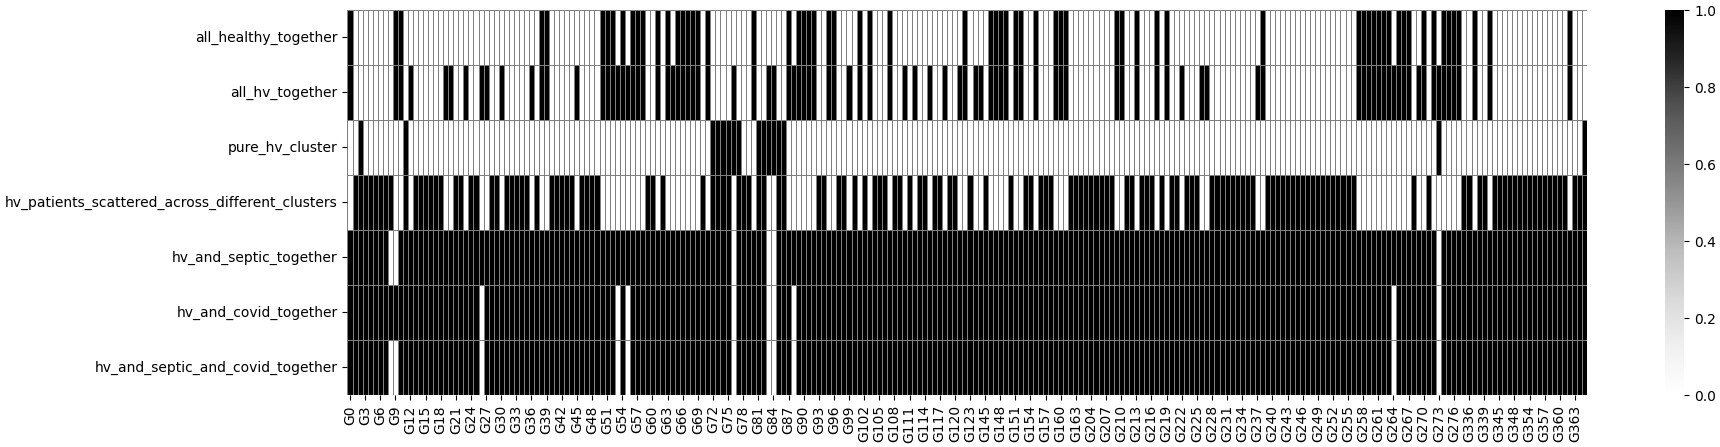

In [950]:
fig, ax = plt.subplots(figsize=(20,5))
sb.heatmap(healthy_patient_info_kernel.transpose(), ax = ax, cmap = "Greys", linecolor = "Grey", linewidth = 0.4)

In [951]:
patient_to_disease_group_74 = dict(graphs_74["G0"].obs.DiseaseGroup)
patient_to_disease_74 = dict(graphs_74["G0"].obs.Disease)

(74, 2)


Text(0.5, 1.0, 'Disease Group')

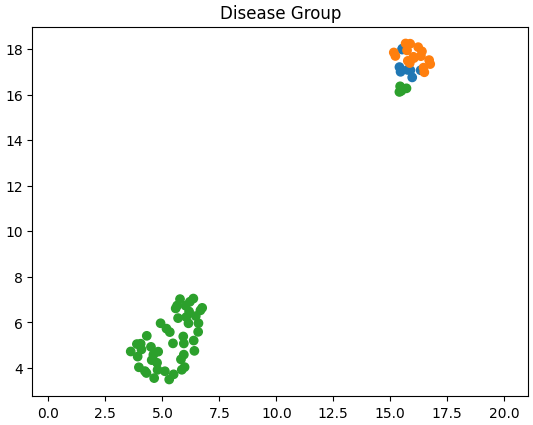

In [952]:
df = pd.DataFrame().from_dict(are_all_closest_neighbors_of_the_same_disease_group)

reducer = umap.UMAP()
embedding1 = reducer.fit_transform(df)
print(embedding1.shape)

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in pd.DataFrame(patient_to_disease_group_74, index= ["DiseaseGroup"]).T.DiseaseGroup.map({"Healthy":0, "Sepsis":1, "COVID":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title("Disease Group")

Text(0.5, 1.0, 'Respiratory support')

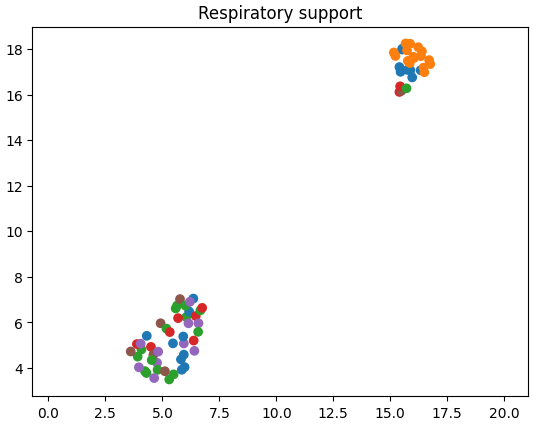

In [953]:
x = graphs_74["G0"].obs.Respiratorysupport

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in pd.DataFrame(dict(x), index= ["Feature"]).T.Feature.map({j:i for i, j in enumerate(x.unique())})])
plt.gca().set_aspect('equal', 'datalim')
plt.title("Respiratory support")


Text(0.5, 1.0, 'Symptomatic')

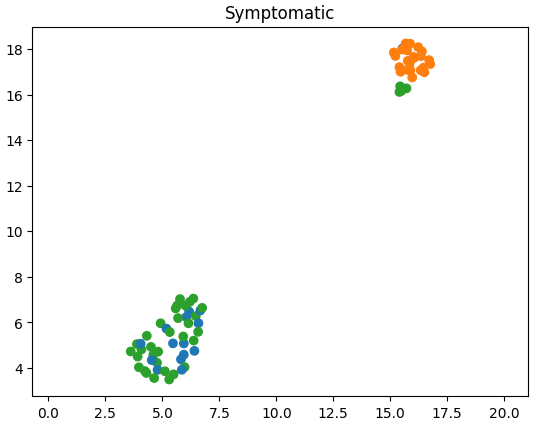

In [954]:
x = graphs_74["G0"].obs.Symptomatic

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in pd.DataFrame(dict(x), index= ["Feature"]).T.Feature.map({j:i for i, j in enumerate(x.unique())})])
plt.gca().set_aspect('equal', 'datalim')
plt.title("Symptomatic")


Text(0.5, 1.0, 'SARSCoV2 PCR')

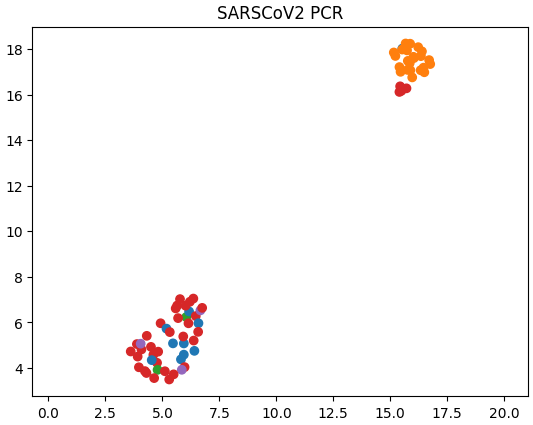

In [955]:
x = graphs_74["G0"].obs.SARSCoV2PCR

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in pd.DataFrame(dict(x), index= ["Feature"]).T.Feature.map({j:i for i, j in enumerate(x.unique())})])
plt.gca().set_aspect('equal', 'datalim')
plt.title("SARSCoV2 PCR")

(74, 2)


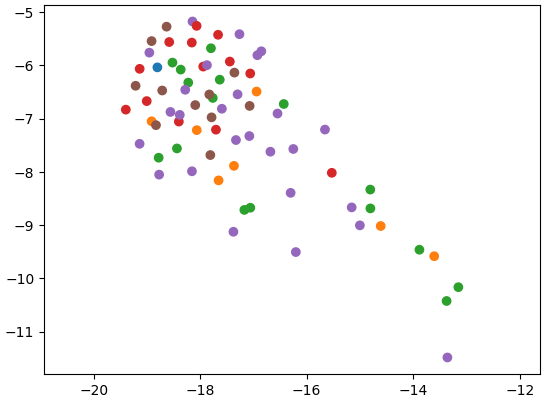

In [956]:
df = pd.DataFrame().from_dict(are_all_closest_neighbors_of_the_same_disease)

reducer = umap.UMAP()
embedding2 = reducer.fit_transform(df)
print(embedding2.shape)

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding2[:, 0],
    embedding2[:, 1],
    c=[sb.color_palette()[x] for x in pd.DataFrame(patient_to_disease_74, index= ["Disease"]).T.Disease.map({'COVID_HCW_MILD':0, 'HV':1, 'Sepsis':2, 'COVID_MILD':3, 'COVID_SEV':4,
       'COVID_CRIT':5})])
plt.gca().set_aspect('equal', 'datalim')

<Axes: >

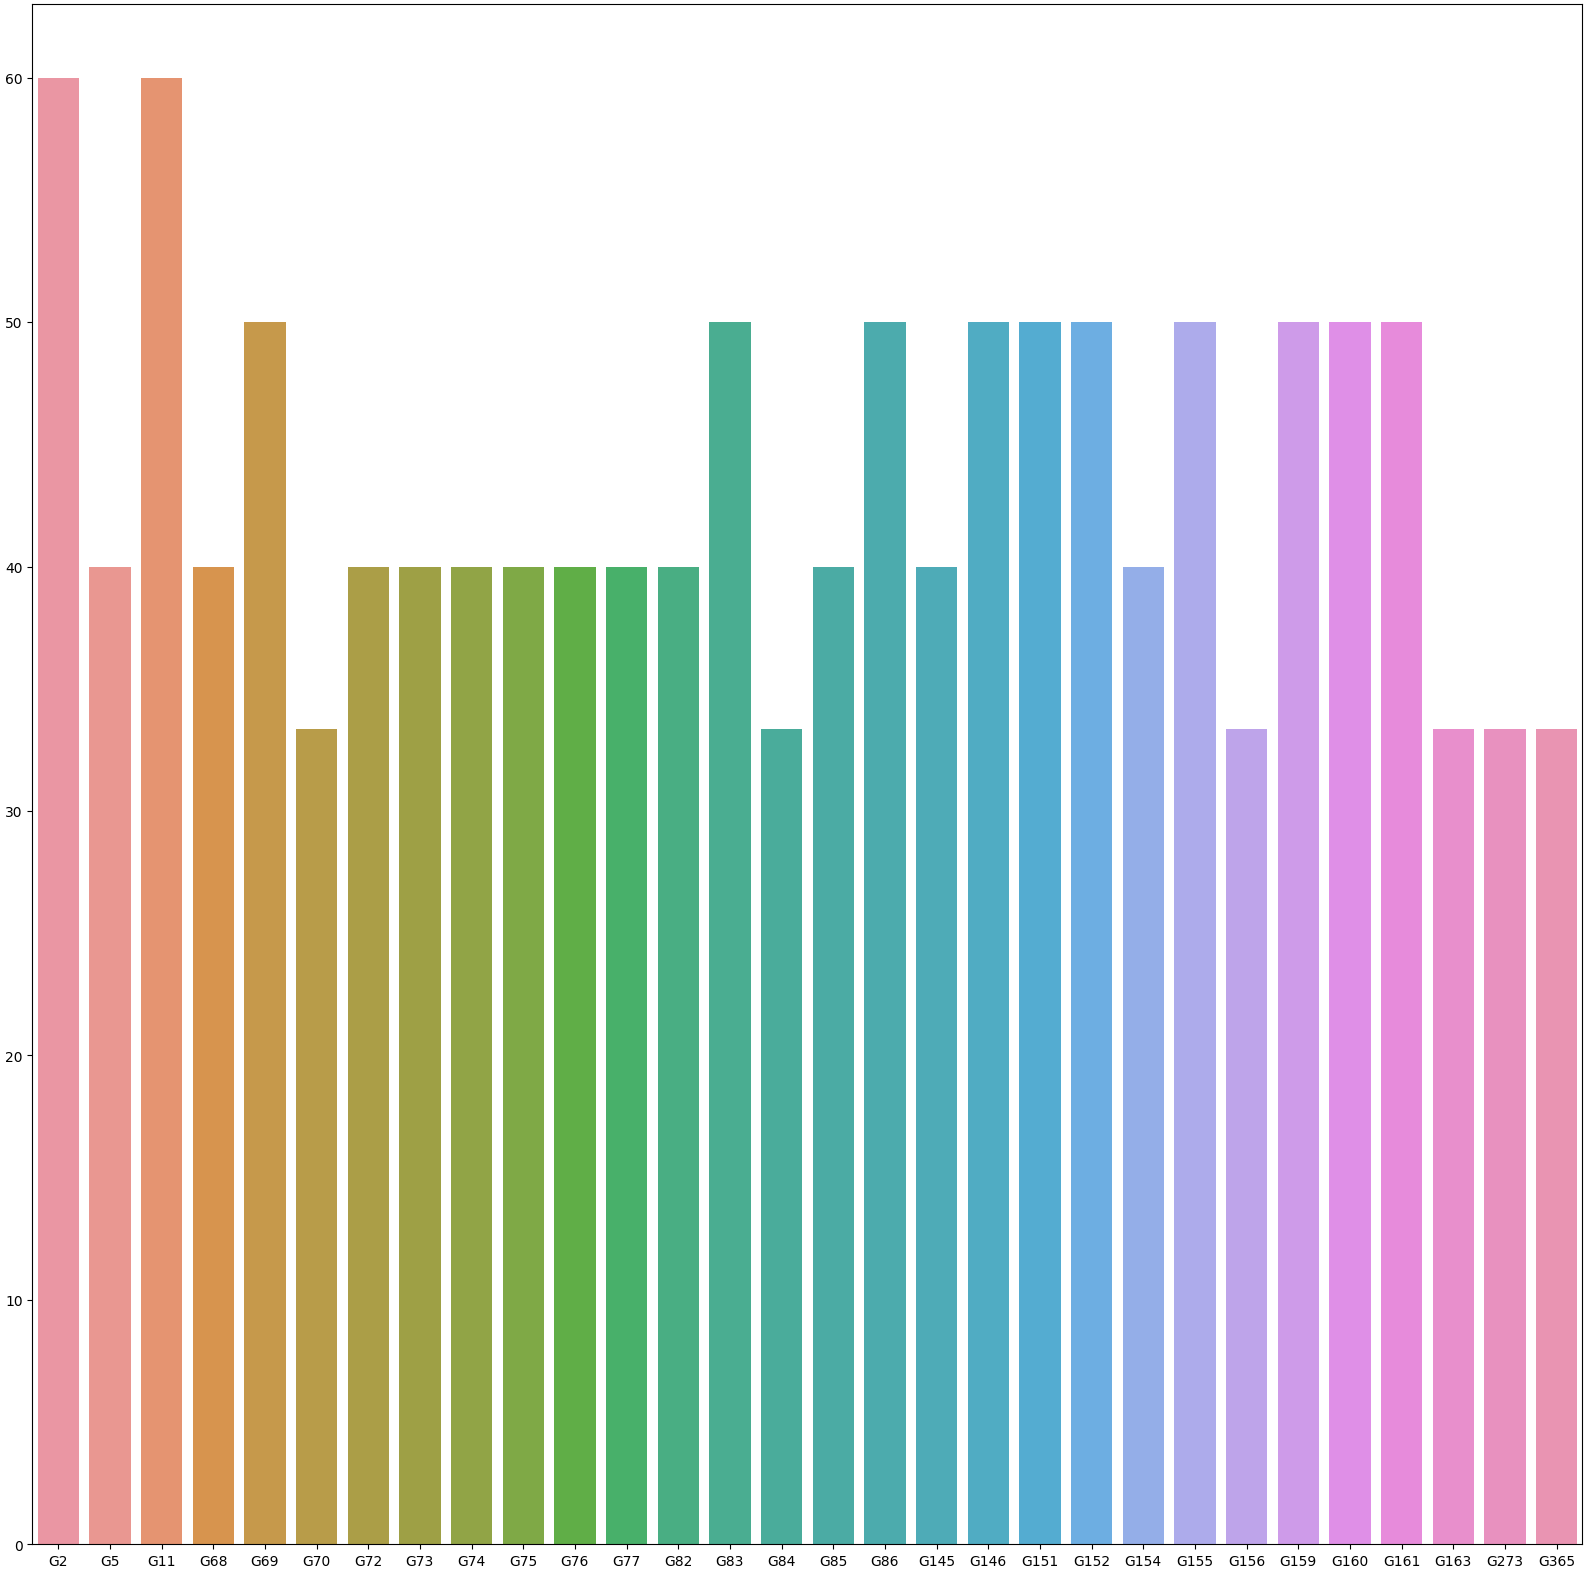

In [957]:
fig, ax = plt.subplots(figsize=(20,20))
df = pd.DataFrame(what_kernel_graph_has_the_purest_cluster, index = ["percent of pure clusters"]).T
sb.barplot(df[df["percent of pure clusters"] > 30].T, ax = ax)

(74, 2)


Text(0.5, 1.0, 'Disease Group')

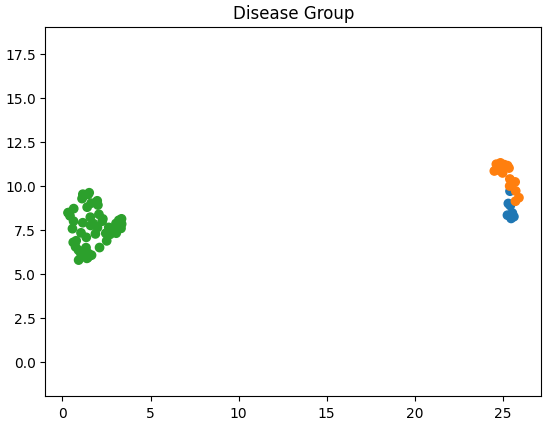

In [958]:
df = pd.DataFrame().from_dict(is_kernel_classification_correct)

reducer = umap.UMAP()
embedding3 = reducer.fit_transform(df)
print(embedding3.shape)

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding3[:, 0],
    embedding3[:, 1],
    c=[sb.color_palette()[x] for x in pd.DataFrame(patient_to_disease_group_74, index= ["DiseaseGroup"]).T.DiseaseGroup.map({"Healthy":0, "Sepsis":1, "COVID":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title("Disease Group")

Text(0.5, 1.0, 'Respiratory support')

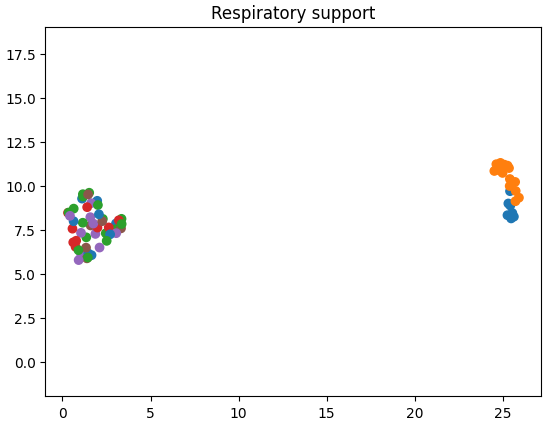

In [959]:
x = graphs_74["G0"].obs.Respiratorysupport

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding3[:, 0],
    embedding3[:, 1],
    c=[sb.color_palette()[x] for x in pd.DataFrame(dict(x), index= ["Feature"]).T.Feature.map({j:i for i, j in enumerate(x.unique())})])
plt.gca().set_aspect('equal', 'datalim')
plt.title("Respiratory support")

# By Modality

## TEST

In [111]:
def knn(g, k, metric): # g is an AnnData Object
    scp.pp.neighbors(g, n_neighbors = k, use_rep='X', metric =  metric) 
    return np.array(sparse.csr_matrix.todense(g.obsp["connectivities"]), dtype = "float64") # Returns a matrix

In [112]:
x = knn(graphs_74["G20"], k = 4, metric = "seuclidean")

In [113]:
for i in range(74):
    x[i][i] = 0

<Axes: >

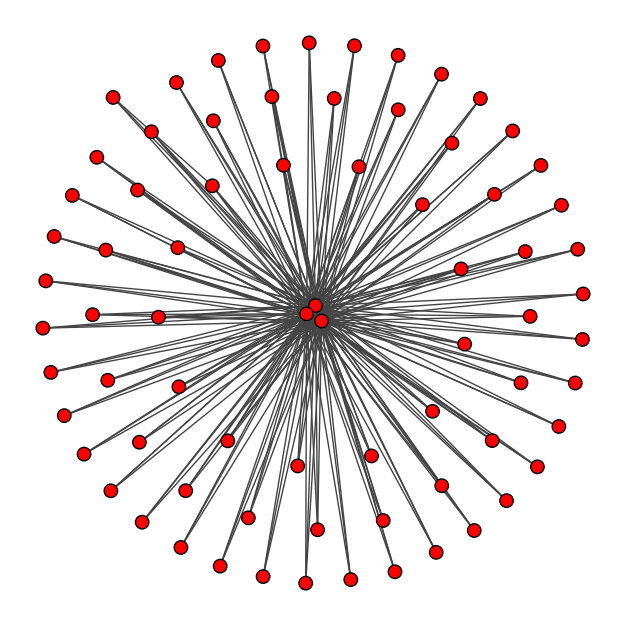

In [114]:
graph = ig.Graph.Adjacency((x > 0).tolist(), mode = "undirected")
graph.vs["name"] =  graphs_74["G20"].obs_names
graph.vs["d"] = graphs_74["G20"].obs.Disease
graph.vs["dg"] = graphs_74["G20"].obs.DiseaseGroup
graph.es['weight'] = correlations["G20"][correlations["G20"].nonzero()]
graph = graph.as_undirected()
    

fig, ax = plt.subplots(figsize=(15,8))

ig.plot(
        graph,
        edge_width=1,
        target=ax,
        vertex_size=0.3,
    )

<Axes: xlabel='DiseaseGroup', ylabel='DiseaseGroup'>

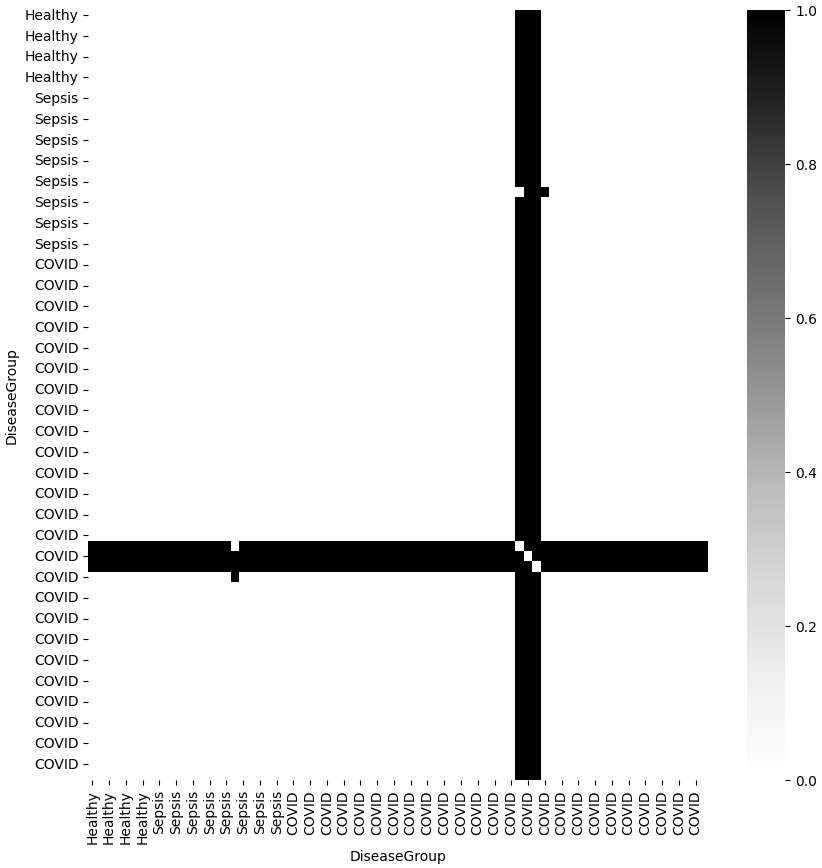

In [115]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(pd.DataFrame(x, index=graphs_74["G0"].obs.DiseaseGroup, columns=graphs_74["G0"].obs.DiseaseGroup), cmap="Greys")

<Axes: xlabel='DiseaseGroup', ylabel='DiseaseGroup'>

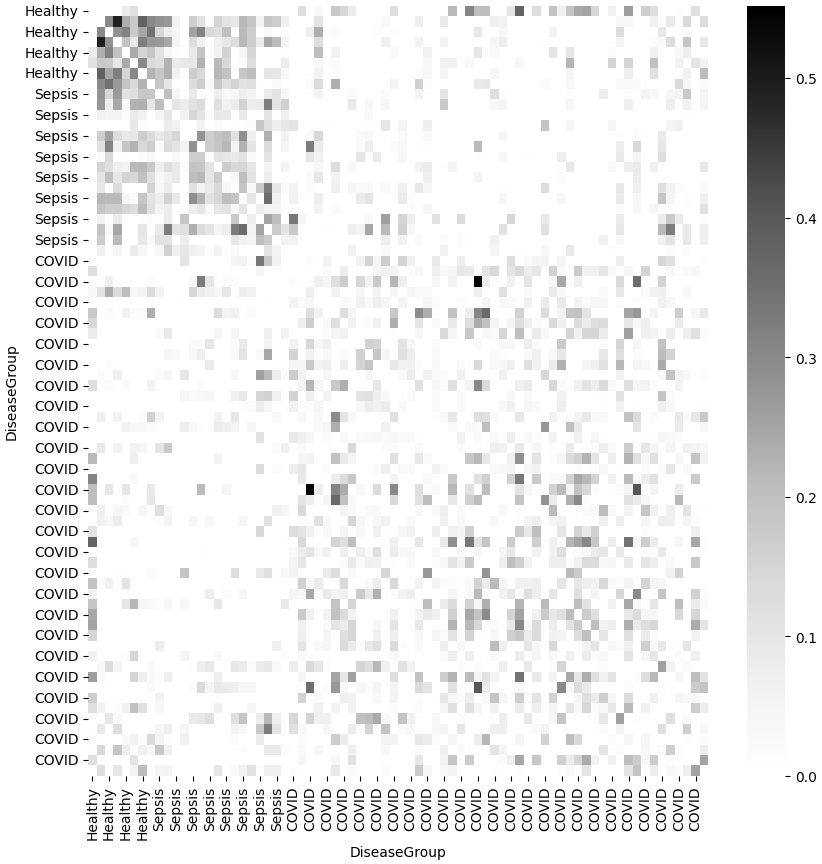

In [116]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(pd.DataFrame(correlations["G20"], index=graphs_74["G0"].obs.DiseaseGroup, columns=graphs_74["G0"].obs.DiseaseGroup), cmap="Greys")

<Axes: >

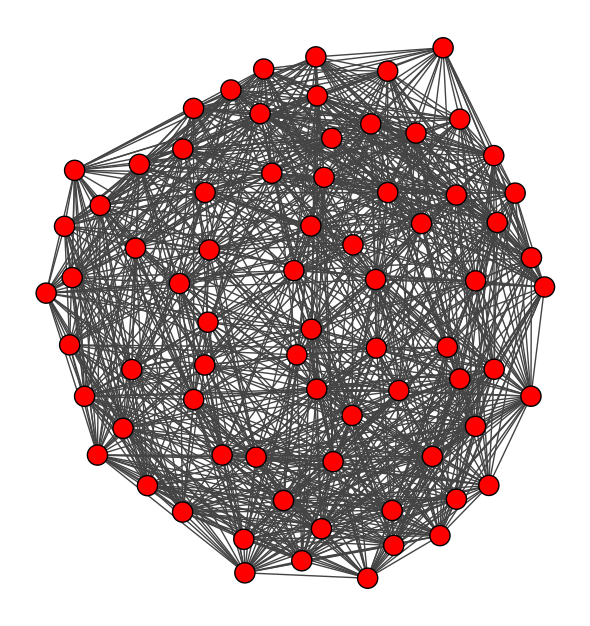

In [117]:
graph = ig.Graph.Adjacency((correlations["G20"] > 0).tolist(), mode = "undirected")
graph.vs["name"] =  graphs_74["G20"].obs_names
graph.vs["d"] = graphs_74["G20"].obs.Disease
graph.vs["dg"] = graphs_74["G20"].obs.DiseaseGroup
graph.es['weight'] = correlations["G20"][correlations["G20"].nonzero()]
graph = graph.as_undirected()
    

fig, ax = plt.subplots(figsize=(15,8))

ig.plot(
        graph,
        edge_width=1,
        target=ax,
        vertex_size=0.3,
    )

In [994]:
snf_fused = compute.snf(list(kernel_PSNs.values()), K=6, t = 50)

In [995]:
adj = snf_fused.copy()
adj[adj<0.005] = 0
exist = (adj != 0) * 1.0
   
#calculate the degree matrix
factor = np.ones(adj.shape[1])
res = np.dot(exist, factor)     #degree of each node
diag_matrix = np.diag(res)  #degree matrix
   

#calculate the laplace matrix
d_inv = np.linalg.inv(diag_matrix)
adj_hat = d_inv.dot(exist)

<Axes: >

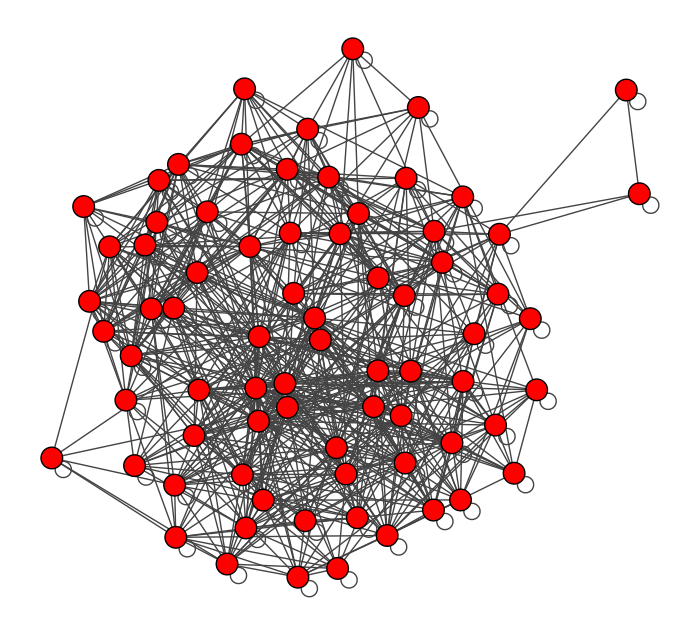

In [981]:
graph = ig.Graph.Adjacency((adj_hat > 0).tolist(), mode = "undirected")
graph.vs["name"] =  graphs_74["G20"].obs_names
graph.vs["d"] = graphs_74["G20"].obs.Disease
graph.vs["dg"] = graphs_74["G20"].obs.DiseaseGroup
graph.es['weight'] = adj_hat[adj_hat.nonzero()]
graph = graph.as_undirected()
    

fig, ax = plt.subplots(figsize=(15,8))

ig.plot(
        graph,
        edge_width=1,
        target=ax,
        vertex_size=0.3,
    )

<Axes: xlabel='DiseaseGroup', ylabel='DiseaseGroup'>

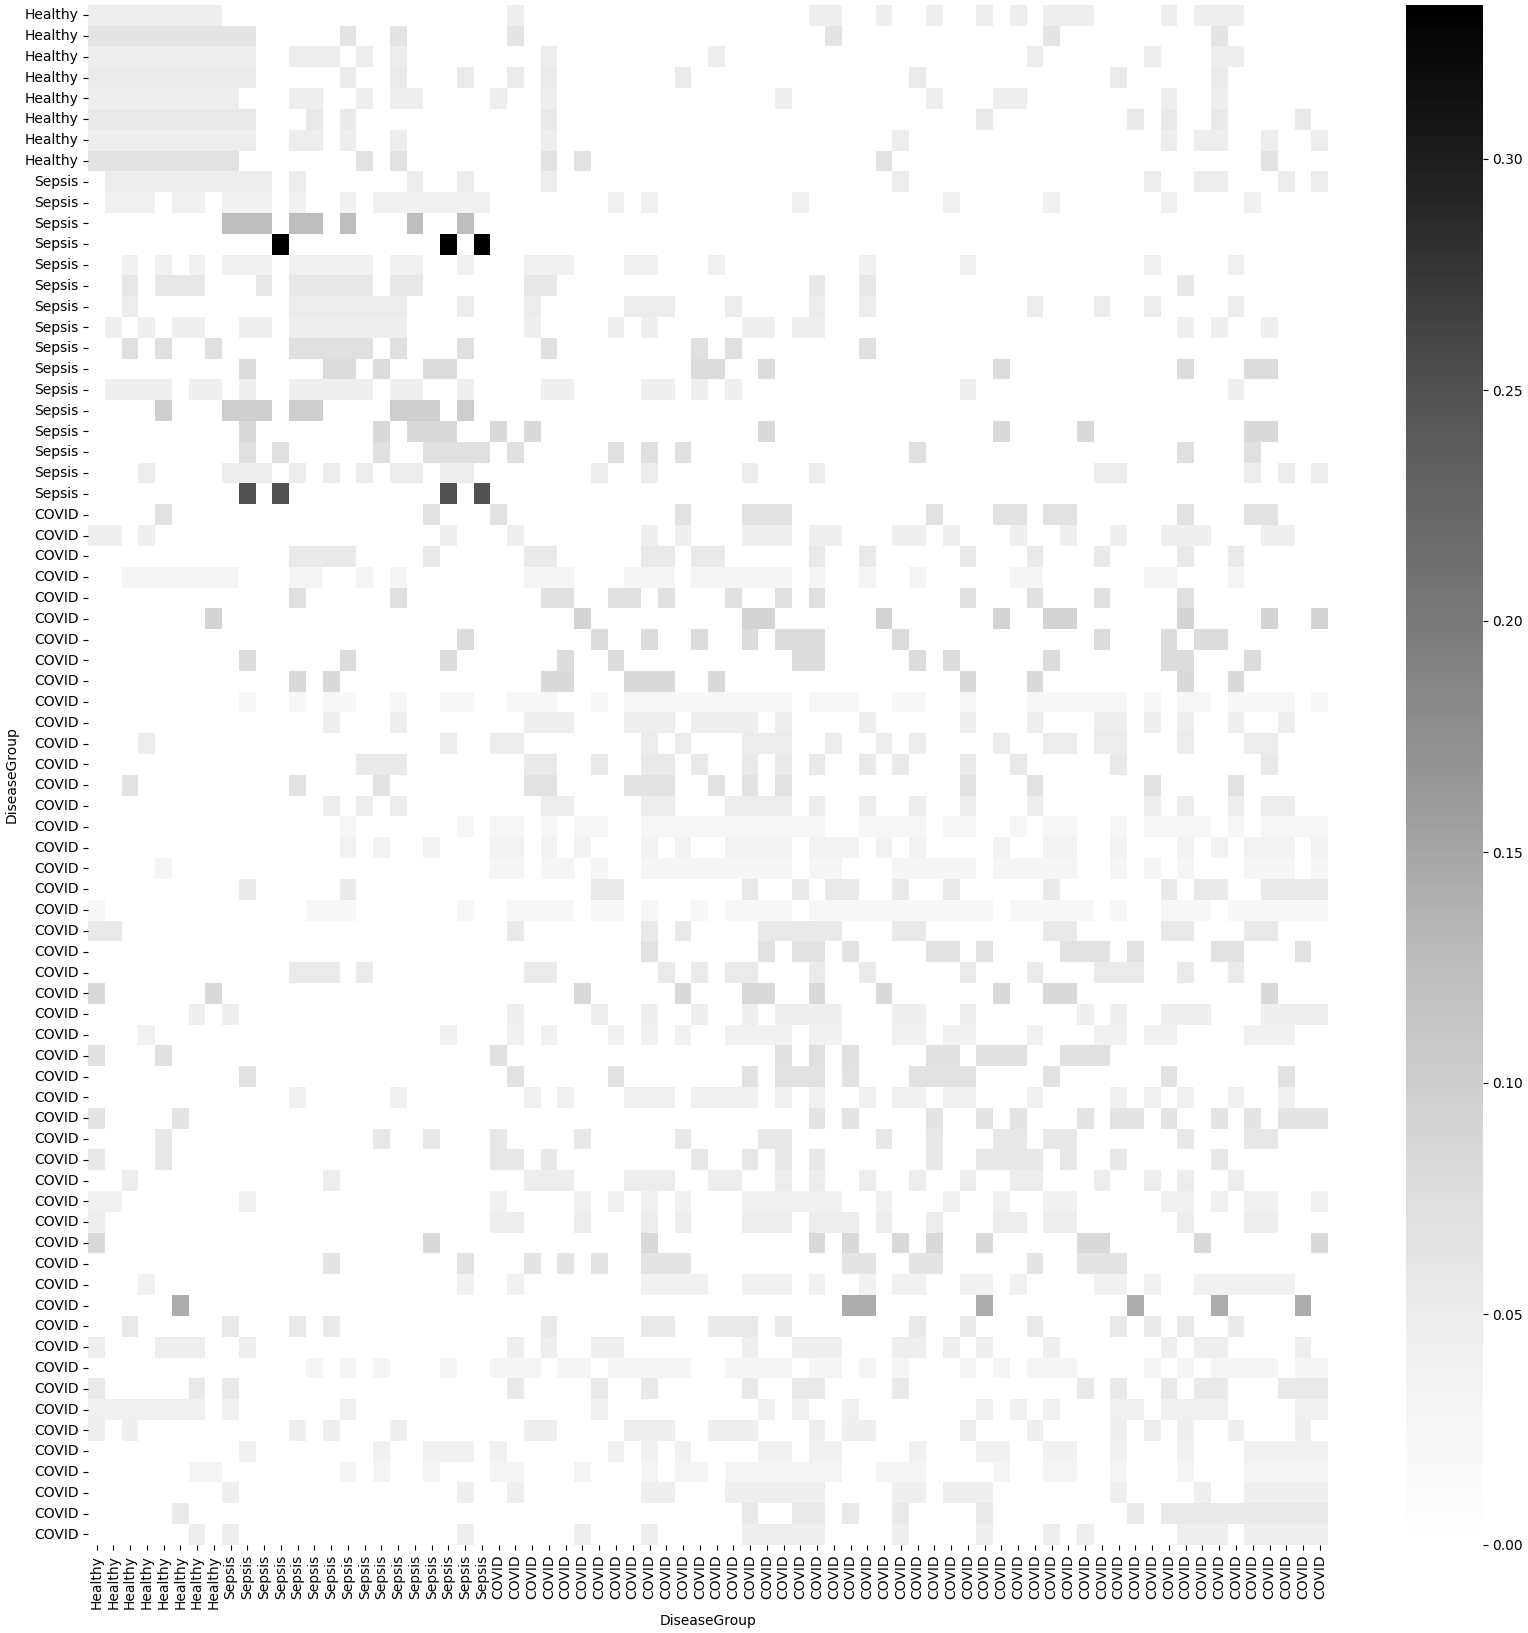

In [983]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pd.DataFrame(adj_hat, index=graphs_74["G0"].obs.DiseaseGroup, columns=graphs_74["G0"].obs.DiseaseGroup), cmap="Greys")

## Edge weights between diseases in a modality

### KNN

<Axes: >

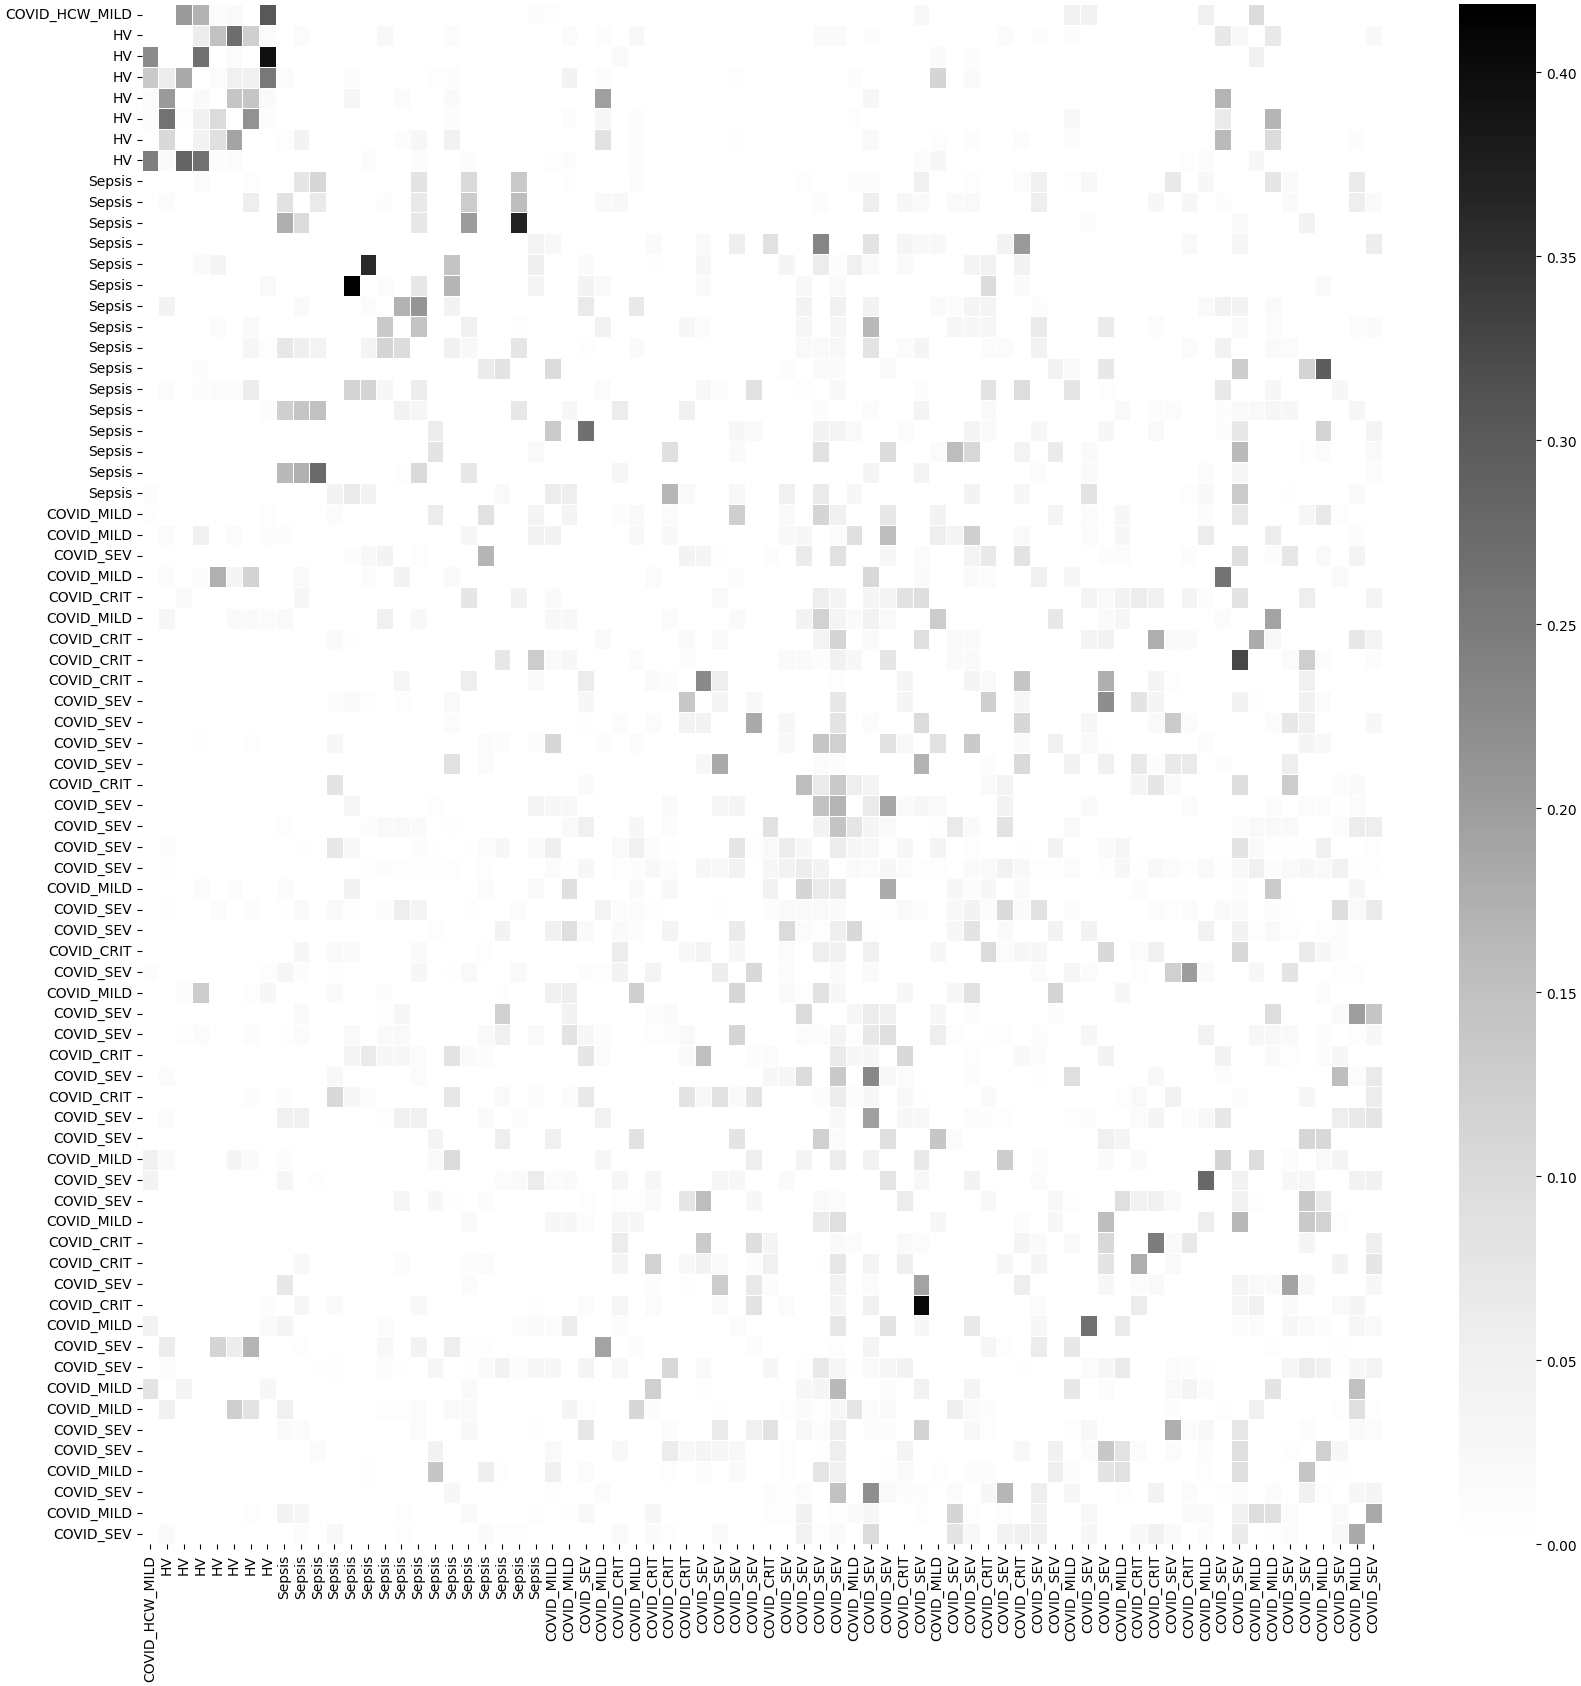

In [927]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pd.DataFrame(make_transition_matrix(bulkRNA_wa_knn), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)), linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

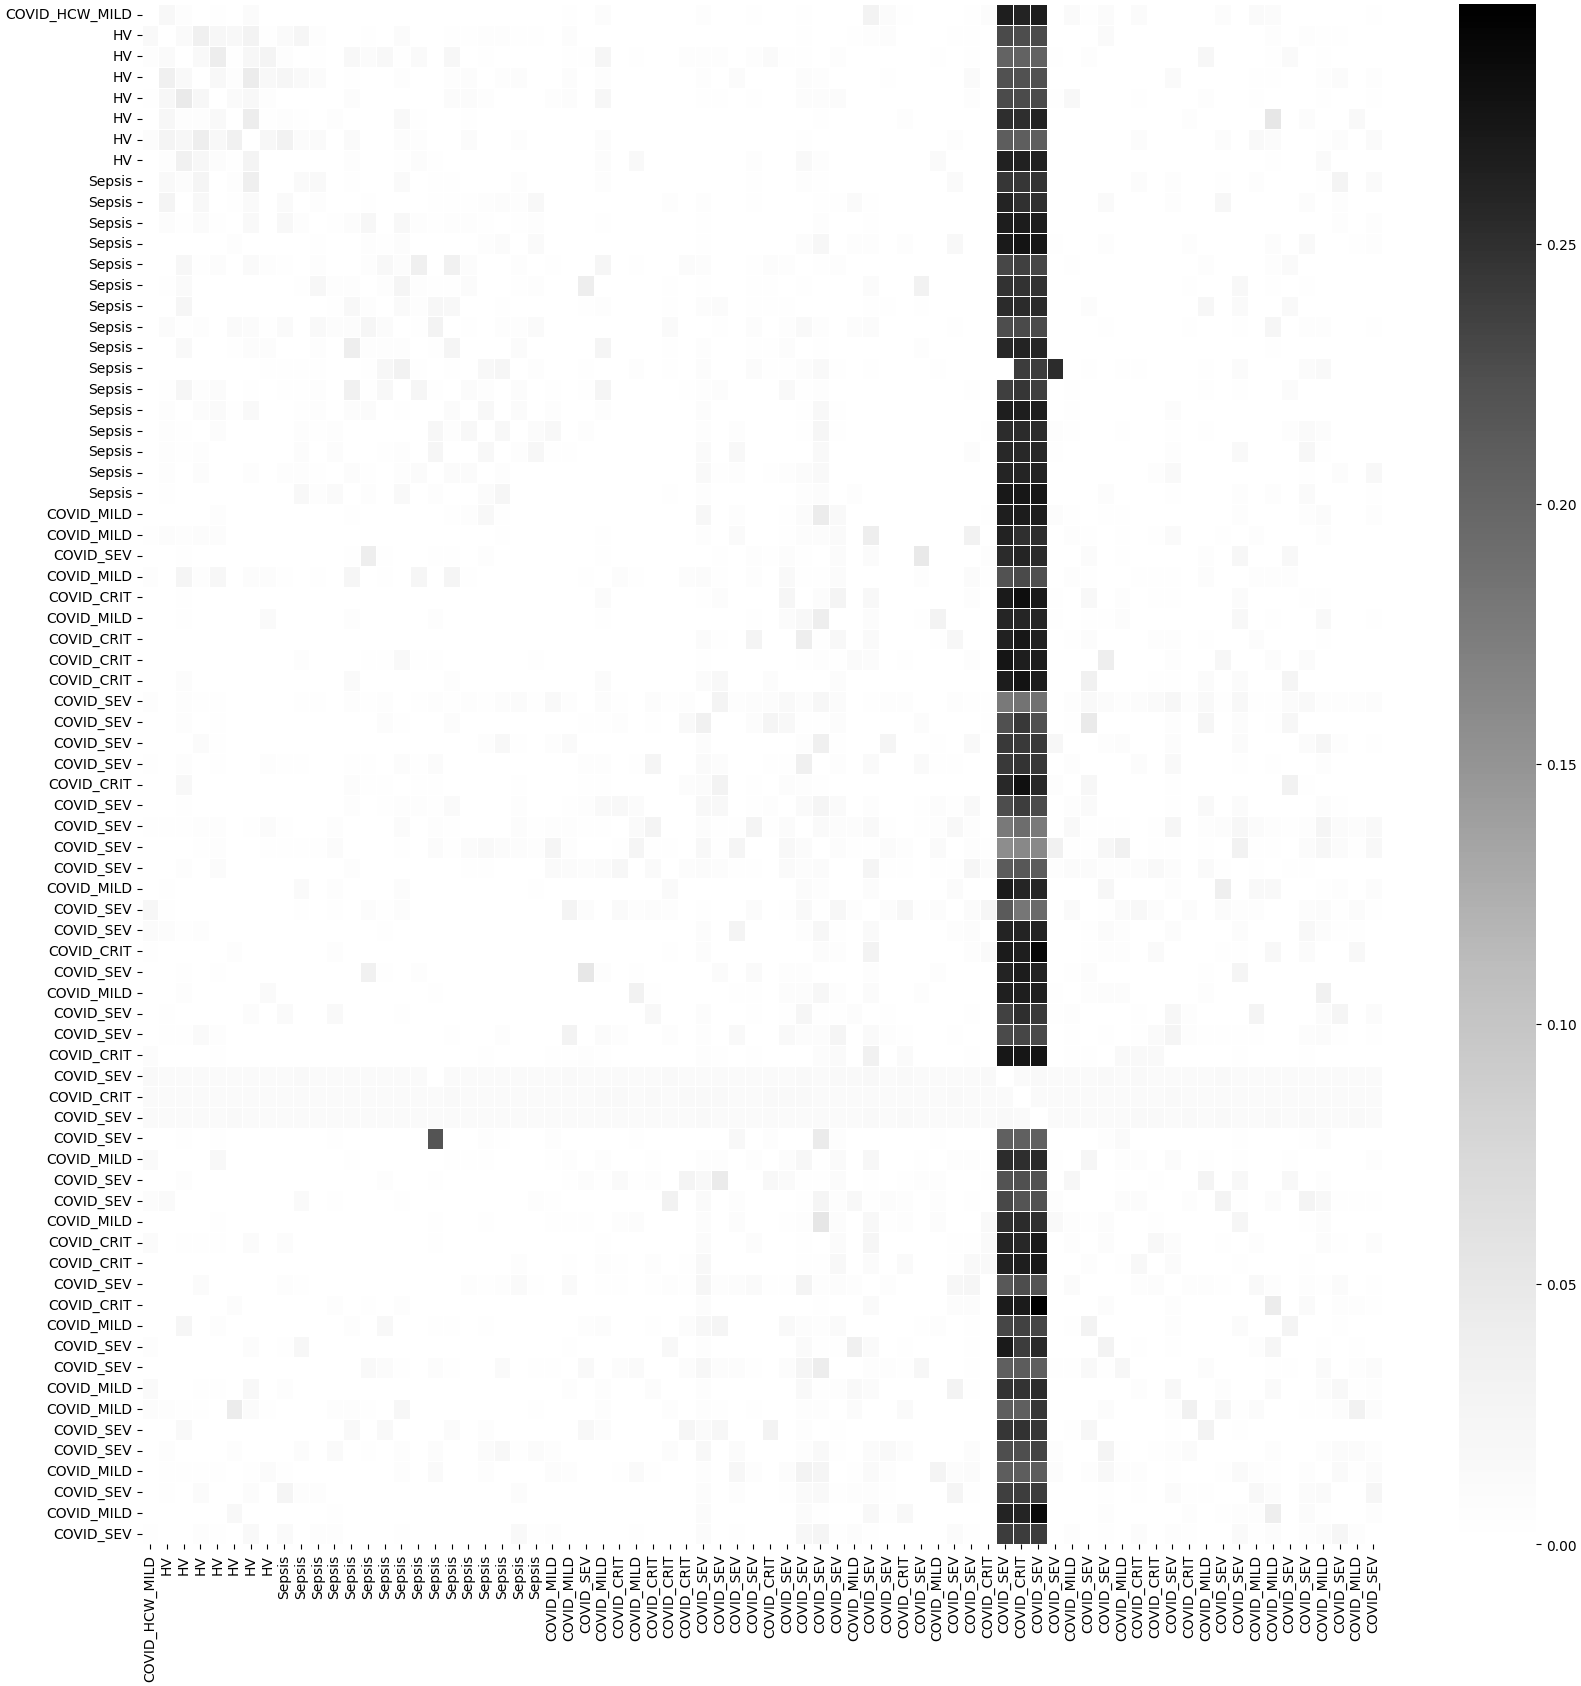

In [928]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pd.DataFrame(make_transition_matrix(citeRNA_wa_knn), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)), linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

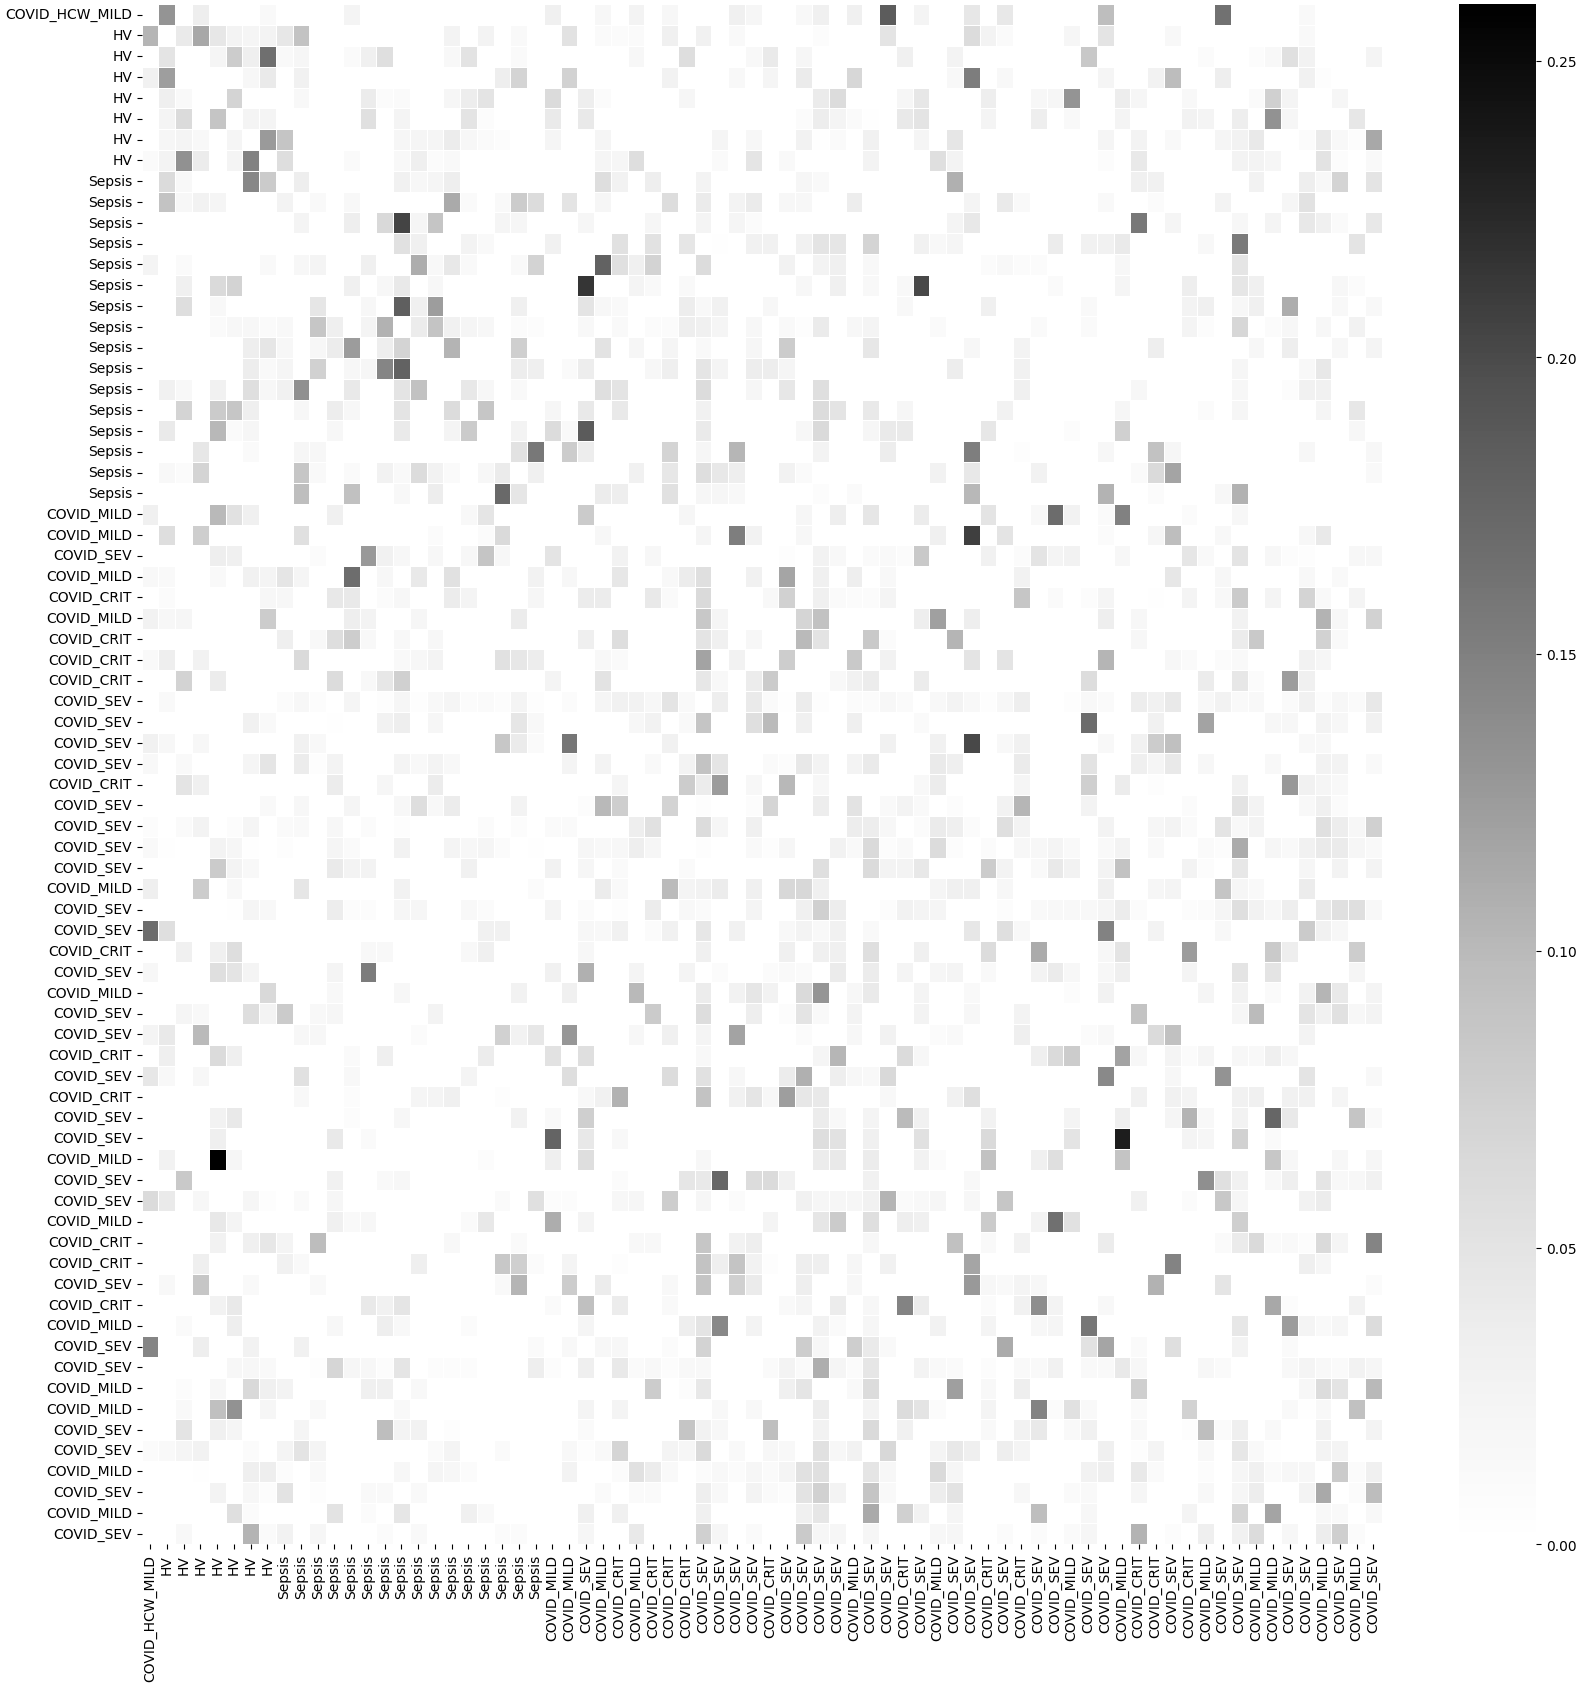

In [929]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pd.DataFrame(make_transition_matrix(adt_wa_knn), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)), linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

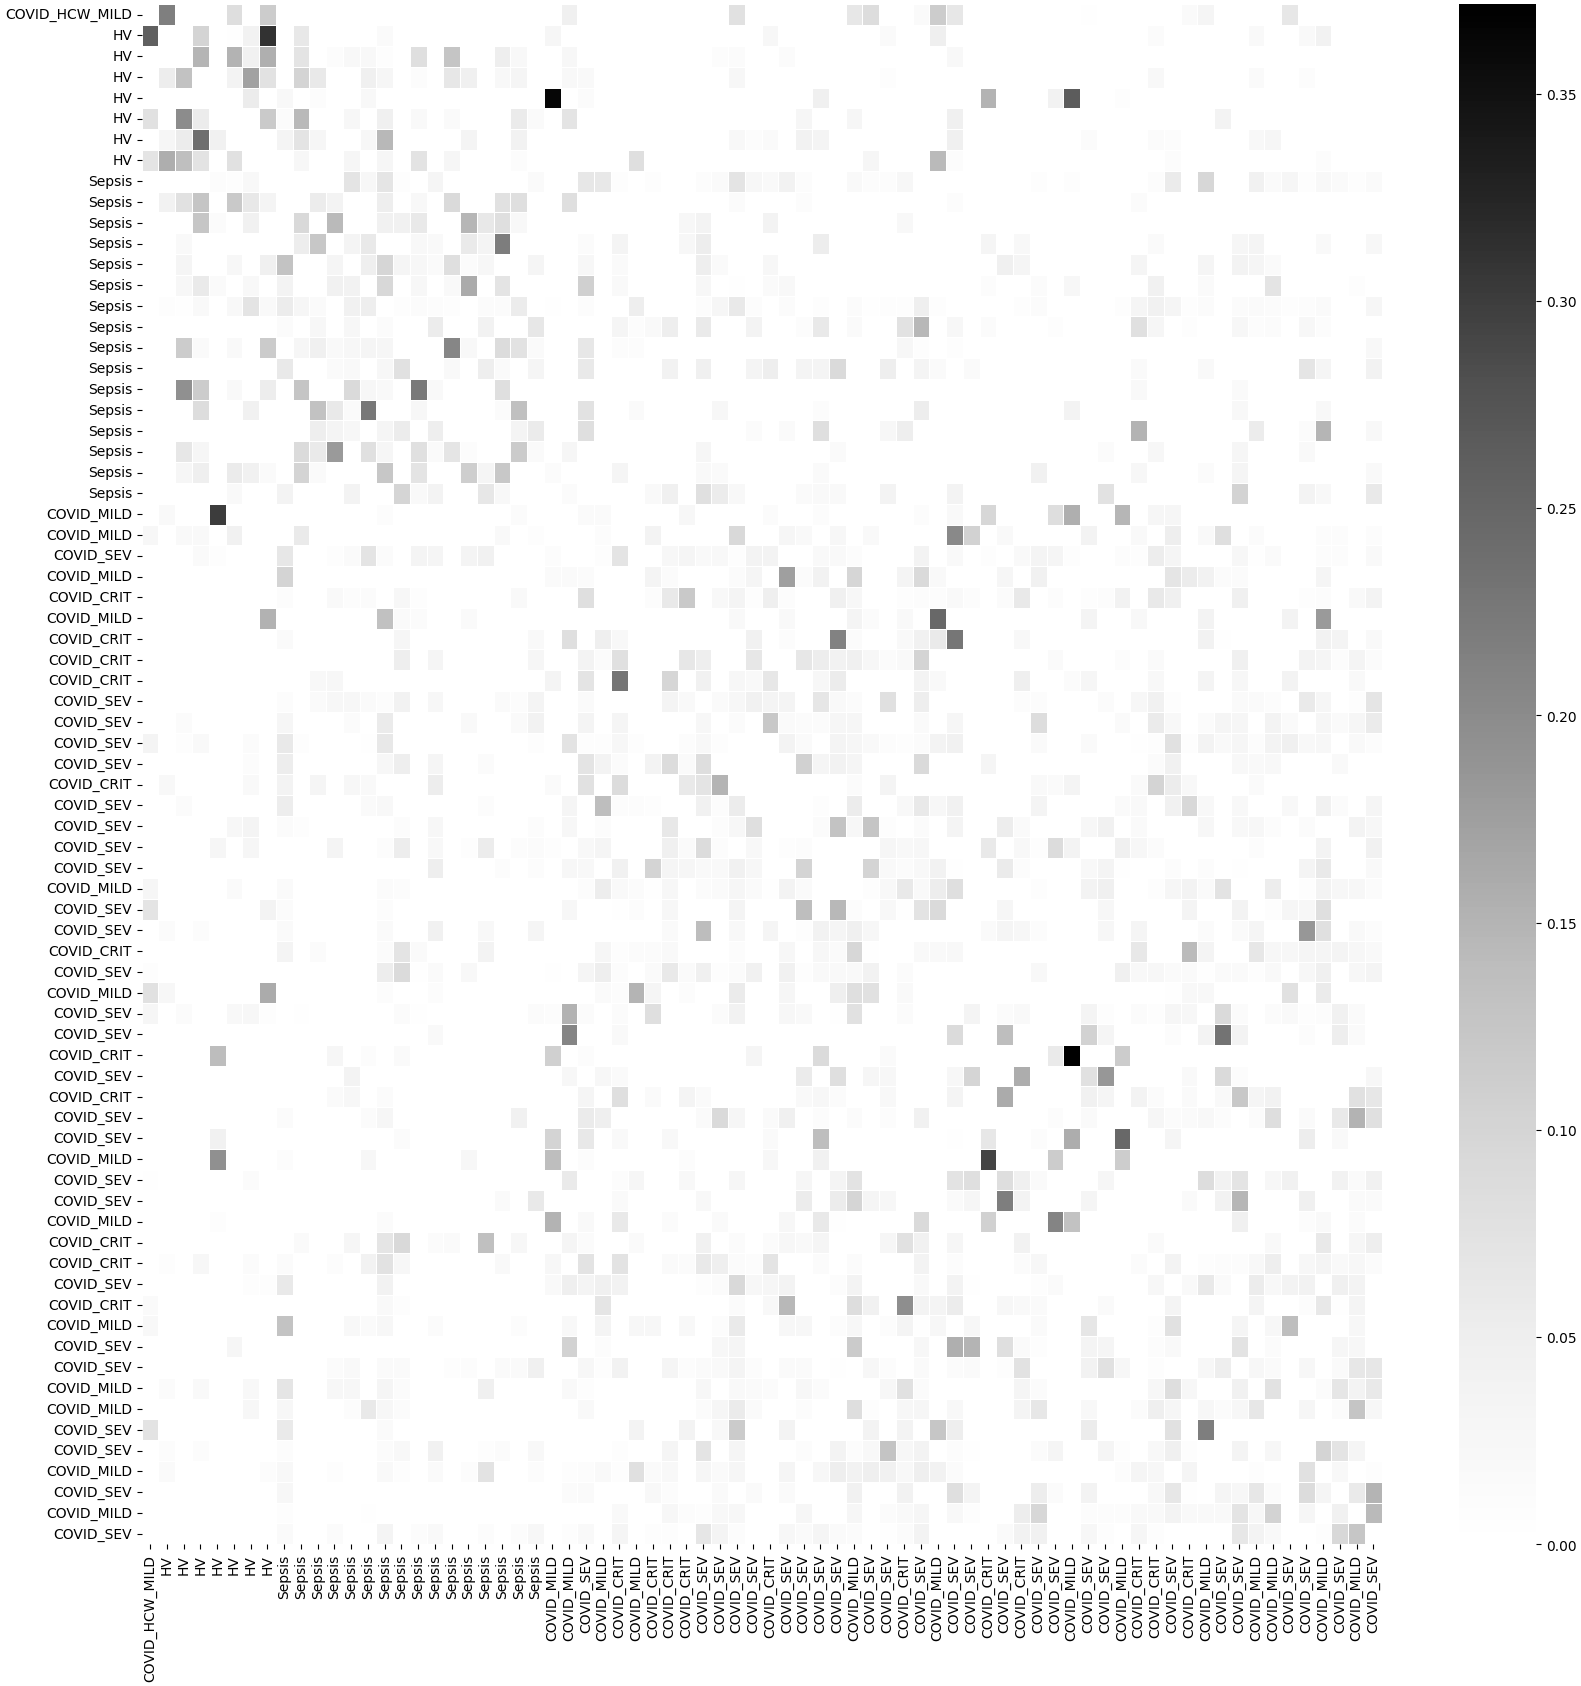

In [930]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pd.DataFrame(make_transition_matrix(cytof_wa_knn), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)), linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

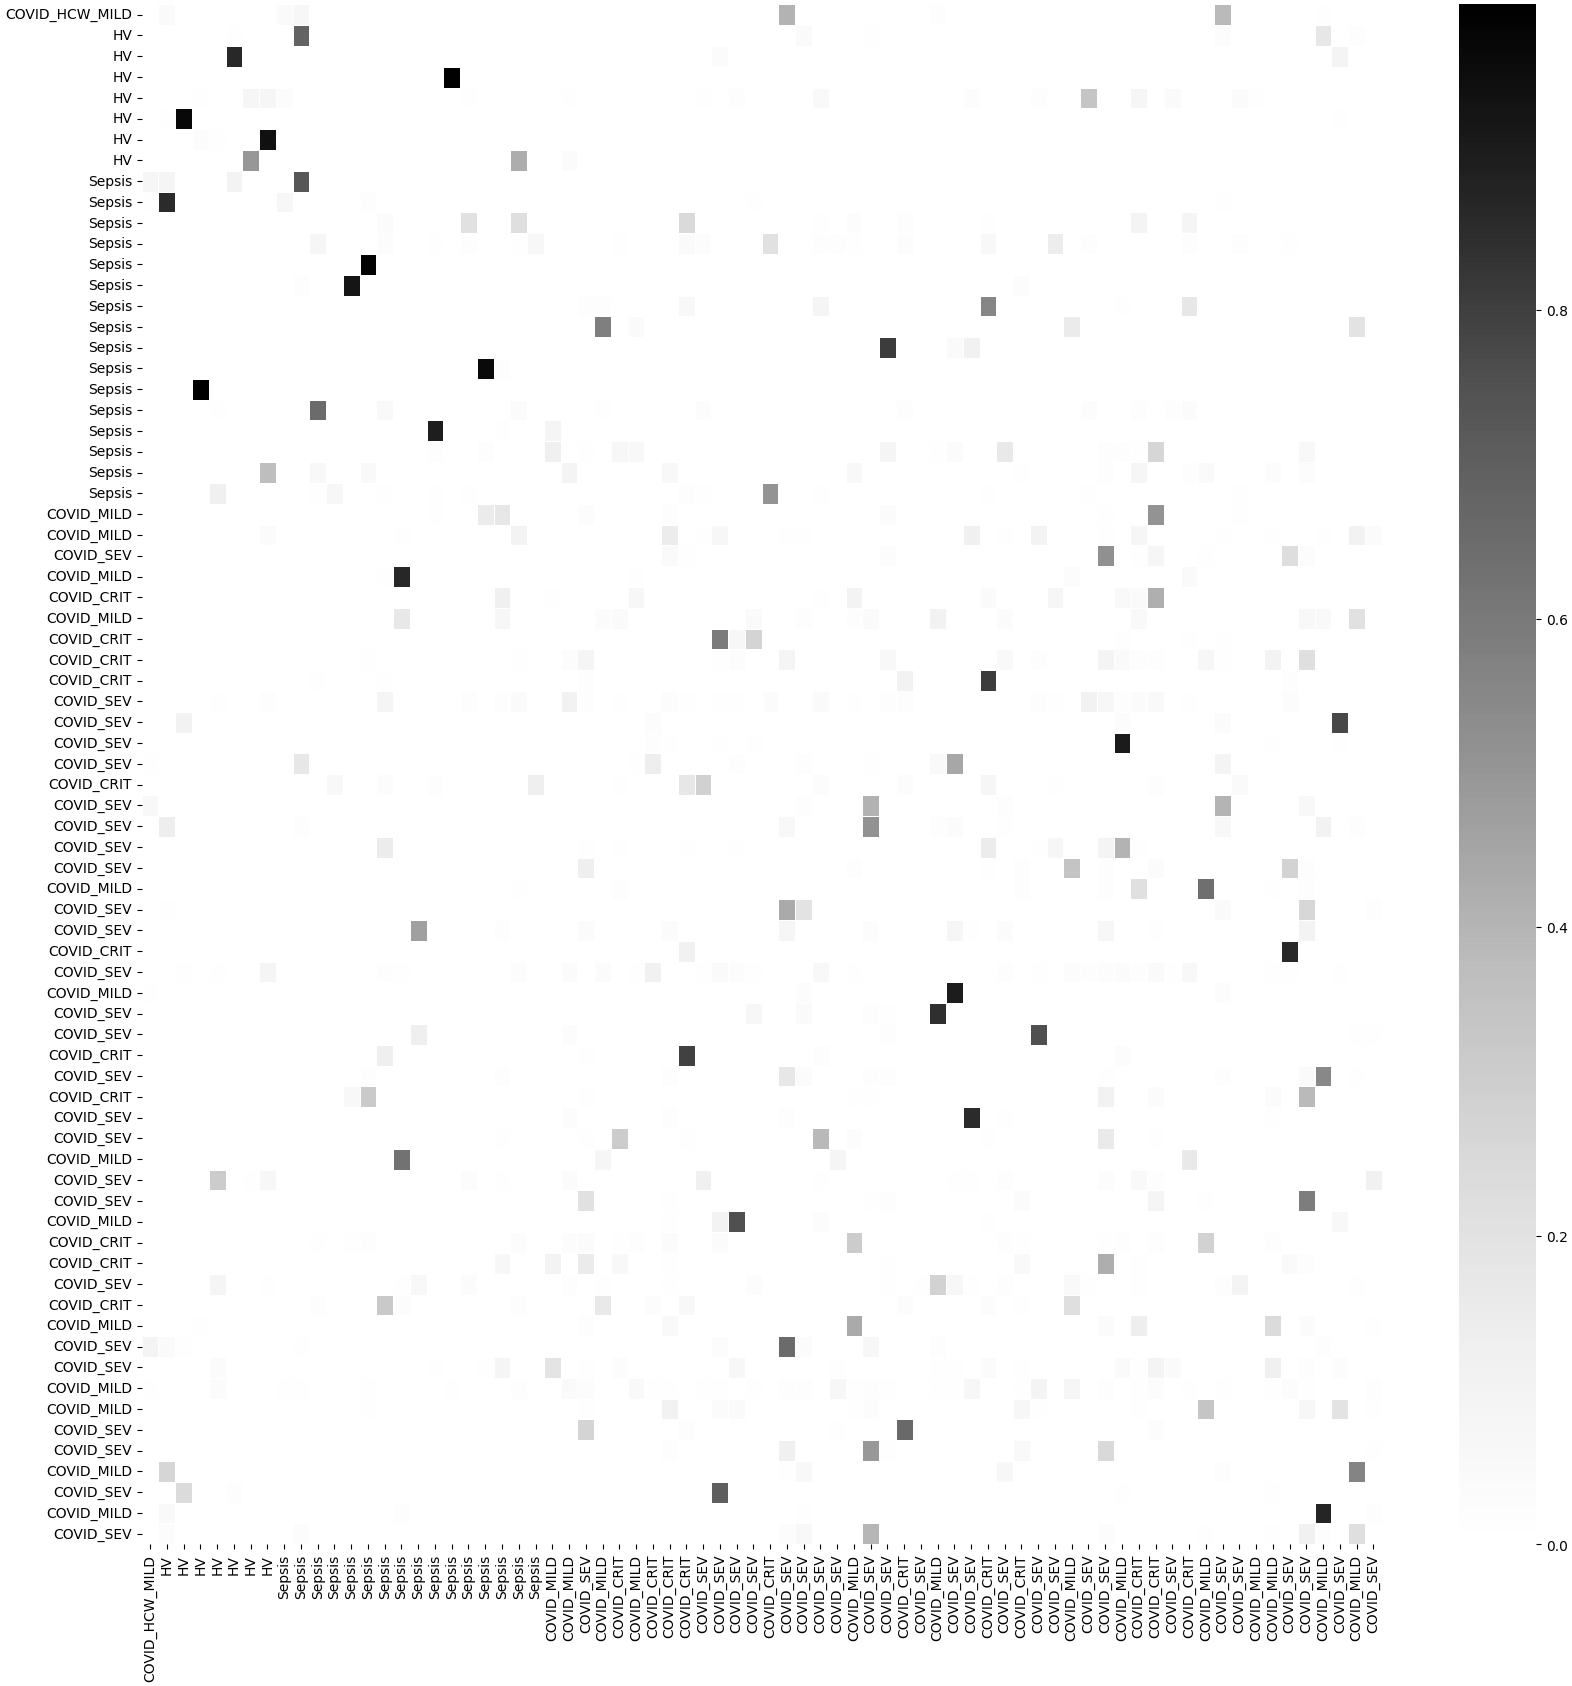

In [931]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pd.DataFrame(make_transition_matrix(luminex_wa_knn), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)), linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

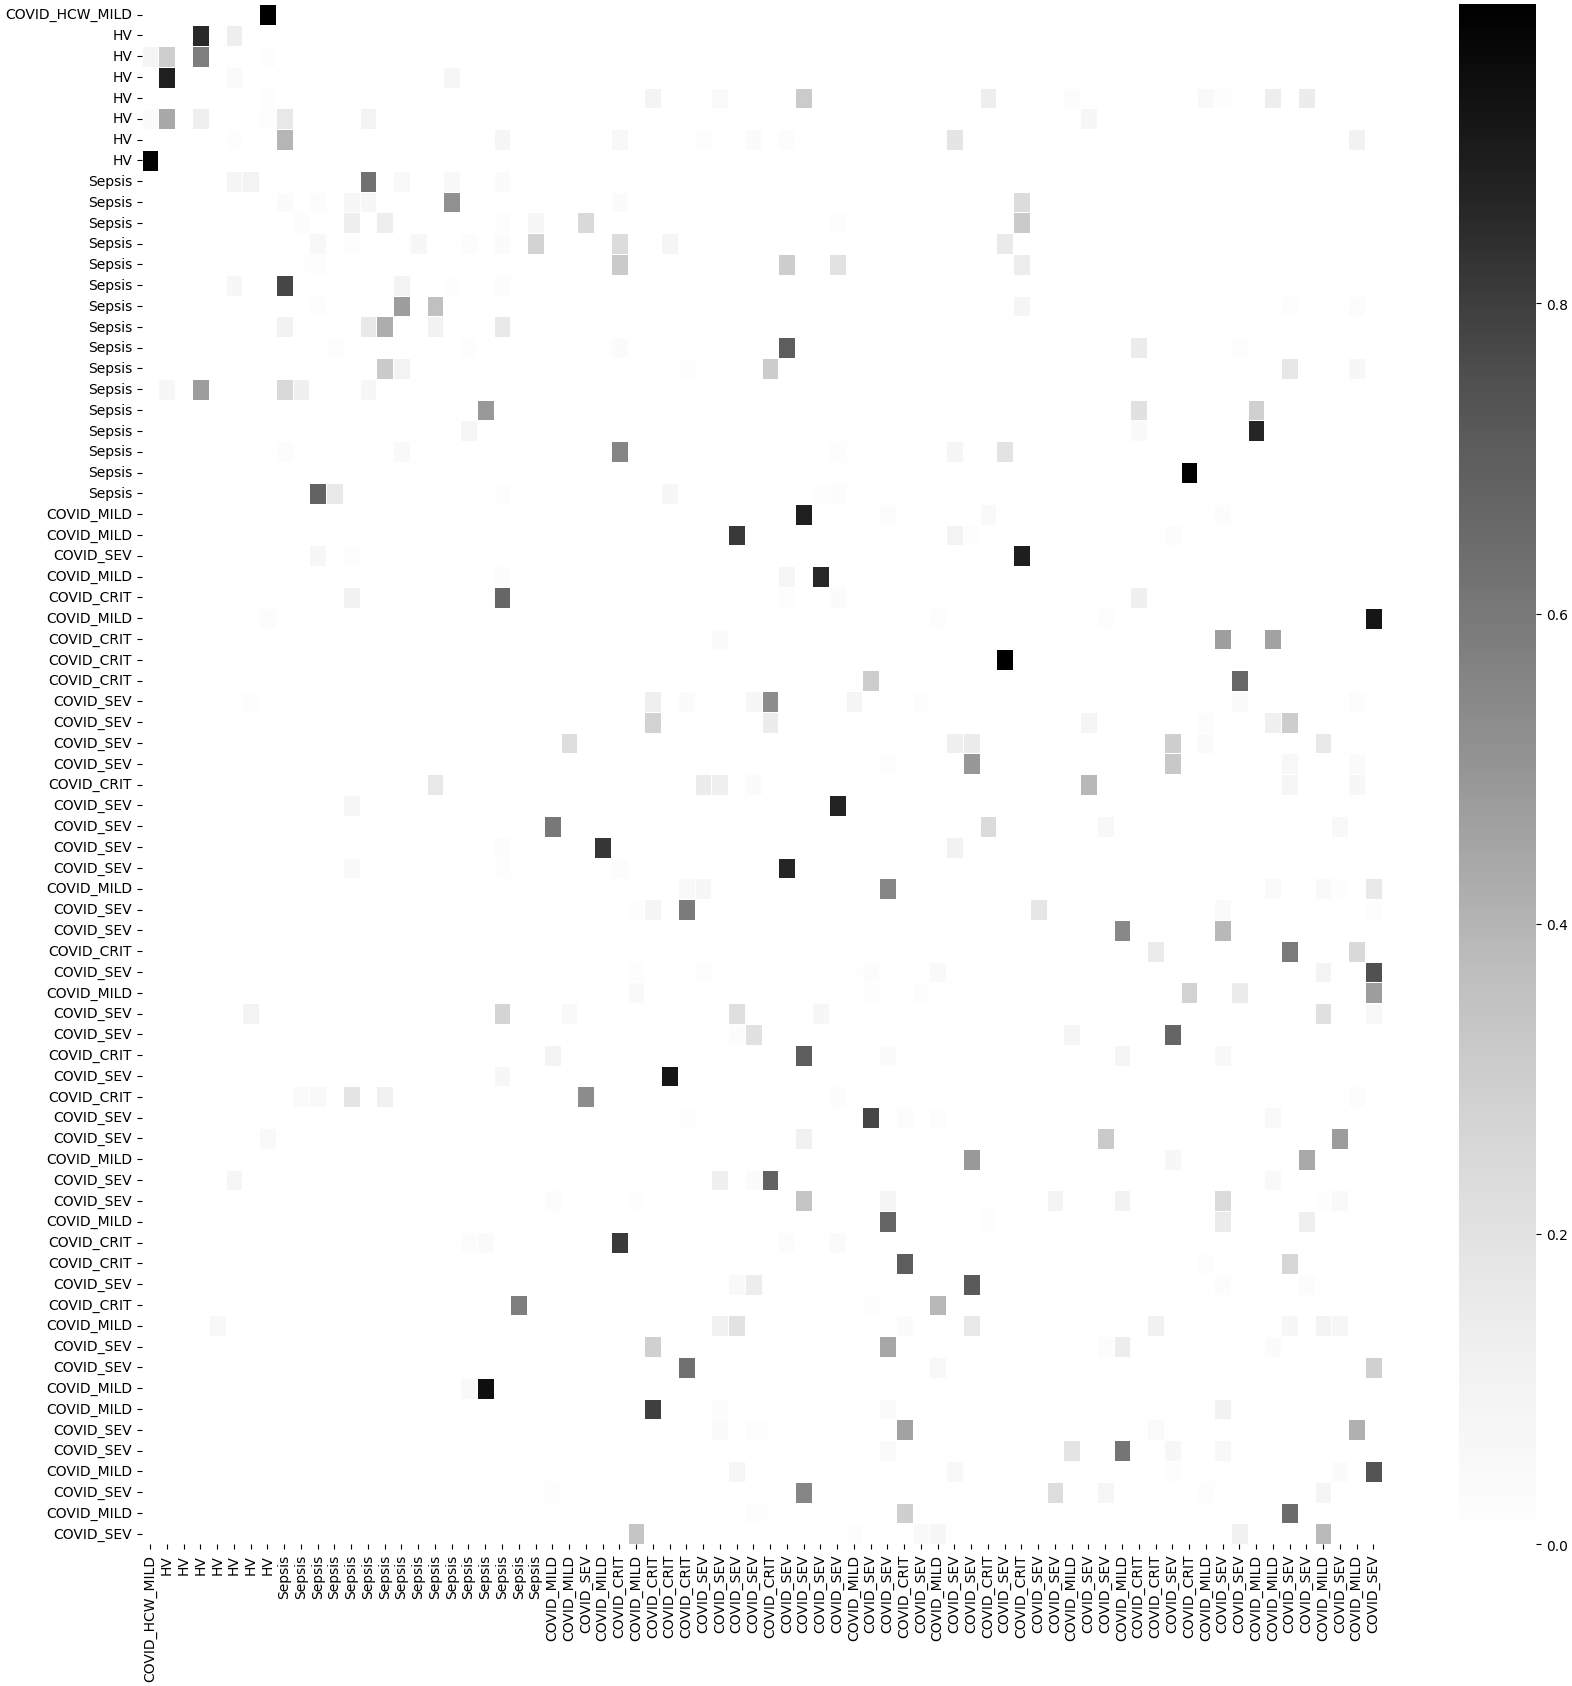

In [932]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pd.DataFrame(make_transition_matrix(facs_wa_knn), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)), linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

### Kernel

<Axes: >

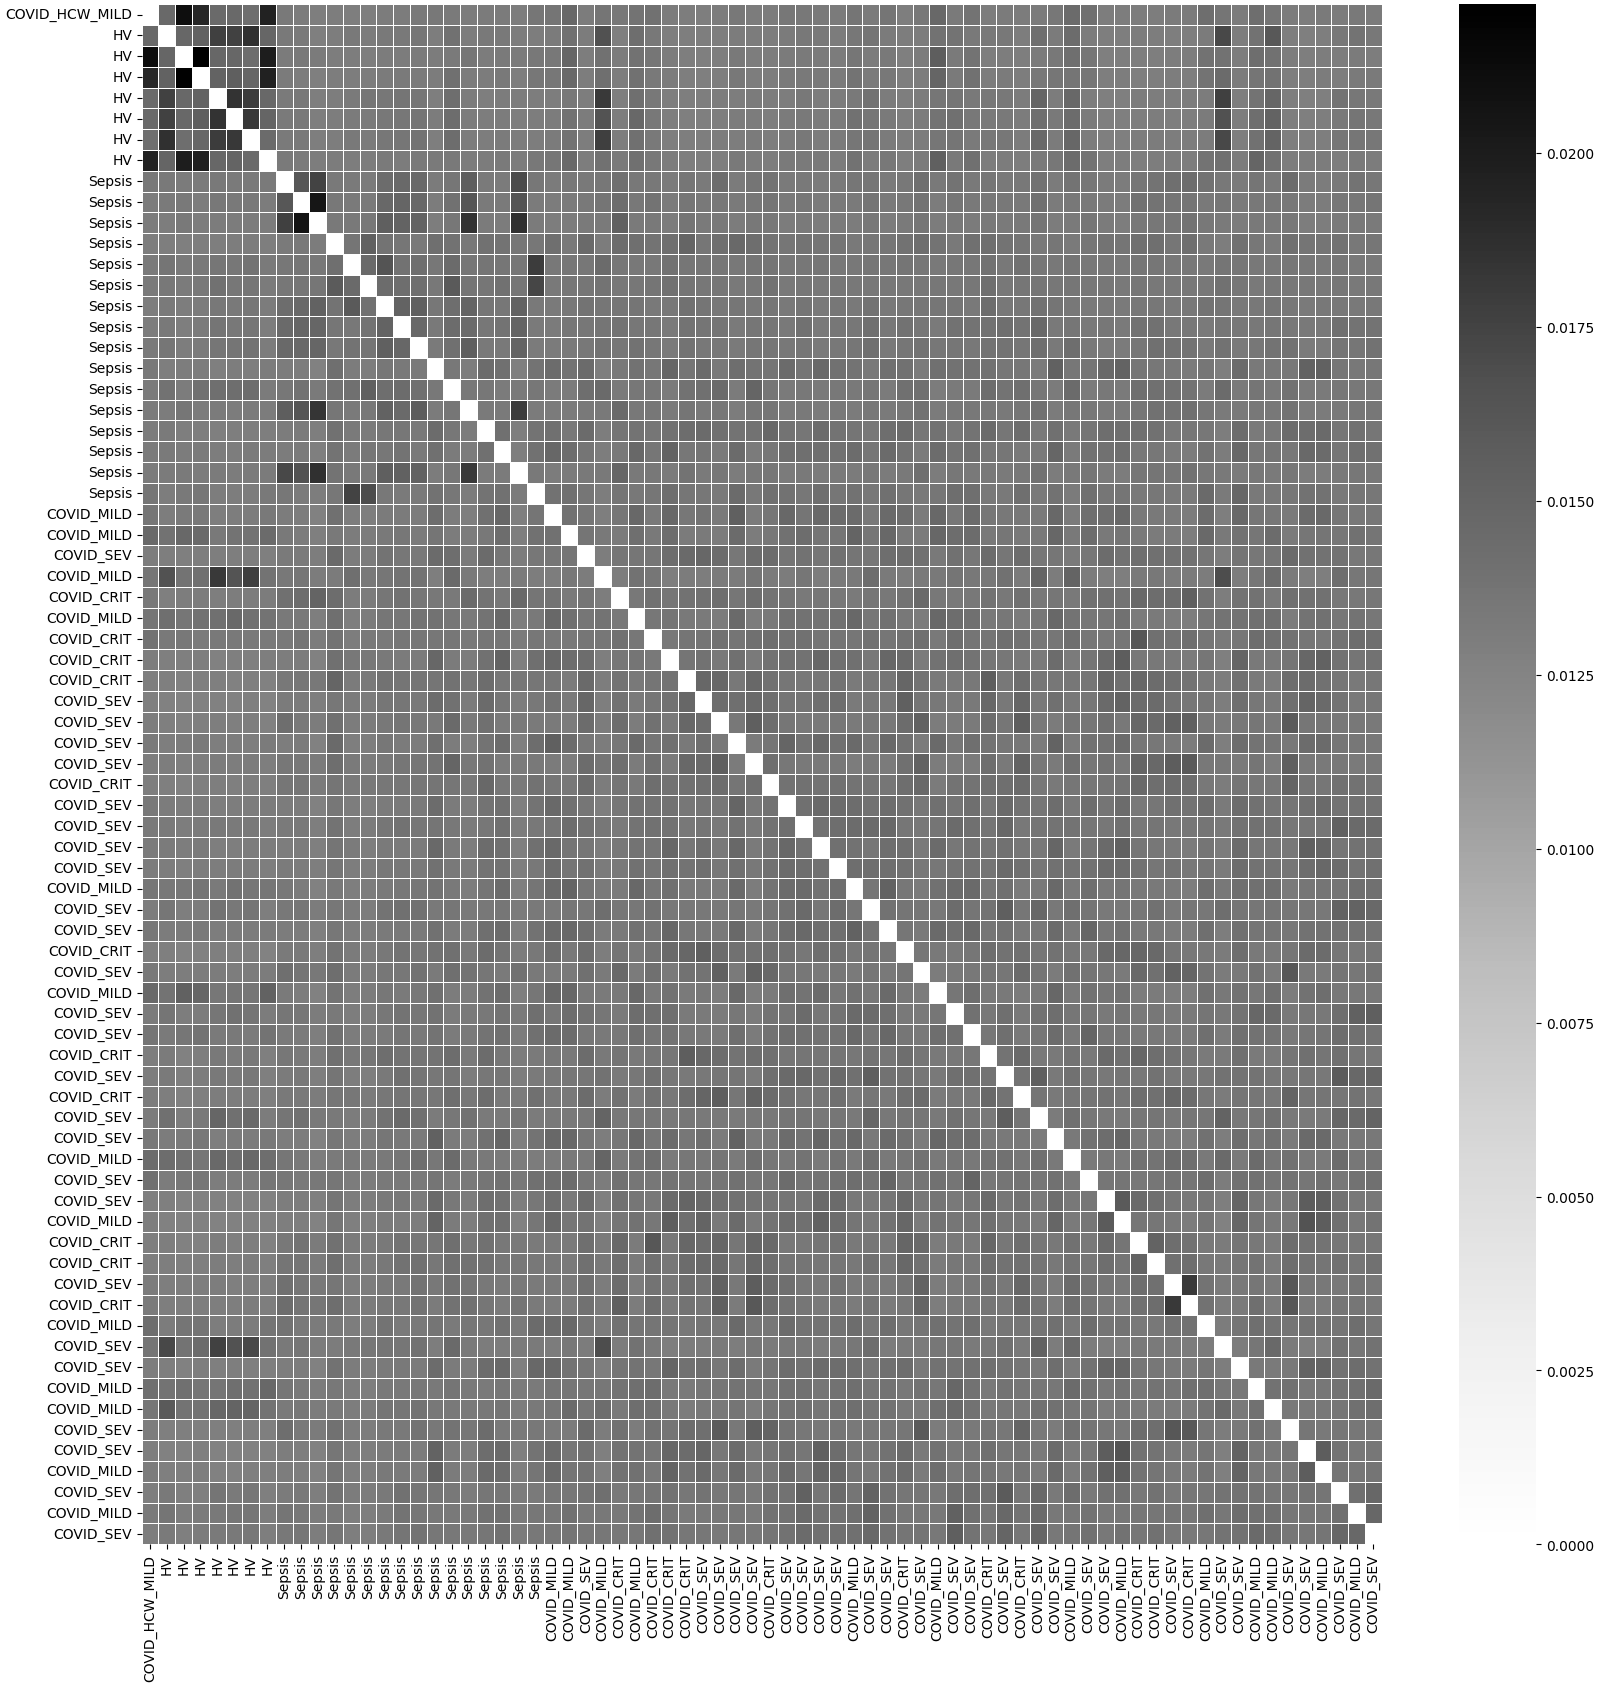

In [933]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pd.DataFrame(make_transition_matrix(bulkRNA_snf_kernel), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)), linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

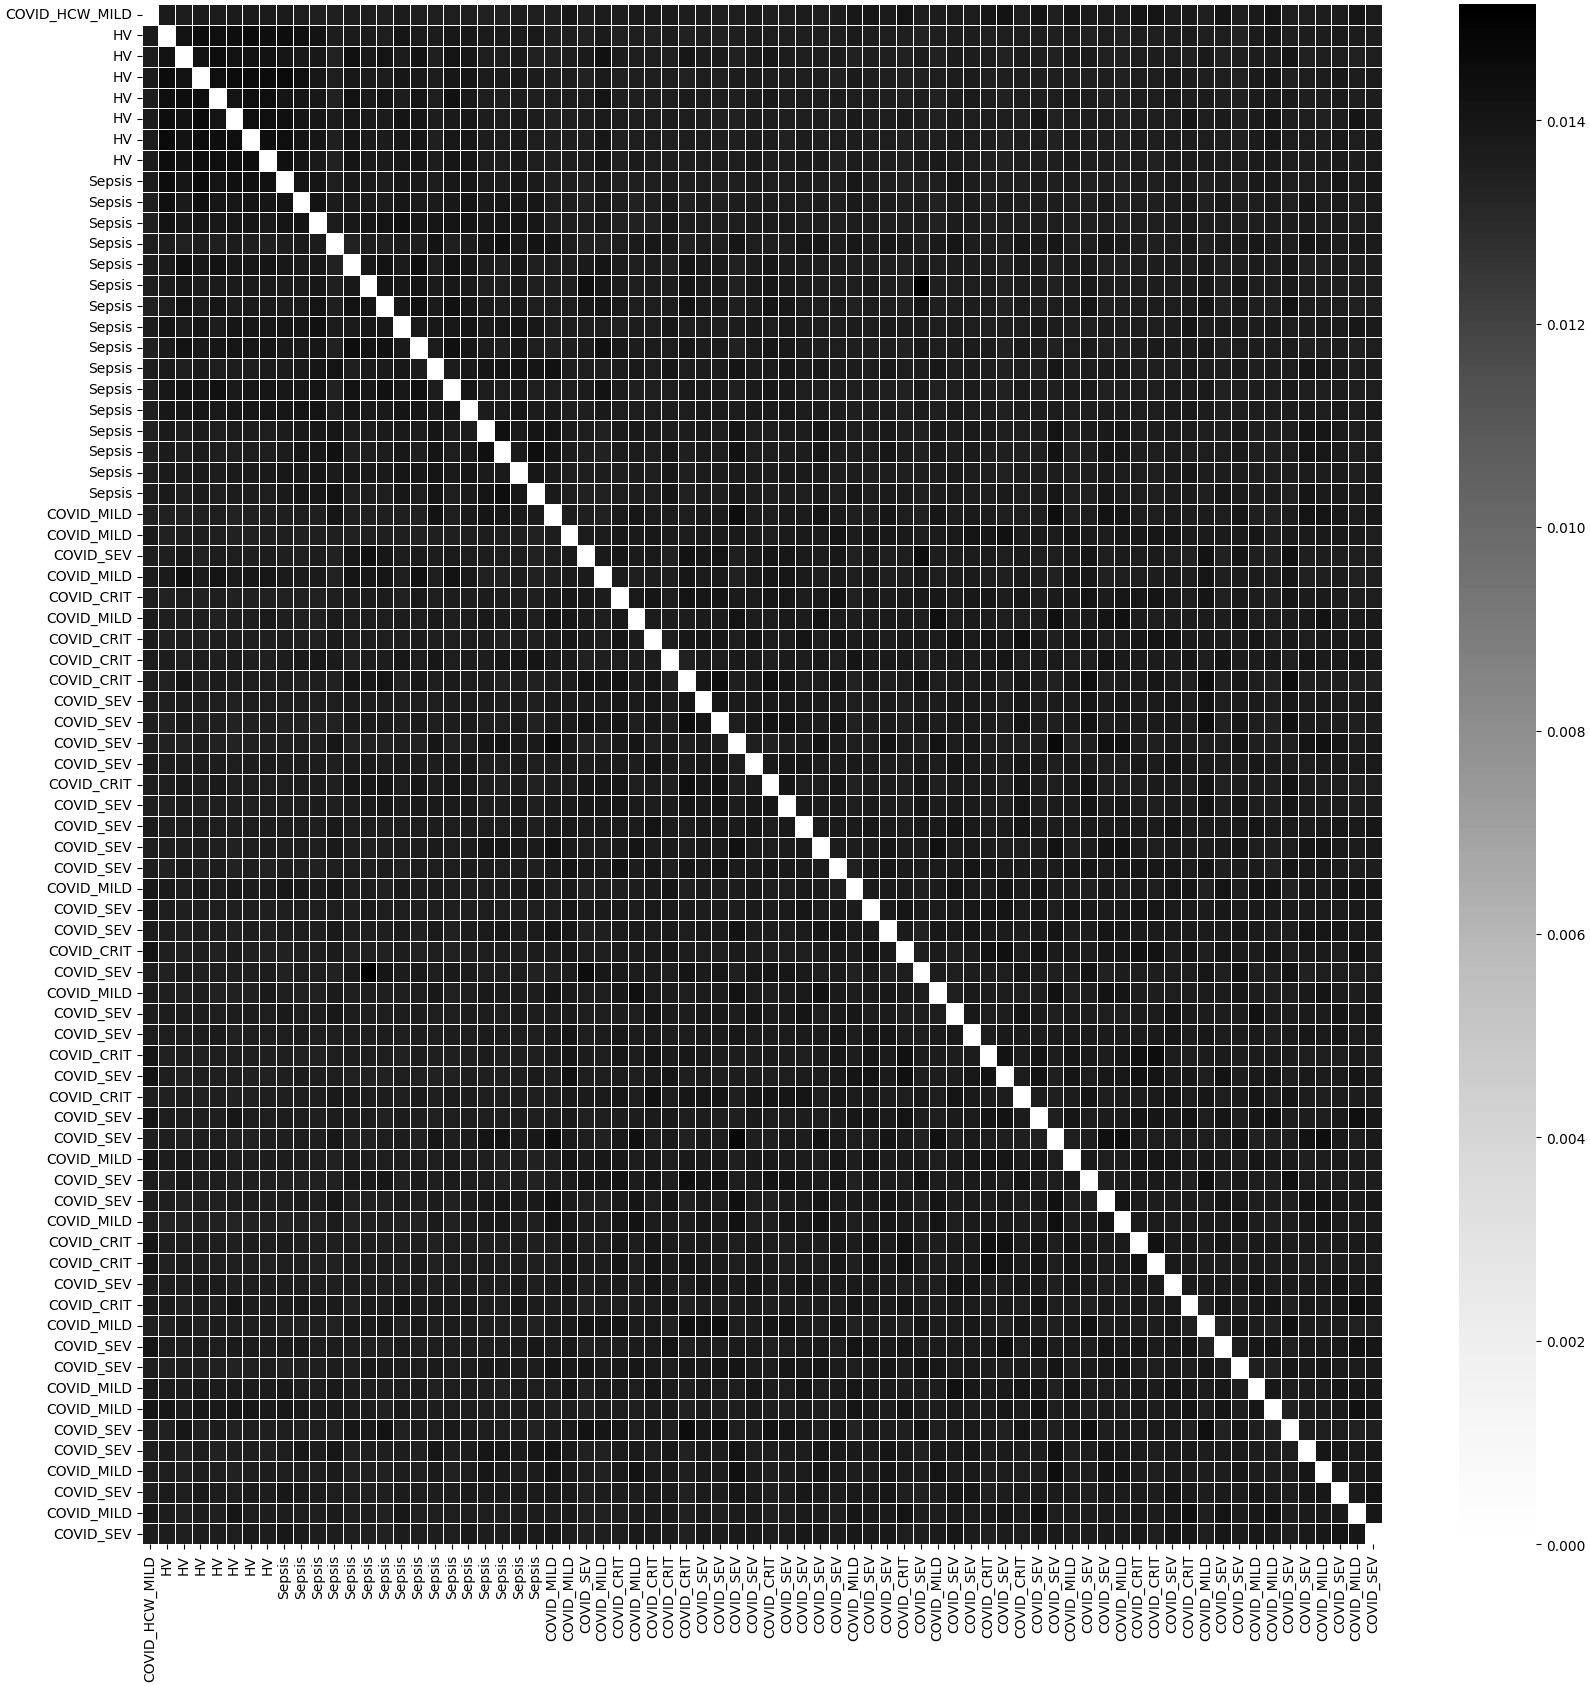

In [934]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pd.DataFrame(make_transition_matrix(citeRNA_snf_kernel), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)), linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

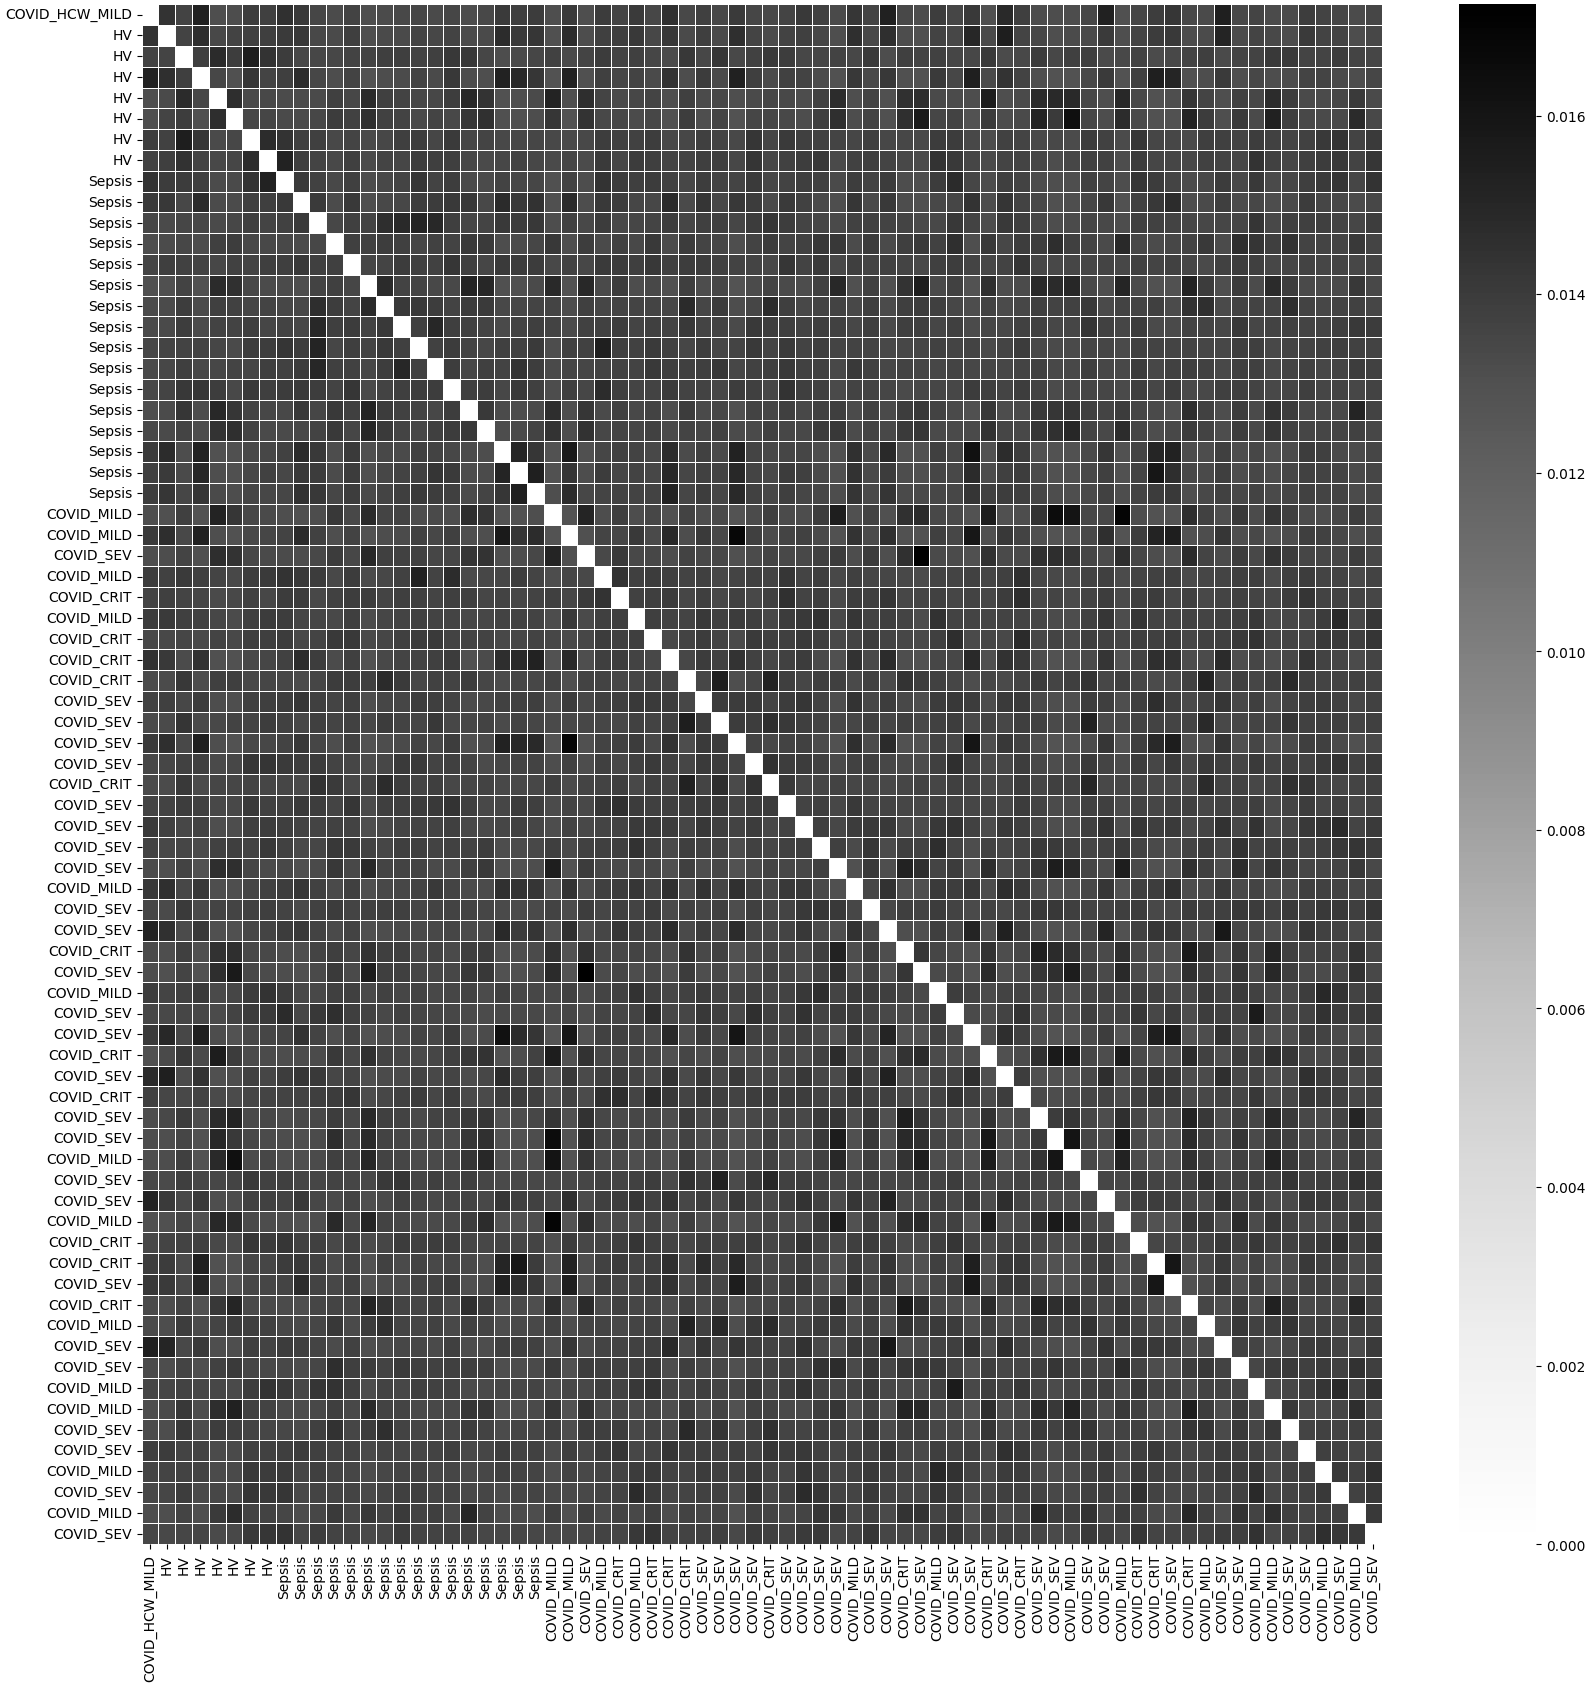

In [935]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pd.DataFrame(make_transition_matrix(adt_snf_kernel), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)), linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

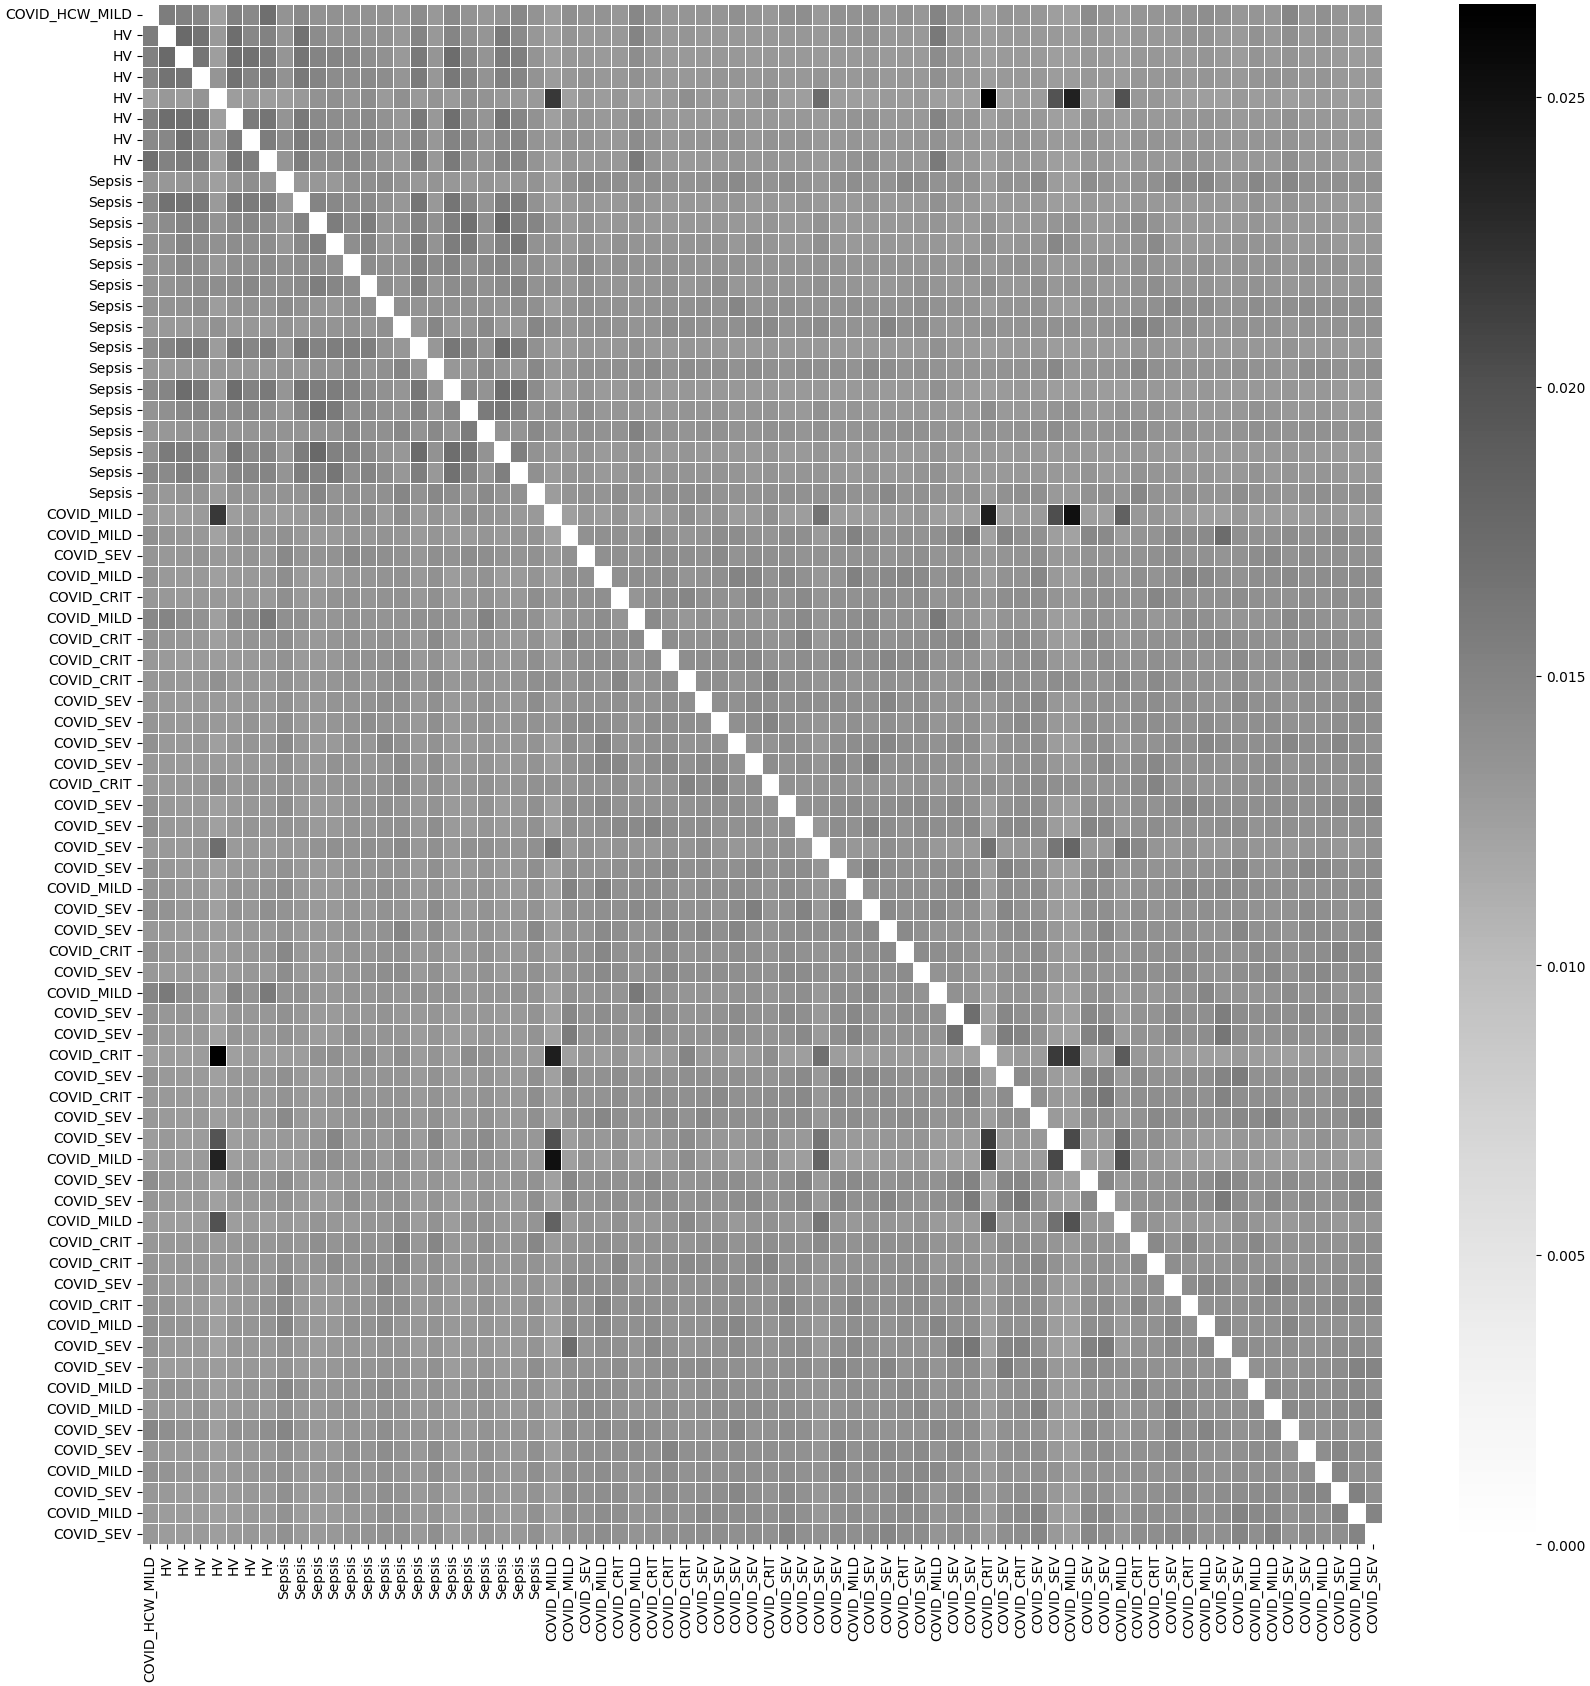

In [936]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pd.DataFrame(make_transition_matrix(cytof_snf_kernel), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)), linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

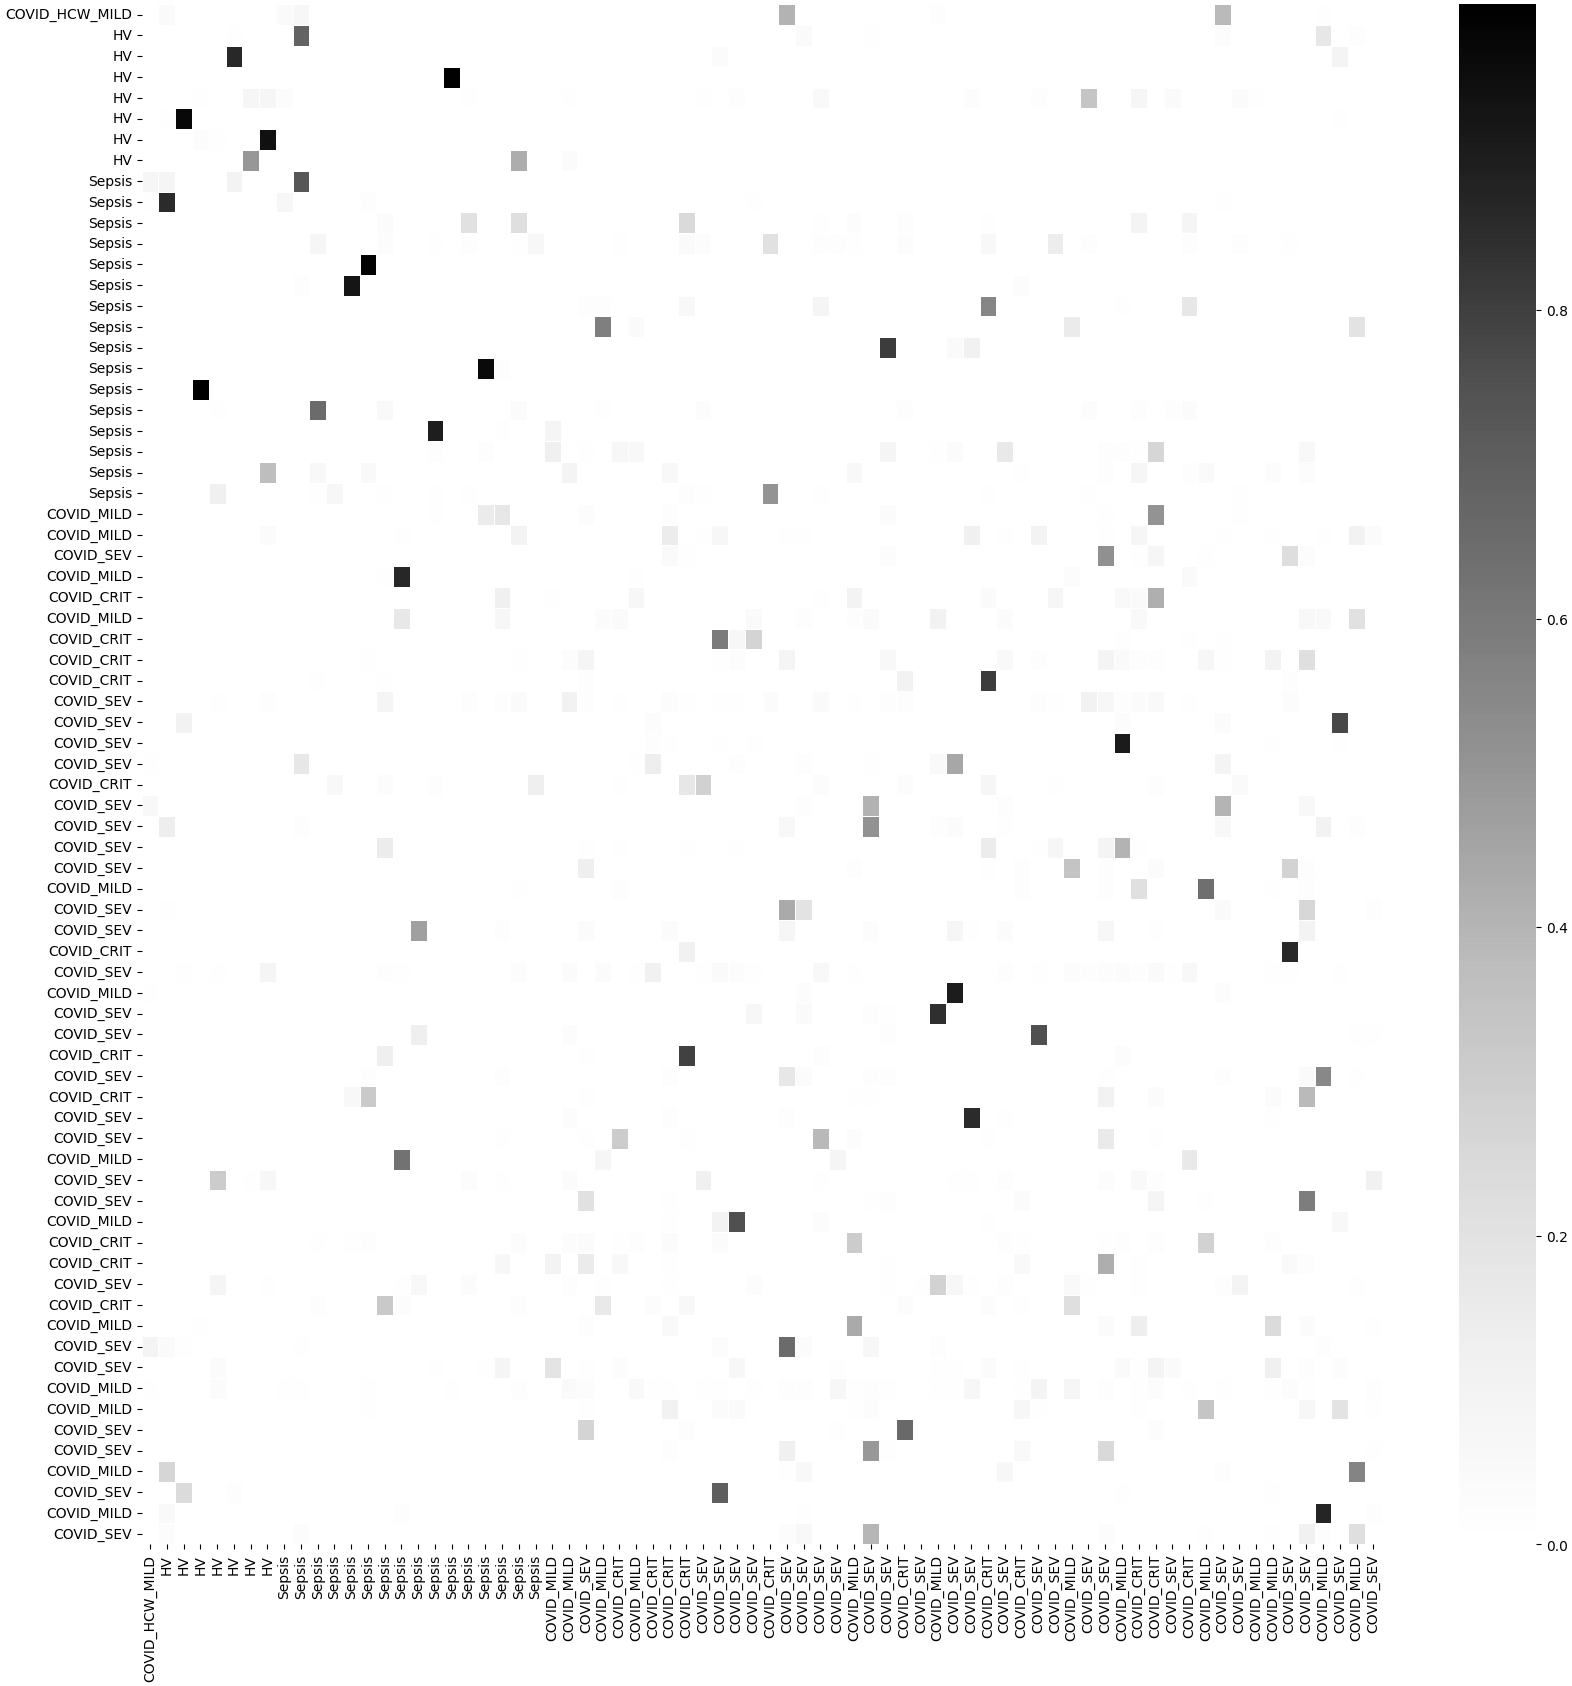

In [937]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pd.DataFrame(make_transition_matrix(luminex_snf_kernel), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)), linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

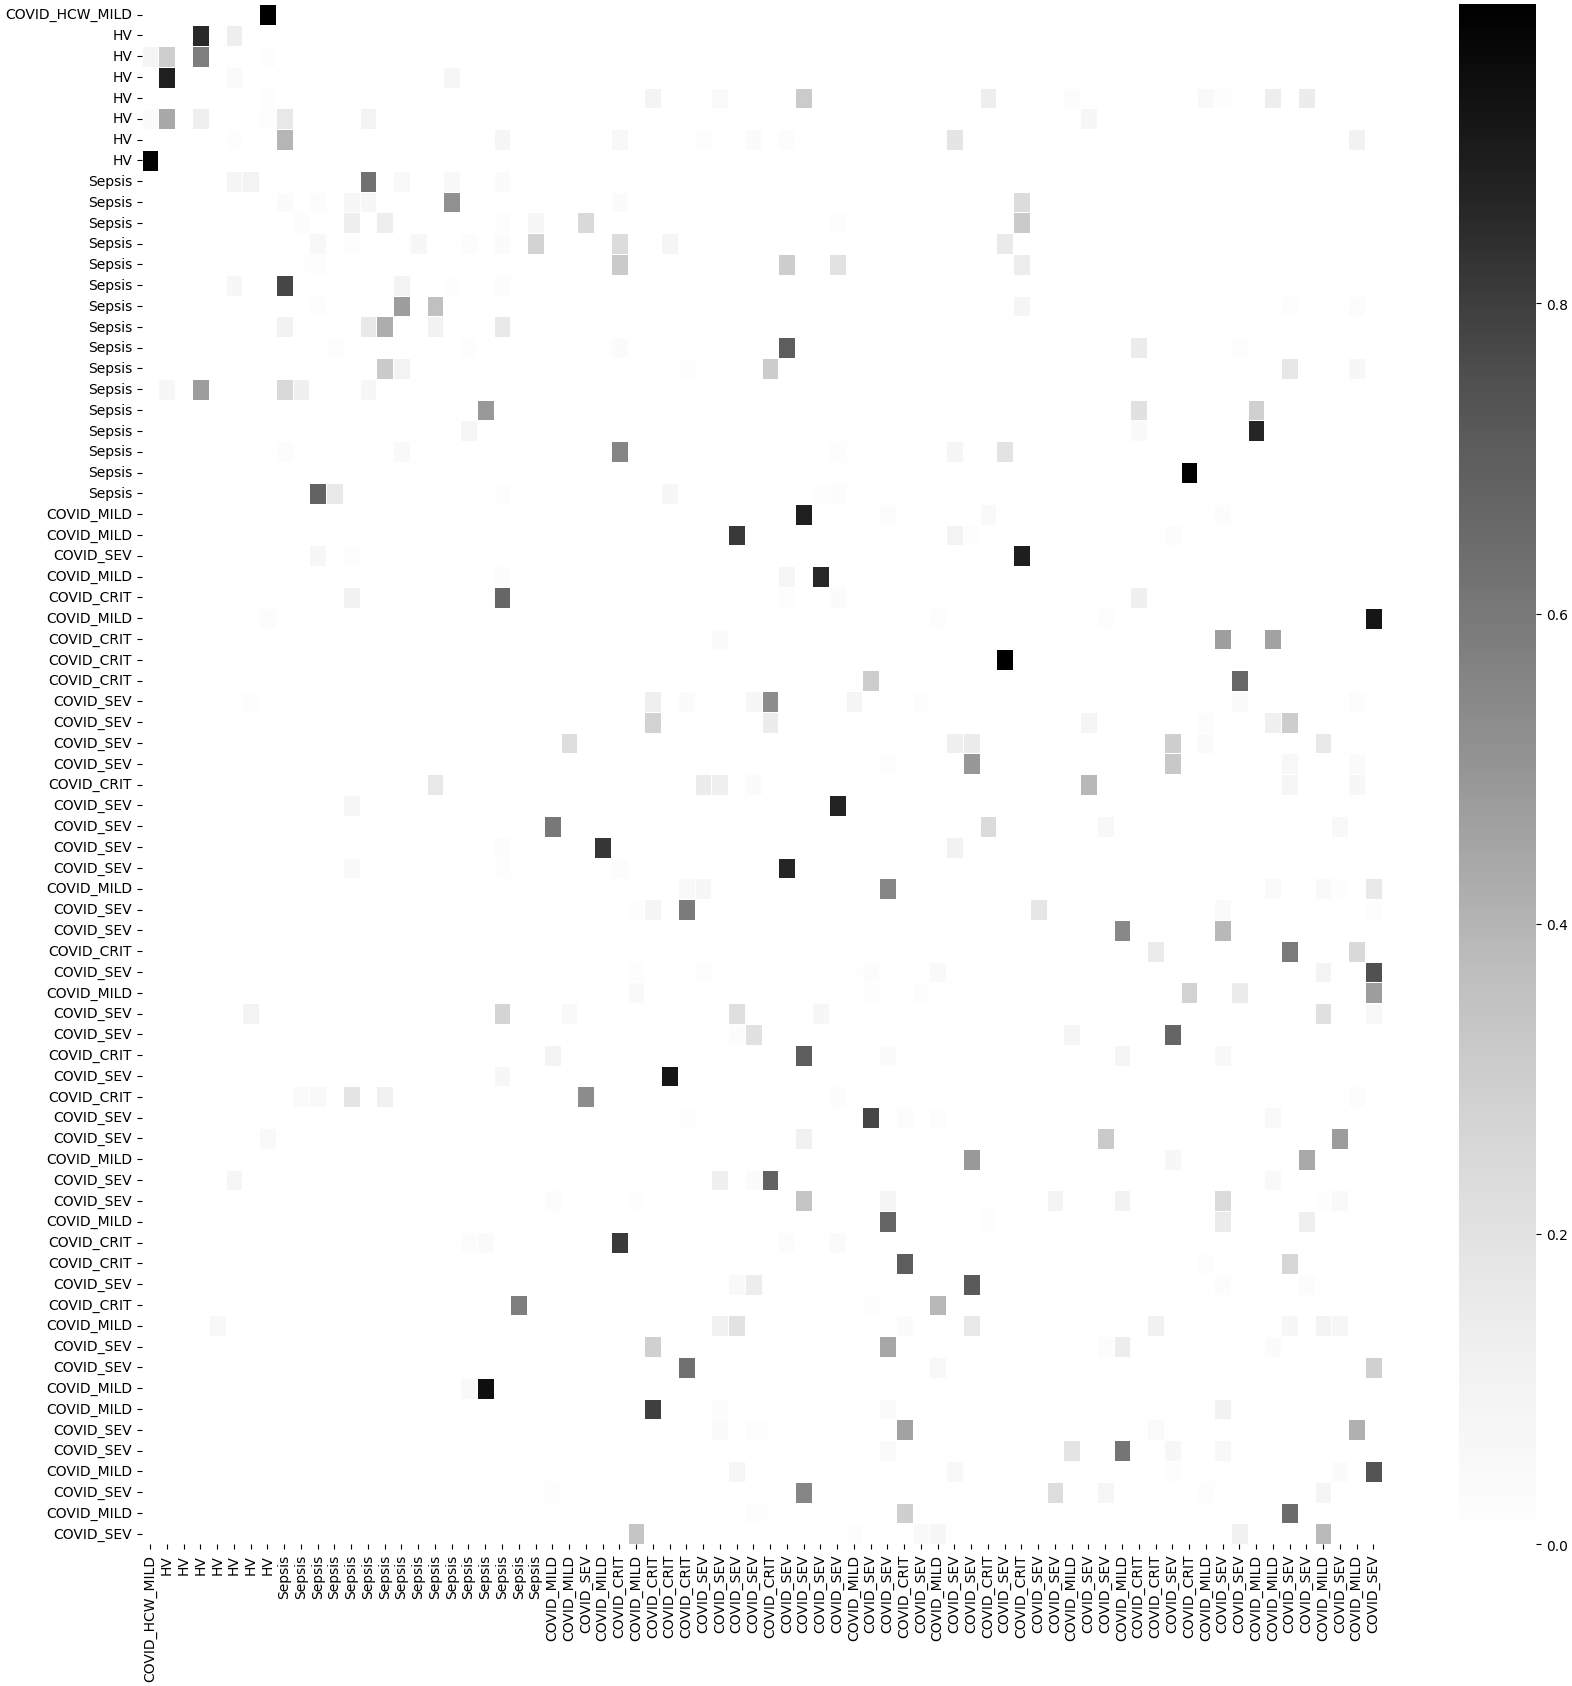

In [938]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pd.DataFrame(make_transition_matrix(facs_snf_kernel), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)), linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

## Average distances

### KNN

<Axes: >

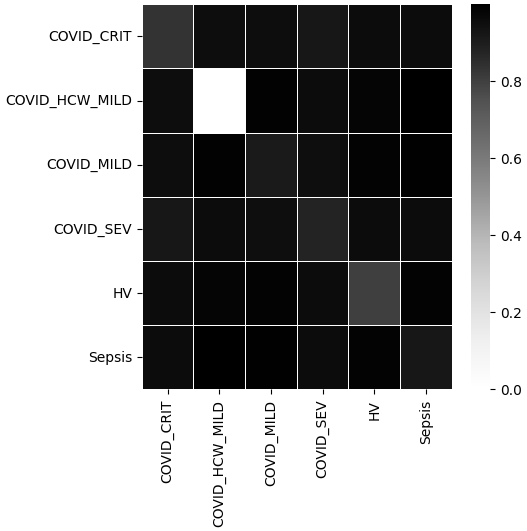

In [939]:
df = pd.DataFrame(sparse.csgraph.shortest_path(citeRNA_wa_knn_dist, directed=False, unweighted=False), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)).stack().groupby(level=[0,1]).mean().unstack()
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(df, linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

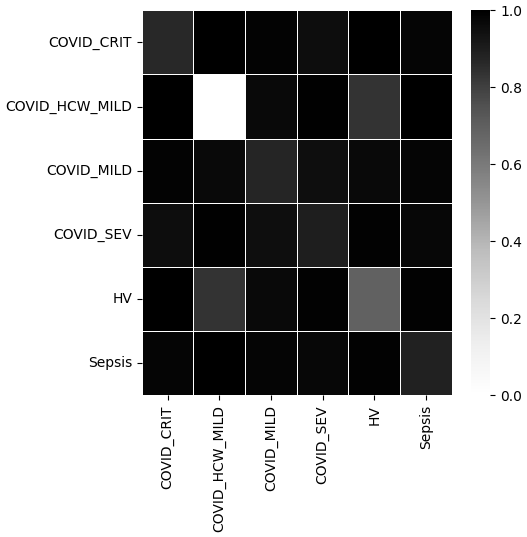

In [131]:
df = pd.DataFrame(sparse.csgraph.shortest_path(bulkRNA_wa_knn_dist, directed=False, unweighted=False), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)).stack().groupby(level=[0,1]).mean().unstack()
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(df, linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

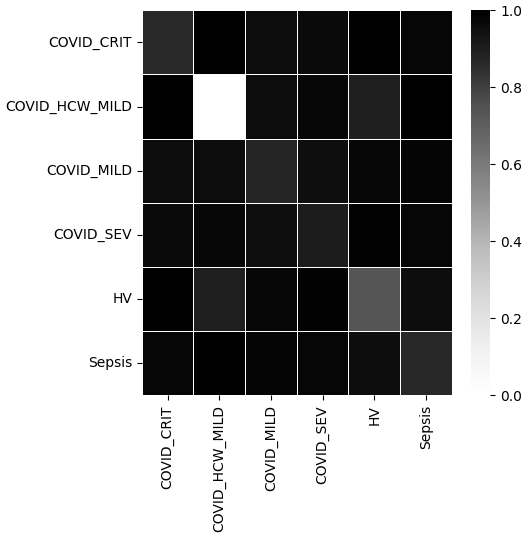

In [132]:
df = pd.DataFrame(sparse.csgraph.shortest_path(cytof_wa_knn_dist, directed=False, unweighted=False), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)).stack().groupby(level=[0,1]).mean().unstack()
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(df, linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

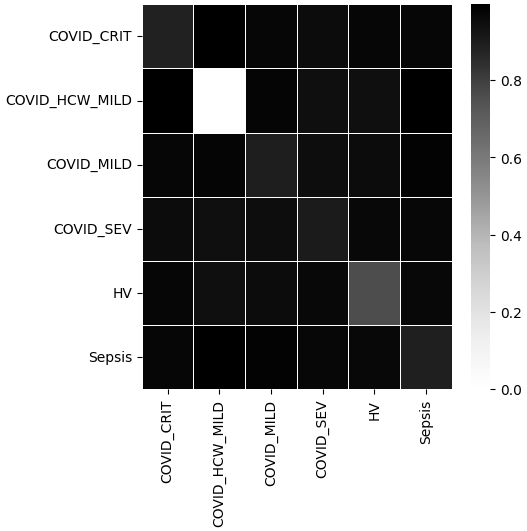

In [133]:
df = pd.DataFrame(sparse.csgraph.shortest_path(adt_wa_knn_dist, directed=False, unweighted=False), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)).stack().groupby(level=[0,1]).mean().unstack()
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(df, linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

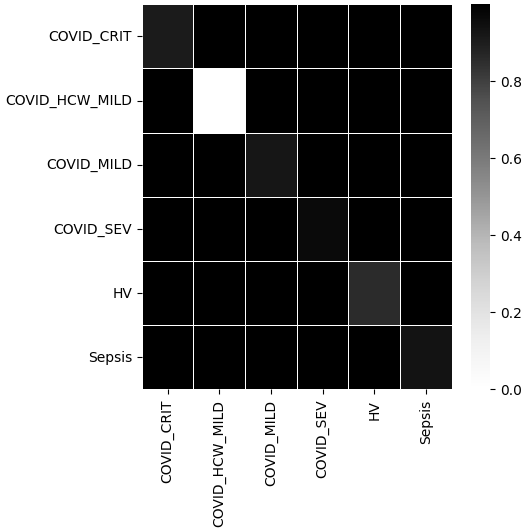

In [134]:
df = pd.DataFrame(sparse.csgraph.shortest_path(luminex_wa_knn_dist, directed=False, unweighted=False), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)).stack().groupby(level=[0,1]).mean().unstack()
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(df, linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

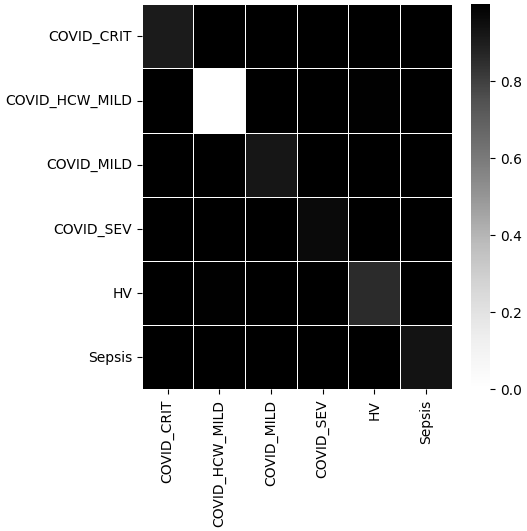

In [135]:
df = pd.DataFrame(sparse.csgraph.shortest_path(facs_wa_knn_dist, directed=False, unweighted=False), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)).stack().groupby(level=[0,1]).mean().unstack()
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(df, linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

### Kernel

<Axes: >

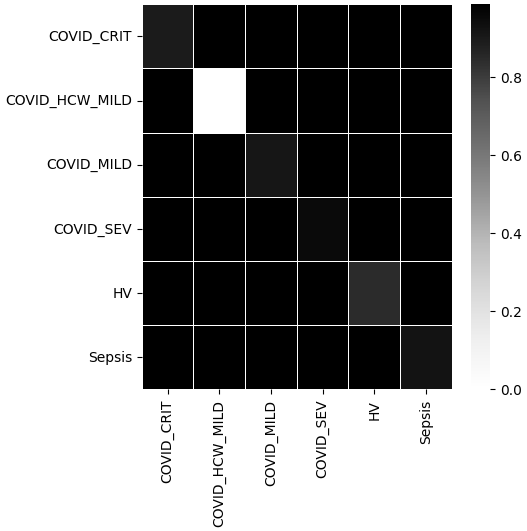

In [727]:
df = pd.DataFrame(sparse.csgraph.shortest_path(citeRNA_snf_kernel_dist, directed=False, unweighted=False), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)).stack().groupby(level=[0,1]).mean().unstack()
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(df, linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

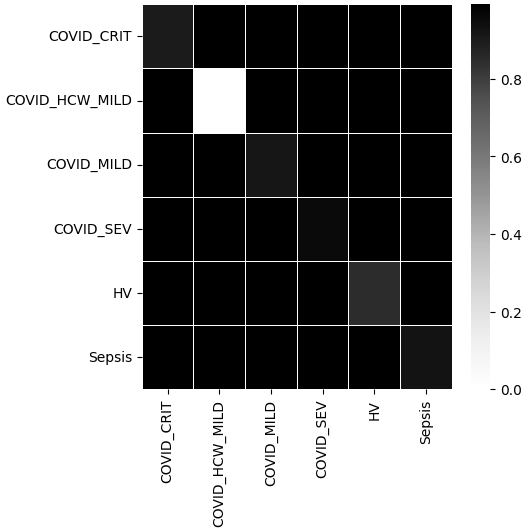

In [170]:
df = pd.DataFrame(sparse.csgraph.shortest_path(bulkRNA_snf_kernel_dist, directed=False, unweighted=False), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)).stack().groupby(level=[0,1]).mean().unstack()
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(df, linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

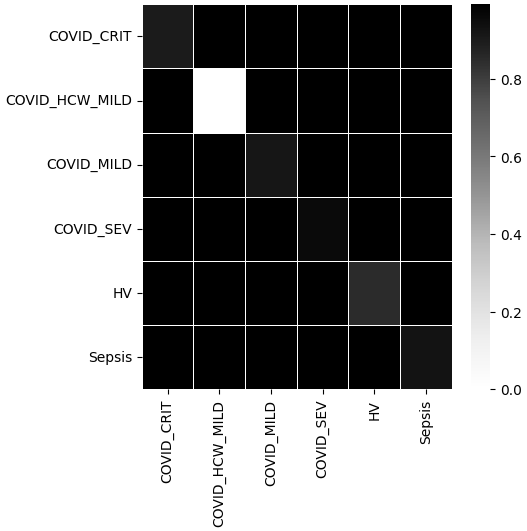

In [171]:
df = pd.DataFrame(sparse.csgraph.shortest_path(cytof_snf_kernel_dist, directed=False, unweighted=False), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)).stack().groupby(level=[0,1]).mean().unstack()
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(df, linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

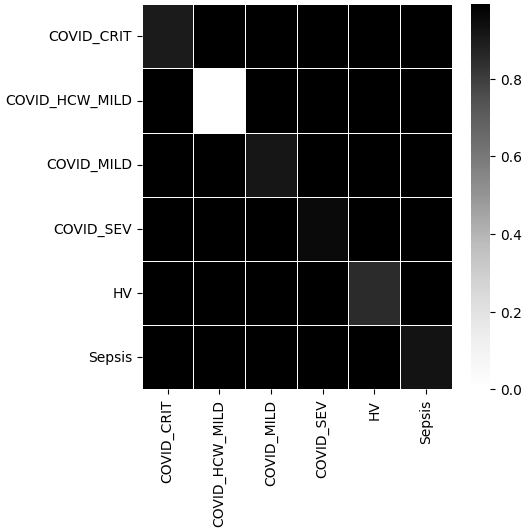

In [172]:
df = pd.DataFrame(sparse.csgraph.shortest_path(adt_snf_kernel_dist, directed=False, unweighted=False), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)).stack().groupby(level=[0,1]).mean().unstack()
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(df, linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

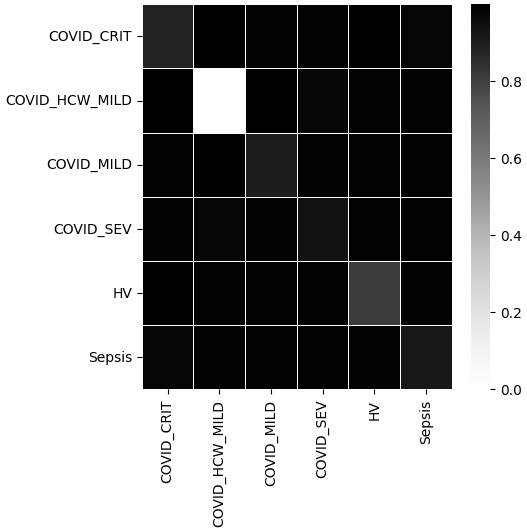

In [173]:
df = pd.DataFrame(sparse.csgraph.shortest_path(luminex_snf_kernel_dist, directed=False, unweighted=False), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)).stack().groupby(level=[0,1]).mean().unstack()
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(df, linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

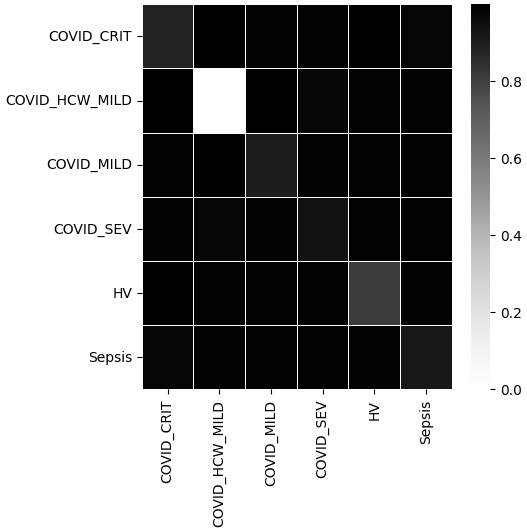

In [174]:
pd.DataFrame(sparse.csgraph.shortest_path(facs_snf_kernel_dist, directed=False, unweighted=False), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)).stack().groupby(level=[0,1]).mean().unstack()
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(df, linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

# Fused Graph

## Edge weights between diseases

<Axes: >

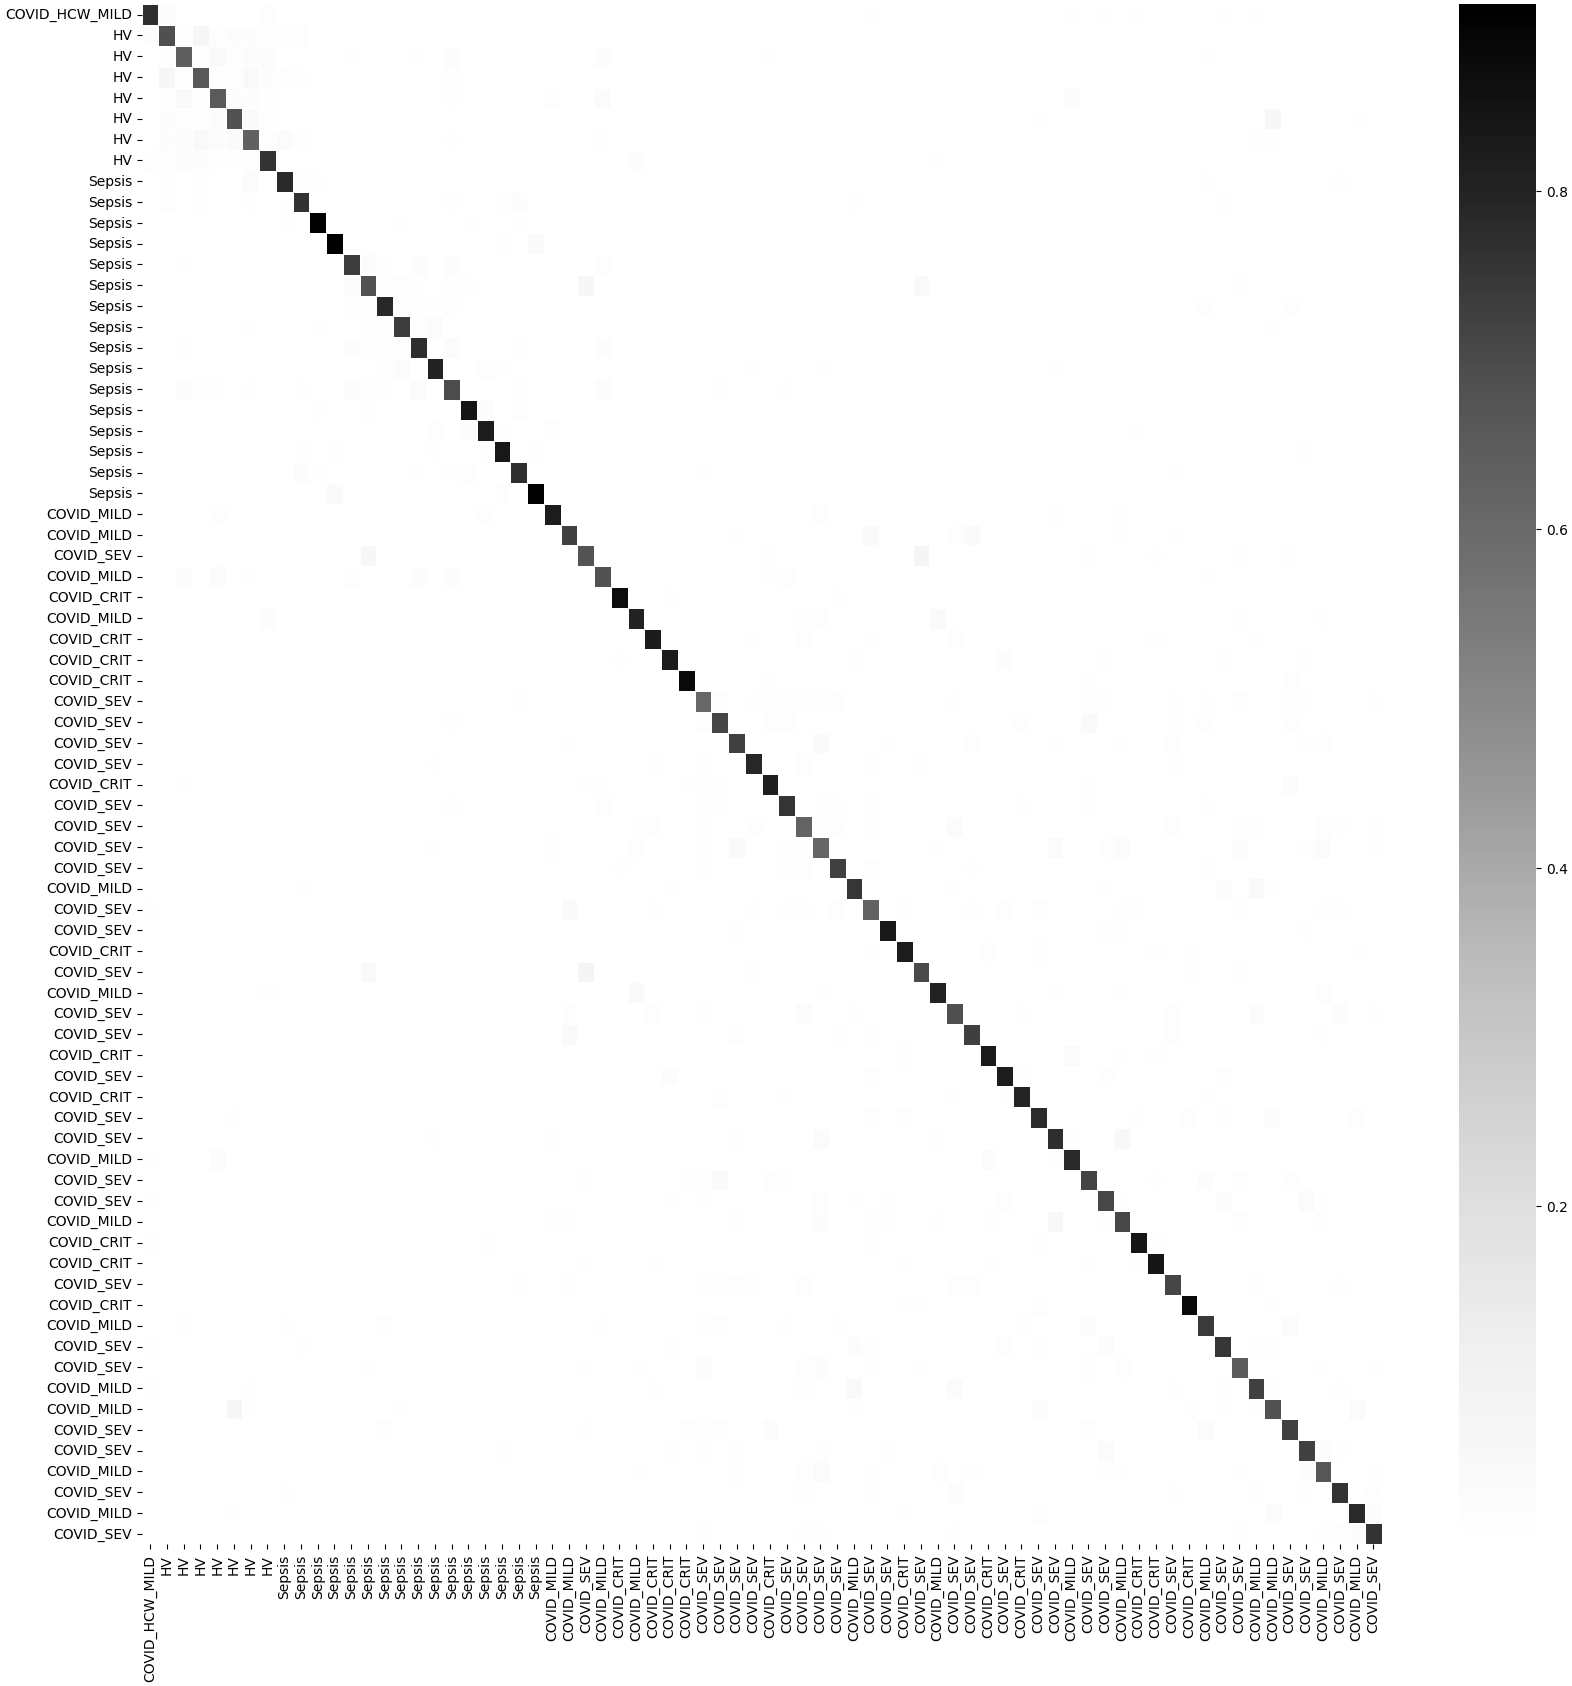

In [974]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pd.DataFrame(make_transition_matrix(all_snf_kernel), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)), linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

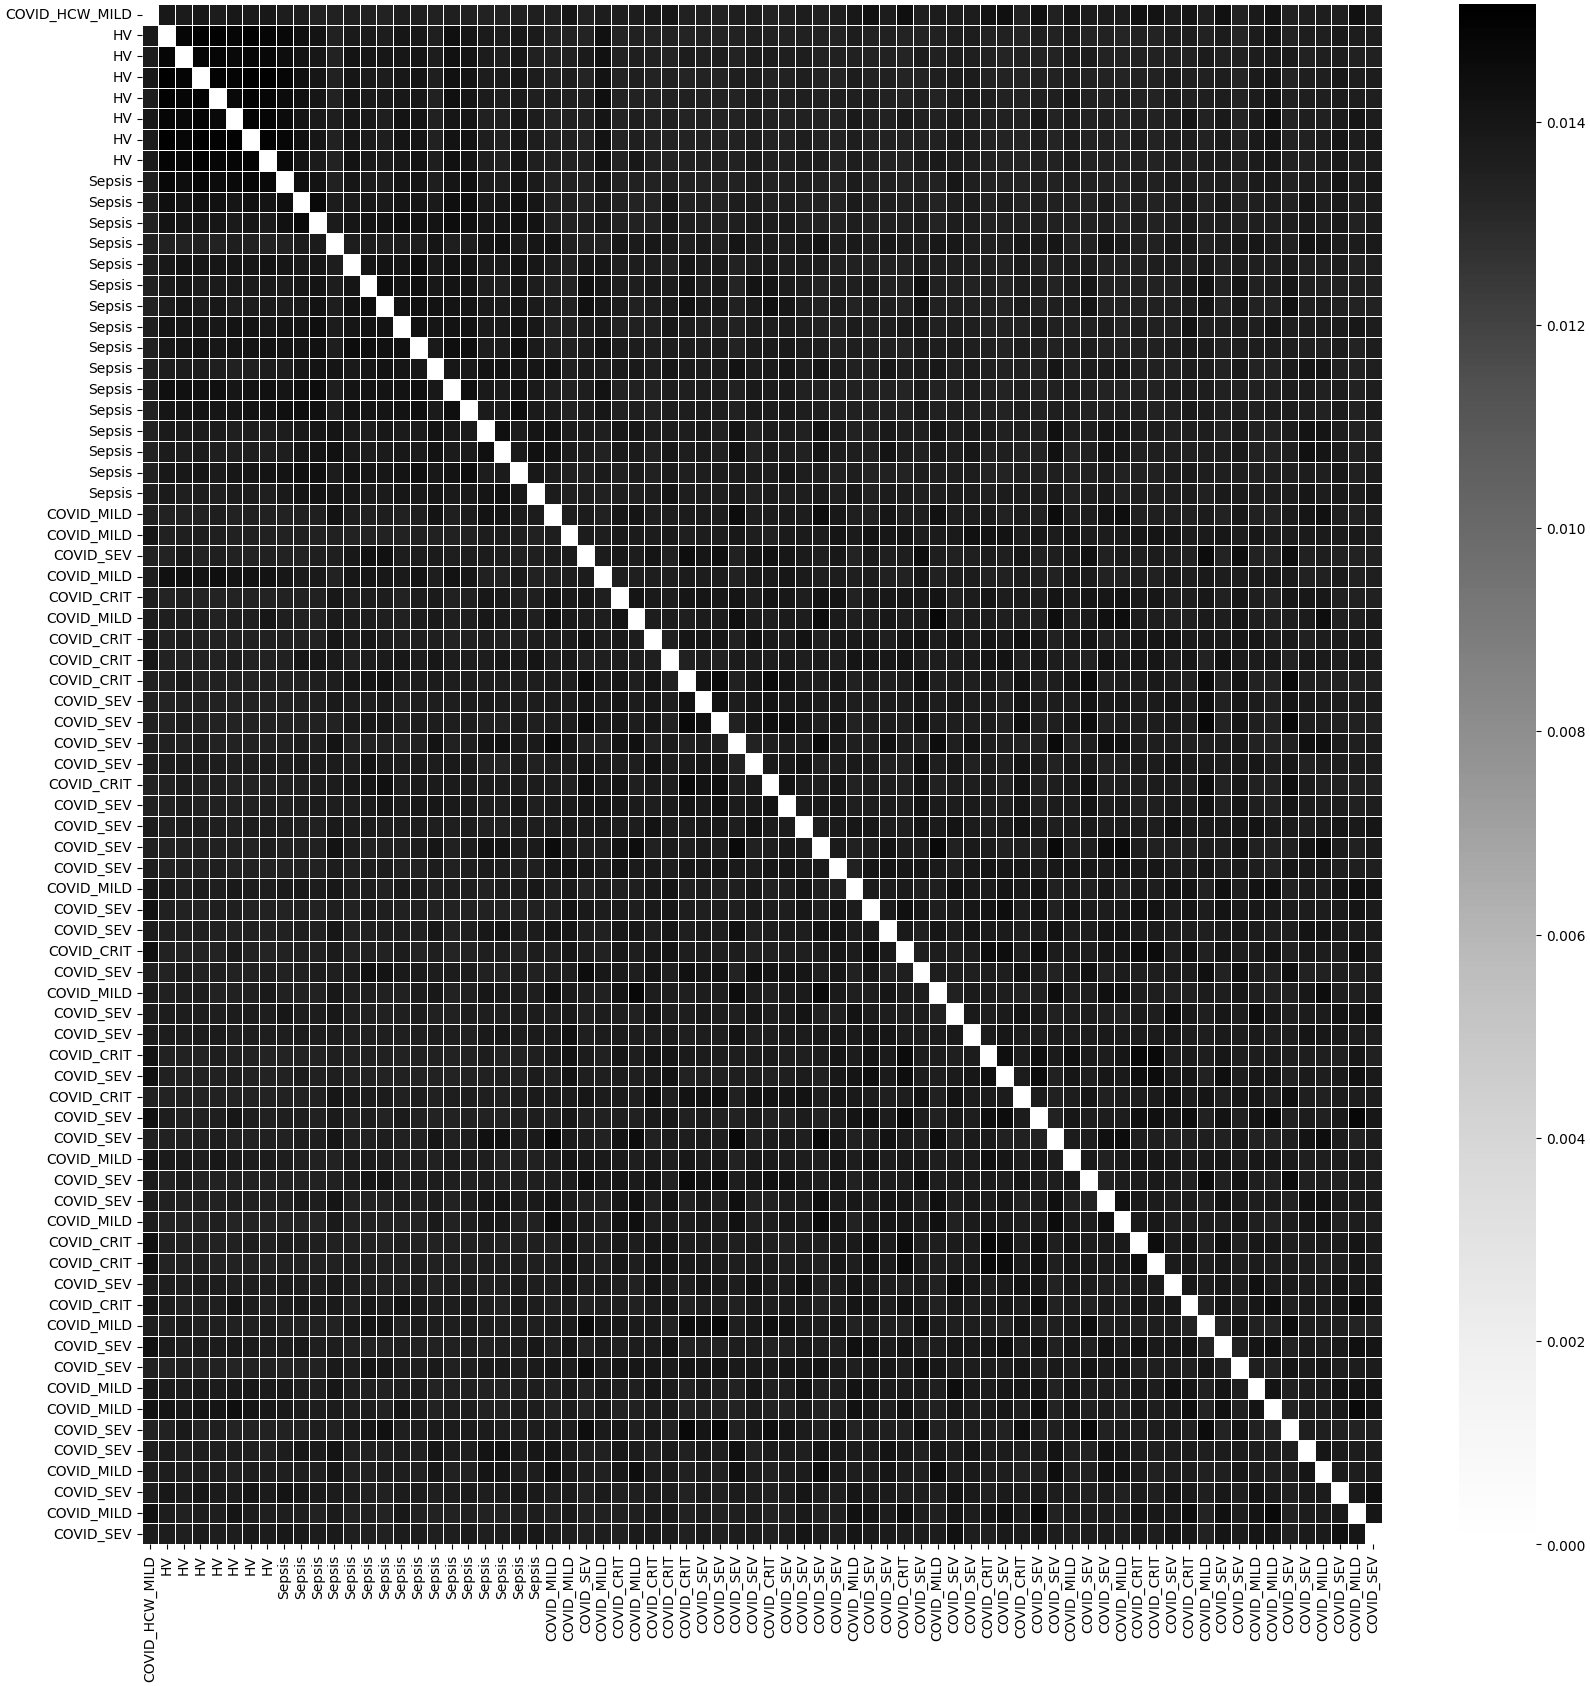

In [729]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pd.DataFrame(make_transition_matrix(all_snf_corr), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)), linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

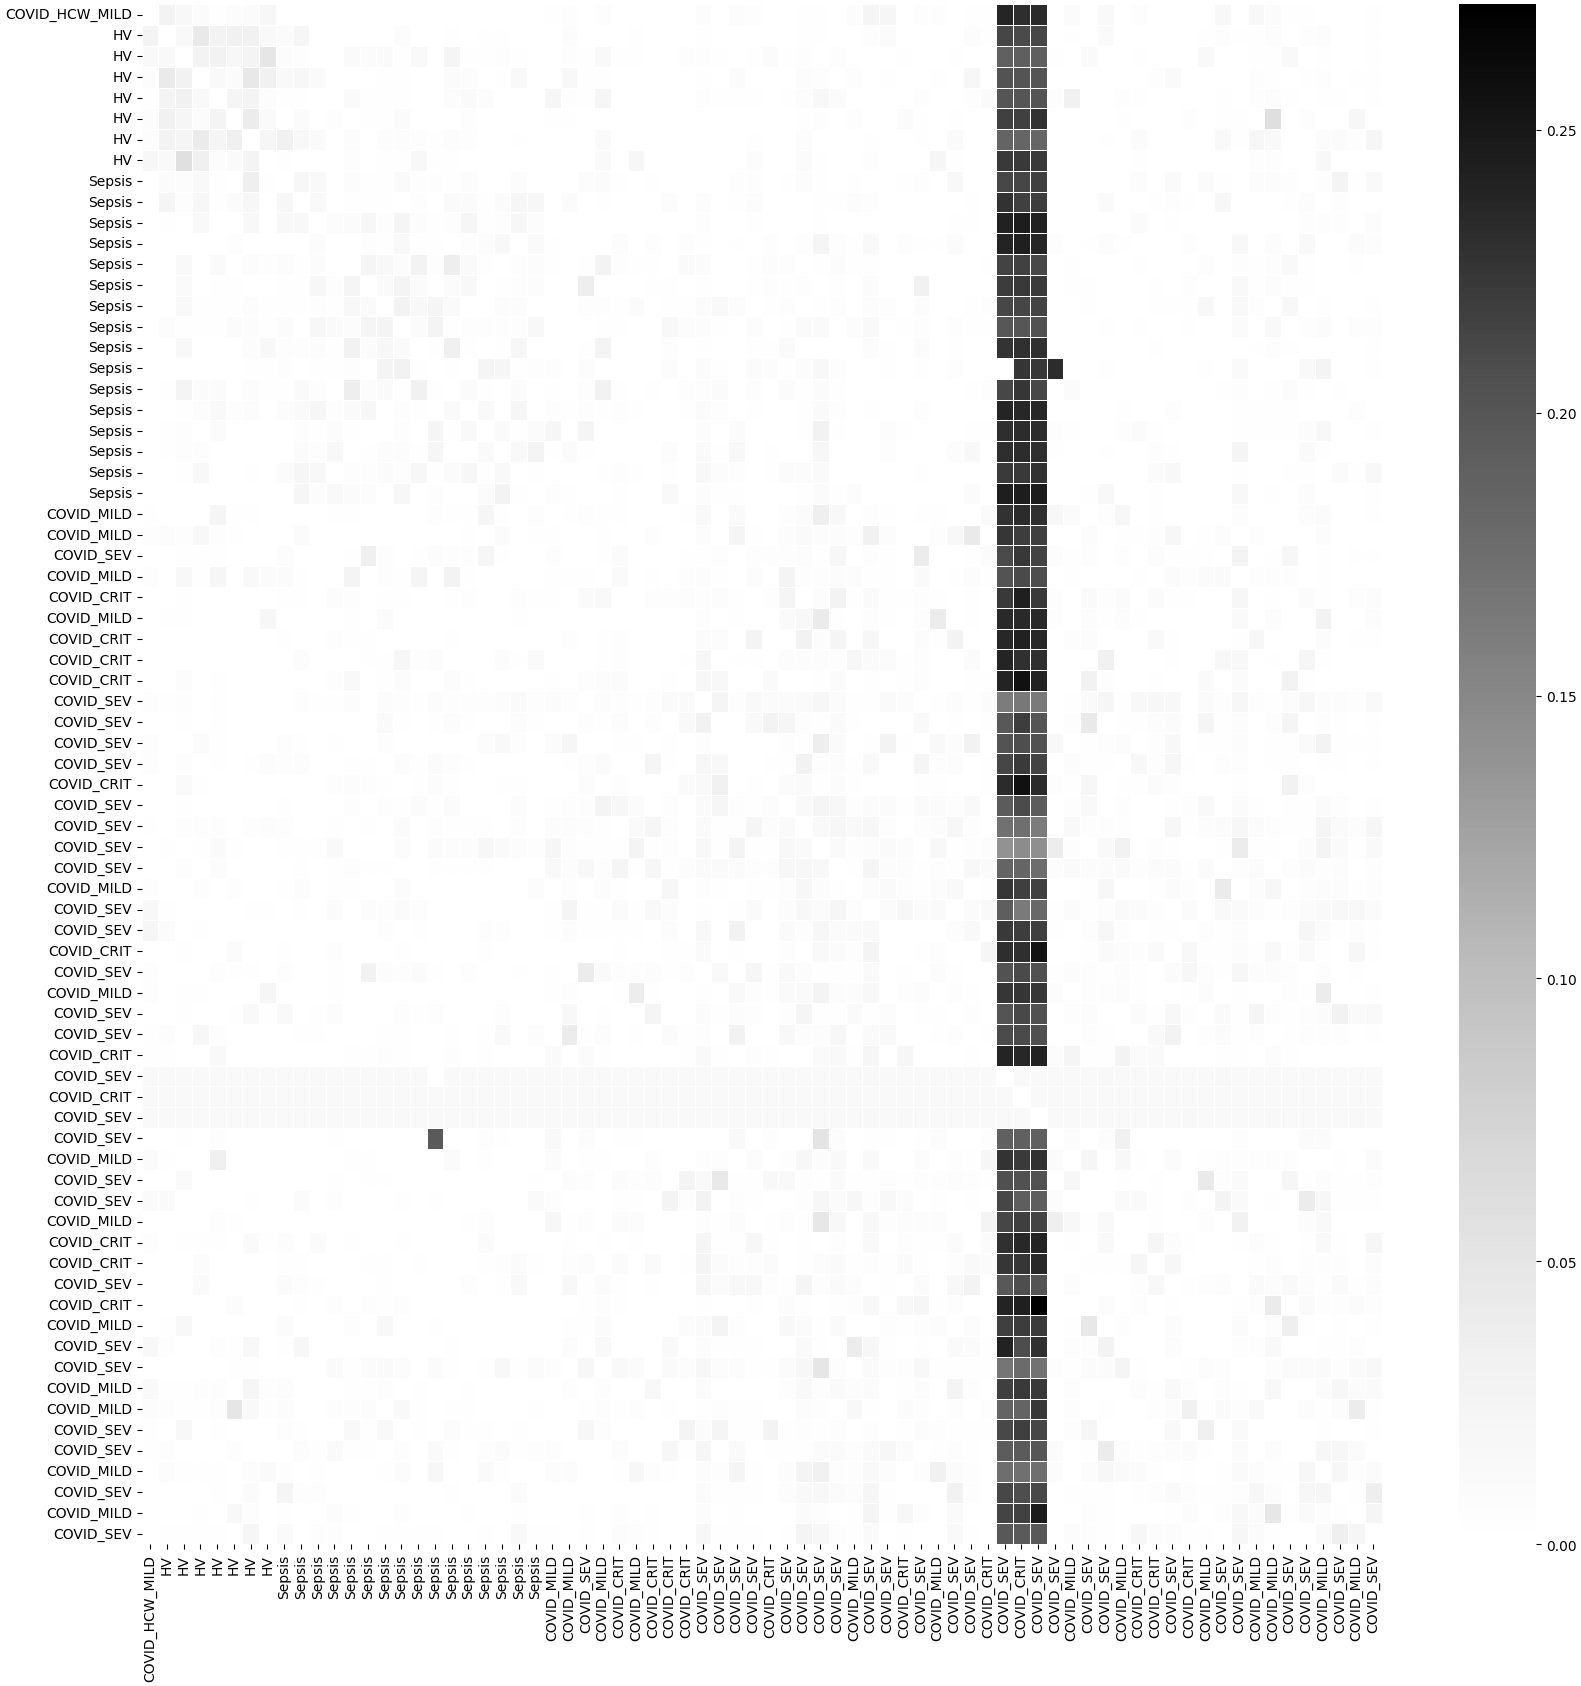

In [730]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pd.DataFrame(make_transition_matrix(all_wa_knn), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)), linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

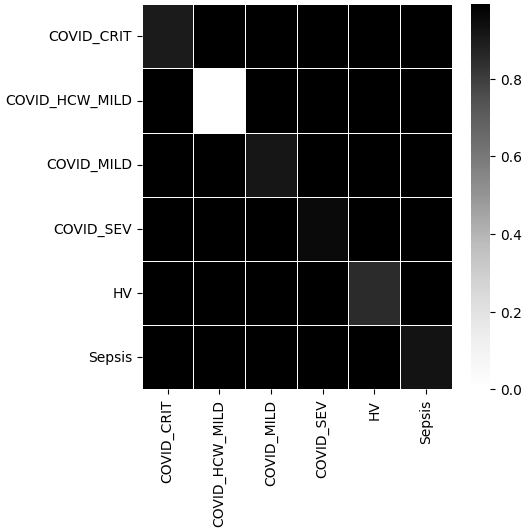

In [731]:
df = pd.DataFrame(sparse.csgraph.shortest_path(all_snf_corr_dist, directed=False, unweighted=False), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)).stack().groupby(level=[0,1]).mean().unstack()
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(df, linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

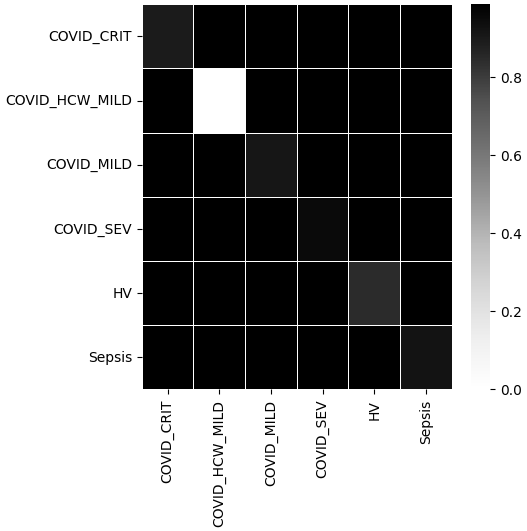

In [732]:
df = pd.DataFrame(sparse.csgraph.shortest_path(all_snf_kernel_dist, directed=False, unweighted=False), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)).stack().groupby(level=[0,1]).mean().unstack()
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(df, linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

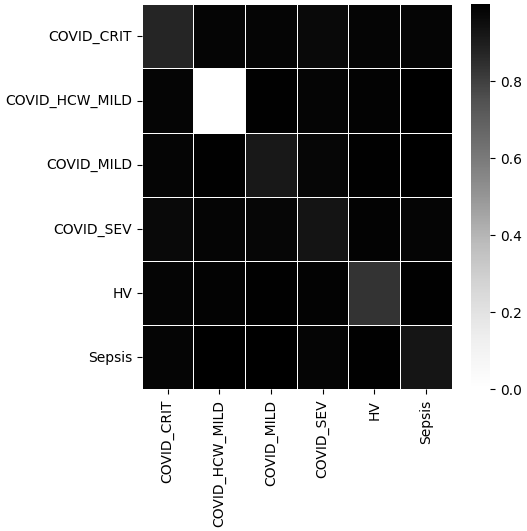

In [733]:
df = pd.DataFrame(sparse.csgraph.shortest_path(all_wa_knn_dist, directed=False, unweighted=False), index = list(graphs_74["G0"].obs.Disease), columns = list(graphs_74["G0"].obs.Disease)).stack().groupby(level=[0,1]).mean().unstack()
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(df, linewidth=.4, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

## Benchmarking - Pure Clusters

In [1028]:
fused1 = None
for id in modality_frequency_weights.keys():
    if fused1 is None:
        fused1 = knn_PSNs[id] * modality_frequency_weights[id]
    else:
        fused1 = fused1 + knn_PSNs[id] * modality_frequency_weights[id]

if np.isnan(fused1).any():
    nan_locs = np.argwhere(np.isnan(fused1))
    for loc in nan_locs:
        fused1[loc[0], loc[1]] = 0
    print(np.isnan(fused1).any() == False)


#fused2 = compute.snf([citeRNA_snf_kernel, cytof_snf_kernel, bulkRNA_snf_kernel, adt_snf_kernel, facs_snf_kernel, luminex_snf_kernel], K=6, t = 50)
fused2 = compute.snf([citeRNA_snf_kernel, bulkRNA_snf_kernel, facs_snf_kernel], K=6, t = 50)
fused3 = adj_hat

/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


In [40]:
cluster_disease_group_distribution1, cluster_labels_d1, cluster_labels_dg1 , num_pure_clusters1, pct_pure_clusters1, l1 = cluster_disease_group_stats("fused_snf_kernel_level1")
cluster_disease_group_distribution2, cluster_labels_d2, cluster_labels_dg2 , num_pure_clusters2, pct_pure_clusters2, l2 = cluster_disease_group_stats("fused_snf_kernel_level2")
cluster_disease_group_distribution3, cluster_labels_d3, cluster_labels_dg3 , num_pure_clusters3, pct_pure_clusters3, l3 = cluster_disease_group_stats("fused_snf_kernel_level3")
cluster_disease_group_distribution4, cluster_labels_d4, cluster_labels_dg4 , num_pure_clusters4, pct_pure_clusters4, l4 = cluster_disease_group_stats("fused_snf_kernel_level4")




cluster_disease_group_distribution5, cluster_labels_d5, cluster_labels_dg5 , num_pure_clusters5, pct_pure_clusters5, l5 = cluster_disease_group_stats("fused_snf_corr_level1")
cluster_disease_group_distribution6, cluster_labels_d6, cluster_labels_dg6 , num_pure_clusters6, pct_pure_clusters6, l6 = cluster_disease_group_stats("fused_snf_corr_level2")
cluster_disease_group_distribution7, cluster_labels_d7, cluster_labels_dg7 , num_pure_clusters7, pct_pure_clusters7, l7 = cluster_disease_group_stats("fused_snf_corr_level3")
cluster_disease_group_distribution8, cluster_labels_d8, cluster_labels_dg8 , num_pure_clusters8, pct_pure_clusters8, l8 = cluster_disease_group_stats("fused_snf_corr_level4")



cluster_disease_group_distribution9, cluster_labels_d9, cluster_labels_dg9 , num_pure_clusters9, pct_pure_clusters9, l9 = cluster_disease_group_stats("fused_wa_knn")

"""cluster_disease_group_distribution4, cluster_labels_d4, cluster_labels_dg4 , num_pure_clusters4, pct_pure_clusters4, l4 = cluster_disease_group_stats("fused_wa_knn", g = fused1)
cluster_disease_group_distribution5, cluster_labels_d5, cluster_labels_dg5 , num_pure_clusters5, pct_pure_clusters5, l5 = cluster_disease_group_stats("fused_snf_kernel", g = fused2)
cluster_disease_group_distribution6, cluster_labels_d6, cluster_labels_dg6 , num_pure_clusters6, pct_pure_clusters6, l6 = cluster_disease_group_stats("fused_snf_kernel", g = fused3)
cluster_disease_group_distribution7, cluster_labels_d7, cluster_labels_dg7 , num_pure_clusters7, pct_pure_clusters7, l7 = cluster_disease_group_stats("fused_snf_kernel", g = snf_fused)"""

'cluster_disease_group_distribution4, cluster_labels_d4, cluster_labels_dg4 , num_pure_clusters4, pct_pure_clusters4, l4 = cluster_disease_group_stats("fused_wa_knn", g = fused1)\ncluster_disease_group_distribution5, cluster_labels_d5, cluster_labels_dg5 , num_pure_clusters5, pct_pure_clusters5, l5 = cluster_disease_group_stats("fused_snf_kernel", g = fused2)\ncluster_disease_group_distribution6, cluster_labels_d6, cluster_labels_dg6 , num_pure_clusters6, pct_pure_clusters6, l6 = cluster_disease_group_stats("fused_snf_kernel", g = fused3)\ncluster_disease_group_distribution7, cluster_labels_d7, cluster_labels_dg7 , num_pure_clusters7, pct_pure_clusters7, l7 = cluster_disease_group_stats("fused_snf_kernel", g = snf_fused)'

In [41]:
acc_d1, _ = prediction_and_accuracy(cluster_labels_d1, l1, level1_graphs["G0"].obs.Disease )
acc_dg1, _  = prediction_and_accuracy(cluster_labels_dg1, l1, level1_graphs["G0"].obs.DiseaseGroup )

acc_d2, _  = prediction_and_accuracy(cluster_labels_d2, l2, level1_graphs["G0"].obs.Disease )
acc_dg2 , _ = prediction_and_accuracy(cluster_labels_dg2, l2, level1_graphs["G0"].obs.DiseaseGroup )

acc_d3 , _ = prediction_and_accuracy(cluster_labels_d3, l3, level1_graphs["G0"].obs.Disease )
acc_dg3, _  = prediction_and_accuracy(cluster_labels_dg3, l3, level1_graphs["G0"].obs.DiseaseGroup )

acc_d4, _  = prediction_and_accuracy(cluster_labels_d4, l4, level1_graphs["G0"].obs.Disease )
acc_dg4, _  = prediction_and_accuracy(cluster_labels_dg4, l4, level1_graphs["G0"].obs.DiseaseGroup )

acc_d5 , _ = prediction_and_accuracy(cluster_labels_d5, l5, level1_graphs["G0"].obs.Disease )
acc_dg5, _  = prediction_and_accuracy(cluster_labels_dg5, l5, level1_graphs["G0"].obs.DiseaseGroup )

acc_d6 , _ = prediction_and_accuracy(cluster_labels_d6, l6, level1_graphs["G0"].obs.Disease )
acc_dg6, _  = prediction_and_accuracy(cluster_labels_dg6, l6, level1_graphs["G0"].obs.DiseaseGroup )

acc_d7 , _ = prediction_and_accuracy(cluster_labels_d7, l7, level1_graphs["G0"].obs.Disease )
acc_dg7, _  = prediction_and_accuracy(cluster_labels_dg7, l7, level1_graphs["G0"].obs.DiseaseGroup )

acc_d8 , _ = prediction_and_accuracy(cluster_labels_d8, l8, level1_graphs["G0"].obs.Disease )
acc_dg8, _  = prediction_and_accuracy(cluster_labels_dg8, l8, level1_graphs["G0"].obs.DiseaseGroup )

acc_d9 , _ = prediction_and_accuracy(cluster_labels_d9, l9, level1_graphs["G0"].obs.Disease )
acc_dg9, _  = prediction_and_accuracy(cluster_labels_dg9, l9, level1_graphs["G0"].obs.DiseaseGroup )

In [42]:
print("snf l1:", pct_pure_clusters1, ", snf l2:", pct_pure_clusters2, ", snf l3:", pct_pure_clusters3, ", snf l4:", pct_pure_clusters4, ", corr l1:", pct_pure_clusters5, ", corr l2:", pct_pure_clusters6, ", corr l3:",  pct_pure_clusters7, ", corr l4:",  pct_pure_clusters8, ", wa:",  pct_pure_clusters9 )

snf l1: 25.0 , snf l2: 0.0 , snf l3: 0.0 , snf l4: 0.0 , corr l1: 0.0 , corr l2: 0.0 , corr l3: 20.0 , corr l4: 0.0 , wa: 25.0


In [46]:
print("snf l1:", round(acc_d1,4), ", snf l2:", acc_d2, ", snf l3:", acc_d3, ", snf l4:", acc_d4, ", corr l1:", acc_d5, ", corr l2:", acc_d6, ", corr l3:",  acc_d7, ", corr l4:",  acc_d8, ", wa:",  acc_d9 )

snf l1: 0.3919 , snf l2: 0.5675675675675675 , snf l3: 0.24324324324324326 , snf l4: 0.0945945945945946 , corr l1: 0.13513513513513514 , corr l2: 0.3108108108108108 , corr l3: 0.40540540540540543 , corr l4: 0.0 , wa: 0.2972972972972973


In [44]:
print("snf l1:", acc_dg1, ", snf l2:", acc_dg2, ", snf l3:", acc_dg3, ", snf l4:", acc_dg4, ", corr l1:", acc_dg5, ", corr l2:", acc_dg6, ", corr l3:",  acc_dg7, ", corr l4:",  acc_dg8, ", wa:",  acc_dg9 )

snf l1: 0.6351351351351351 , snf l2: 0.6621621621621622 , snf l3: 0.4594594594594595 , snf l4: 0.6621621621621622 , corr l1: 0.6486486486486487 , corr l2: 0.5540540540540541 , corr l3: 0.7567567567567568 , corr l4: 0.2972972972972973 , wa: 0.6621621621621622


## Further Tests

In [1027]:
tf = []

for id, val in what_kernel_graph_has_the_purest_cluster.items():
    if val > 30:
        tf.append(kernel_PSNs[id])

s = compute.snf(tf, K=6, t = 50)
cluster_disease_group_distribution8, cluster_labels_d8, cluster_labels_dg8 , num_pure_clusters8, pct_pure_clusters8, l8 = cluster_disease_group_stats("fused_snf_kernel", g = s)
acc_d8, _ = prediction_and_accuracy(cluster_labels_d8, l8, graphs_74["G0"].obs.Disease )
acc_dg8, _  = prediction_and_accuracy(cluster_labels_dg8, l8, graphs_74["G0"].obs.DiseaseGroup )

print(acc_d8, acc_dg8)

0.35135135135135137 0.8783783783783784


In [990]:
def plot_clusters(labels):
    all_clusters_d = {l : {d:0 for d in set(graphs_74["G0"].obs.Disease)} for l in set(labels)}
    all_clusters_dg = {l : {dg:0 for dg in set(graphs_74["G0"].obs.DiseaseGroup)} for l in set(labels)}
    for i,l in enumerate(labels):
        p = patients_74[i]
        all_clusters_d[l][list(graphs_74["G0"][p].obs.Disease)[0]]+=1
        all_clusters_dg[l][list(graphs_74["G0"][p].obs.DiseaseGroup)[0]]+=1
    
    fig, ax = plt.subplots(1,2, figsize=(10,5))

    df = pd.DataFrame().from_dict(all_clusters_d)
    #df = pd.DataFrame(all_clusters_d)
    df.transpose().plot(kind='bar', stacked=True, legend = True, ax= ax[0] )

    df = pd.DataFrame().from_dict(all_clusters_dg)
    #df = pd.DataFrame(all_clusters_dg)
    df.transpose().plot(kind='bar', stacked=True, legend = True, ax= ax[1] )

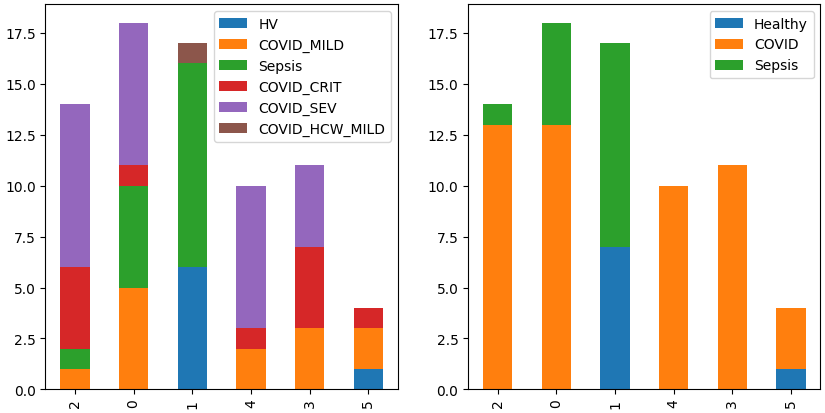

In [991]:
plot_clusters(list(l))

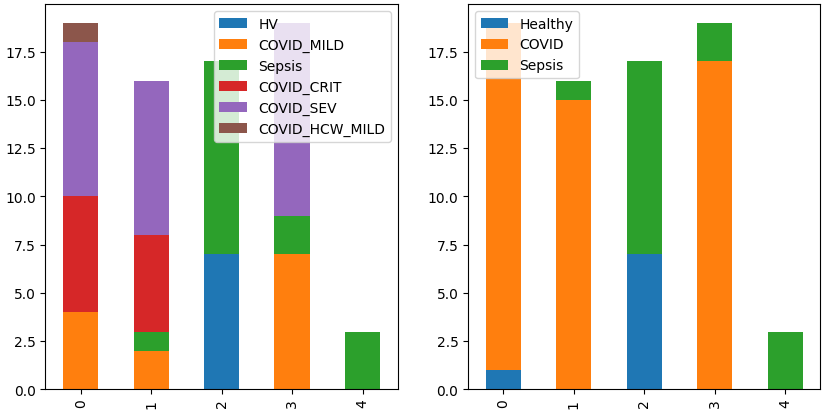

In [992]:
plot_clusters(list(l6))

<Axes: >

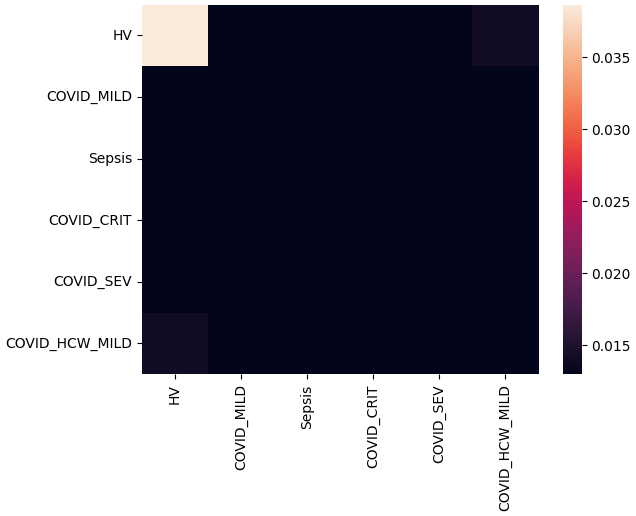

In [968]:
closest_n, _, average_edge_weights = connectivities(t = "fused_snf_kernel")
sb.heatmap(pd.DataFrame.from_dict(average_edge_weights), vmin = 0.013)

In [969]:
_, cluster_labels_d1, cluster_labels_dg1, _, pct_pure_clusters1, l1 = cluster_disease_group_stats("fused_snf_kernel", g = citeRNA_snf_kernel)
_, cluster_labels_d2, cluster_labels_dg2, _, pct_pure_clusters2, l2 = cluster_disease_group_stats("fused_snf_kernel", g = cytof_snf_kernel)
_, cluster_labels_d3, cluster_labels_dg3, _, pct_pure_clusters3, l3 = cluster_disease_group_stats("fused_snf_kernel", g = bulkRNA_snf_kernel)
_, cluster_labels_d4, cluster_labels_dg4, _, pct_pure_clusters4, l4 = cluster_disease_group_stats("fused_snf_kernel", g = adt_snf_kernel)
_, cluster_labels_d5, cluster_labels_dg5, _, pct_pure_clusters5, l5 = cluster_disease_group_stats("fused_snf_kernel", g = facs_snf_kernel)
_, cluster_labels_d6, cluster_labels_dg6, _, pct_pure_clusters6, l6 = cluster_disease_group_stats("fused_snf_kernel", g = luminex_snf_kernel)
_, cluster_labels_d7, cluster_labels_dg7, _, pct_pure_clusters7, l7 = cluster_disease_group_stats("fused_snf_kernel", g = all_snf_kernel)

In [970]:
disease_pred_status = []
_, pred1 = prediction_and_accuracy(cluster_labels_d1, l1, graphs_74["G0"].obs.Disease)
disease_pred_status.append(find_correct_predictions(mode = "d", pred = pred1))
_, pred2 = prediction_and_accuracy(cluster_labels_d2, l2, graphs_74["G0"].obs.Disease)
disease_pred_status.append(find_correct_predictions(mode = "d", pred = pred2))
_, pred3 = prediction_and_accuracy(cluster_labels_d3, l3, graphs_74["G0"].obs.Disease)
disease_pred_status.append(find_correct_predictions(mode = "d", pred = pred3))
_, pred4 = prediction_and_accuracy(cluster_labels_d4, l4, graphs_74["G0"].obs.Disease)
disease_pred_status.append(find_correct_predictions(mode = "d", pred = pred4))
_, pred5 = prediction_and_accuracy(cluster_labels_d5, l5, graphs_74["G0"].obs.Disease)
disease_pred_status.append(find_correct_predictions(mode = "d", pred = pred5))
_, pred6 = prediction_and_accuracy(cluster_labels_d6, l6, graphs_74["G0"].obs.Disease)
disease_pred_status.append(find_correct_predictions(mode = "d", pred = pred6))
_, pred7 = prediction_and_accuracy(cluster_labels_d7, l7, graphs_74["G0"].obs.Disease)
disease_pred_status.append(find_correct_predictions(mode = "d", pred = pred7))


disease_group_pred_status = []
_, pred1 = prediction_and_accuracy(cluster_labels_dg1, l1, graphs_74["G0"].obs.DiseaseGroup)
disease_group_pred_status.append(find_correct_predictions(mode = "dg", pred = pred1))
_, pred2 = prediction_and_accuracy(cluster_labels_dg2, l2, graphs_74["G0"].obs.DiseaseGroup)
disease_group_pred_status.append(find_correct_predictions(mode = "dg", pred = pred2))
_, pred3 = prediction_and_accuracy(cluster_labels_dg3, l3, graphs_74["G0"].obs.DiseaseGroup)
disease_group_pred_status.append(find_correct_predictions(mode = "dg", pred = pred3))
_, pred4 = prediction_and_accuracy(cluster_labels_dg4, l4, graphs_74["G0"].obs.DiseaseGroup)
disease_group_pred_status.append(find_correct_predictions(mode = "dg", pred = pred4))
_, pred5 = prediction_and_accuracy(cluster_labels_dg5, l5, graphs_74["G0"].obs.DiseaseGroup)
disease_group_pred_status.append(find_correct_predictions(mode = "dg", pred = pred5))
_, pred6 = prediction_and_accuracy(cluster_labels_dg6, l6, graphs_74["G0"].obs.DiseaseGroup)
disease_group_pred_status.append(find_correct_predictions(mode = "dg", pred = pred6))
_, pred7 = prediction_and_accuracy(cluster_labels_dg7, l7, graphs_74["G0"].obs.DiseaseGroup)
disease_group_pred_status.append(find_correct_predictions(mode = "dg", pred = pred7))


<Axes: >

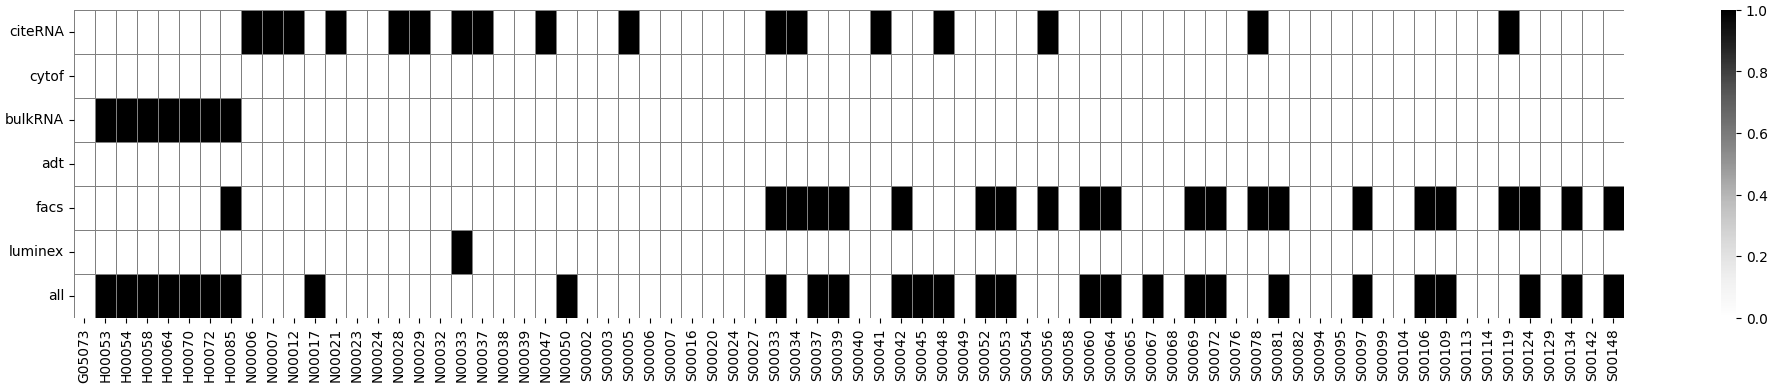

In [971]:
df_d = pd.DataFrame(disease_pred_status, index = ["citeRNA", "cytof", "bulkRNA", "adt", "facs", "luminex", "all"], columns = patients_74)
fig, ax = plt.subplots(figsize=(25,4))
sb.heatmap(df_d, ax = ax, cmap= "Greys", linewidth=.4, linecolor = "Grey")

In [972]:
len(citeRNA_kernel_74)/ len(kernel_PSNs)  * 100

84.95934959349594

<Axes: >

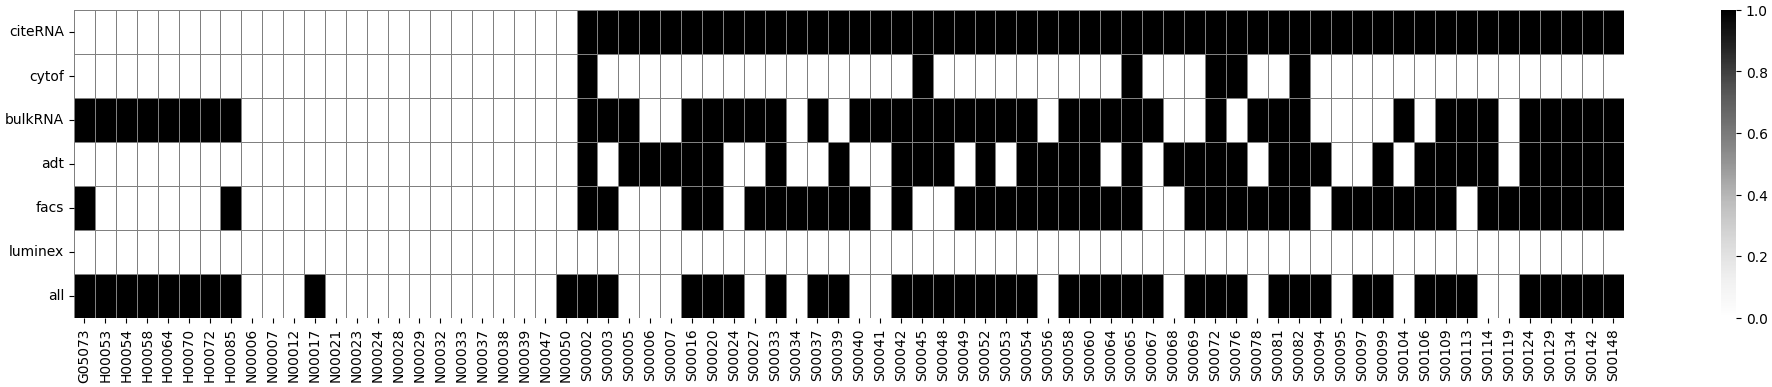

In [973]:
df_dg = pd.DataFrame(disease_group_pred_status, index = ["citeRNA", "cytof", "bulkRNA", "adt", "facs", "luminex", "all"], columns = patients_74)
fig, ax = plt.subplots(figsize=(25,4))
sb.heatmap(df_dg, ax = ax, cmap= "Greys", linewidth=.4, linecolor = "Grey")

In [1037]:
cts = []
for id in list(graphs_74.keys()):
    name = id_to_name[id]
    modality = name.split("_")[0]
    if modality == "citeRNA":
        ct = name.split("_")[1].split("-")[0]
        cts.append(ct)
        

In [1039]:
len(set(cts))

11